In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.signal import savgol_filter
from scipy.optimize import minimize
import time
from scipy.optimize import least_squares
from scipy.stats import linregress
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error
import os

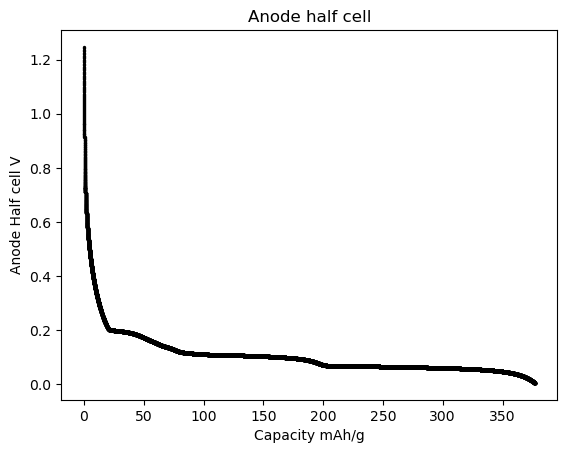

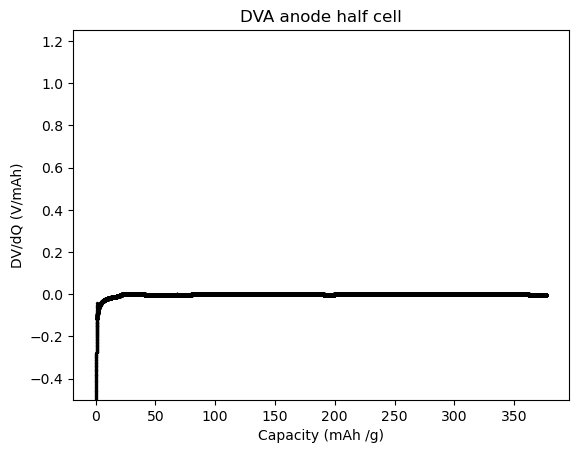

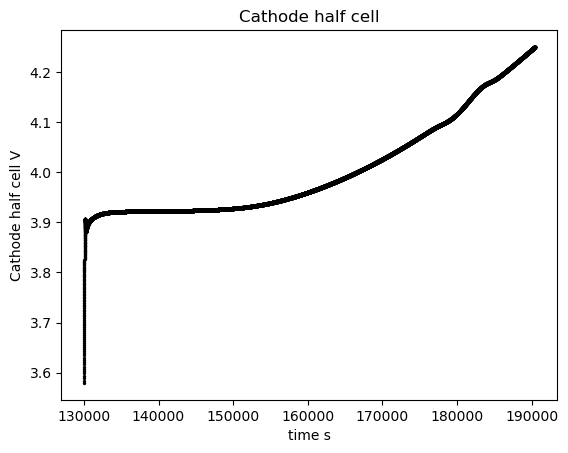

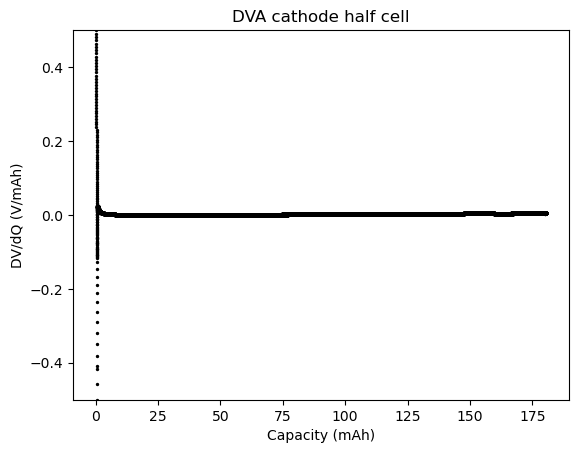

In [4]:
#import information of half-cell potentials
import os
file_path_anode ='C:/Users/r342e598/Desktop/DVA_analysis_V_3/half_cell_data/052924_II_OCV_half_cell_NEGATIVE_manuscript_100DOD/2_052924_II_OCV_half_cell_NEGATIVE_manuscript_100DOD 20240530 191532.CSV'
# Load the dataset into a pandas DataFrame 
anode_df = pd.read_csv(file_path_anode)
file_path_catode ='C:/Users/r342e598/Desktop/DVA_analysis_V_3/half_cell_data/052924_II_OCV_half_cell_POSITIVE_manuscript_100DOD/2_052924_II_OCV_half_cell_POSITIVE_manuscript_100DOD 20240530 190710.csv'
catode_df = pd.read_csv(file_path_catode)


#get the specific capacity- divide capacity by the mass of the 1 square measured when assembling he half cell
# CATHODE Half cell 052924 II: calculated estimation of mass of active material : 0.01858615 g
# ANODE Half cell 052924 II: calculated estimation of mass of active material  : 0.00997152 g


catode_df["Cumulative Charge (mAh/g)"] = catode_df["Cumulative Charge (mAh)"]/  0.01858615
anode_df["Cumulative Charge (mAh/g)"]  = anode_df["Cumulative Charge (mAh)"]/  0.00997152

#plot of anode
anode_df = anode_df[ (anode_df['Repeats'] == 7)].copy()

#reduce noise
anode_df['Working Electrode (V)'] = savgol_filter( anode_df['Working Electrode (V)'] , 400 ,3)

plt.scatter(anode_df["Cumulative Charge (mAh/g)"], anode_df['Working Electrode (V)'], color="black", s=2)
plt.xlabel('Capacity mAh/g') 
plt.ylabel('Anode Half cell V')
plt.title('Anode half cell') 
plt.show()

anode_df['voltage_derivative'] = np.gradient(anode_df['Working Electrode (V)'], anode_df["Cumulative Charge (mAh/g)"])

plt.scatter(anode_df["Cumulative Charge (mAh/g)"], anode_df['voltage_derivative'], color="black", s=2)
plt.xlabel('Capacity (mAh /g)')
plt.ylabel('DV/dQ (V/mAh)')
#plt.xlim(0, 0.0175)
#plt.ylim(0, 0.0252)
#plt.ylim(-0.4, 0.252)
plt.ylim(-0.5, 1.252)
plt.title('DVA anode half cell') 
plt.show()

#cathode
#plot of cathode
#filtrer one cycle of charge of the measured cathode half cell

catode_df = catode_df[ (catode_df['Repeats'] == 5)].copy()
catode_df['Working Electrode (V)'] = savgol_filter( catode_df['Working Electrode (V)'] , 400 ,3)
plt.scatter(catode_df["Elapsed Time (s)"], catode_df['Working Electrode (V)'], color="black", s=2)
plt.xlabel('time s') 
plt.ylabel('Cathode half cell V')
plt.title('Cathode half cell') 
plt.show()

catode_df['voltage_derivative'] = np.gradient(catode_df['Working Electrode (V)'], catode_df["Cumulative Charge (mAh/g)"])
plt.scatter(catode_df["Cumulative Charge (mAh/g)"], catode_df['voltage_derivative'], color="black", s=2)
plt.xlabel('Capacity (mAh)')
plt.ylabel('DV/dQ (V/mAh)')
#plt.xlim(0, 0.0175)
#plt.ylim(0, 0.0252)
plt.ylim(-0.5, 0.5)
plt.title('DVA cathode half cell') 
plt.show()



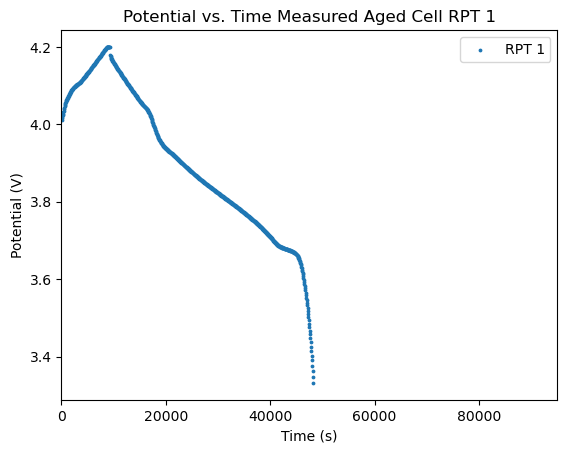

 x1 9345.636062
 x2 9405.636062
 y1 4.178532124
 y2 4.175090313
Linear equation: y = -0.000057x + 4.714631
Value of y (first_potential_V_linear) for x = 8700.15395: 4.215559
RPT 1 - capacity:  -0.038431621612673036 Ah
RPT 1 - cell_internal_resistance: 6.038136003752612 ohms
RPT 1 - cell_internal_resistance linear aproach: -4.540114247088007 ohms
RPT 1 - first_potential: 4.199667454
RPT 1 - last_potential: 4.178532124
RPT 1 - delta_potential_measured: -0.021135329999999897
RPT 1 - mean_current: -0.003500307046224961
first value 'Elapsed Time (s)': 8700.15395
last value 'Elapsed Time (s)': 48226.35436
time difference s : 39526.20041
time difference in hours : 10.979500113888887


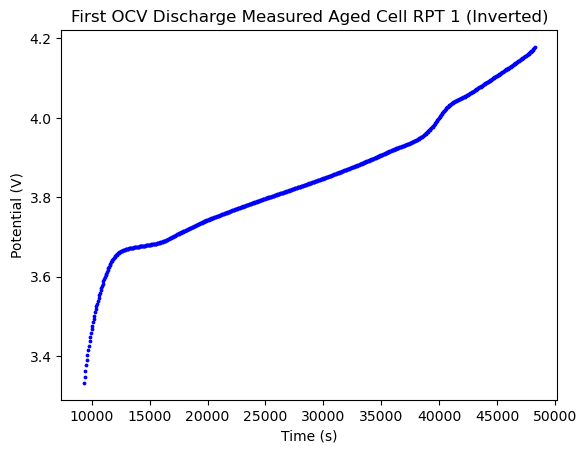

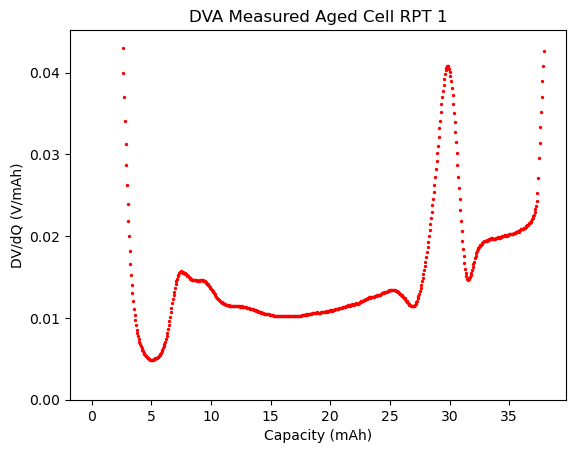

C:\Users\r342e598\anaconda\Lib\site-packages\scipy\optimize\_differentiable_functions.py:504: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(delta_x, delta_g)


Optimized parameters:
mp: 0.2093653080842373
mn: 0.1614966036822666
delta_p: -2.590500302894507
delta_n: -0.5723226317477165
Total optimization time: 9.461938858032227 seconds
limit mp: 0.2093653080842373


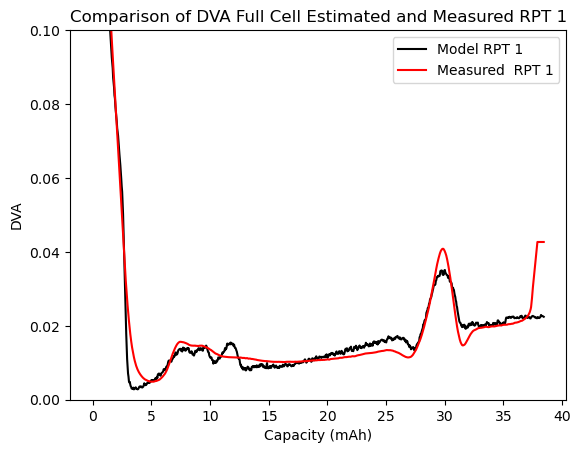

initial value Numerical integral (Trapezoidal rule): 1.4504647369320038


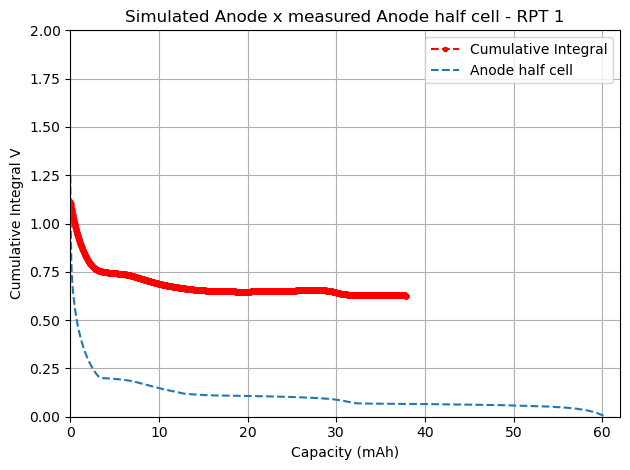

C:\Users\r342e598\AppData\Local\Temp\ipykernel_16728\1976290827.py:293: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_step, _ = curve_fit(step_function, x_region, y_region, p0=[np.mean(x_region), np.min(y_region), np.max(y_region)])


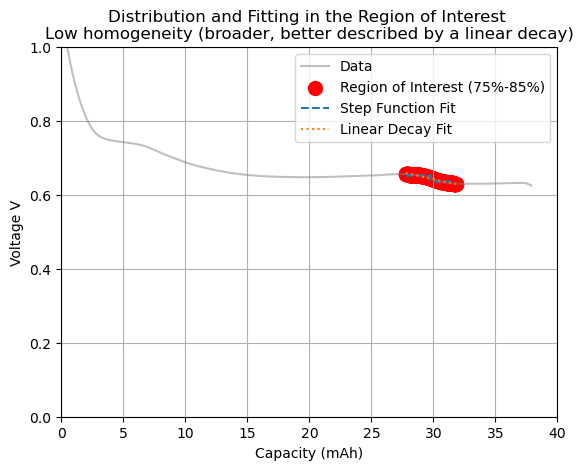

RMSE for Step Function: 0.0037
RMSE for Linear Decay: 0.0016
Homogeneity: Low homogeneity (broader, better described by a linear decay)
Slope of RPT 1  : -0.007605106848596565


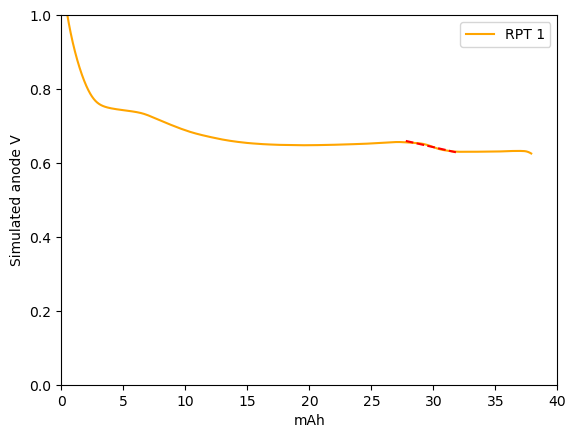

<class 'int'>


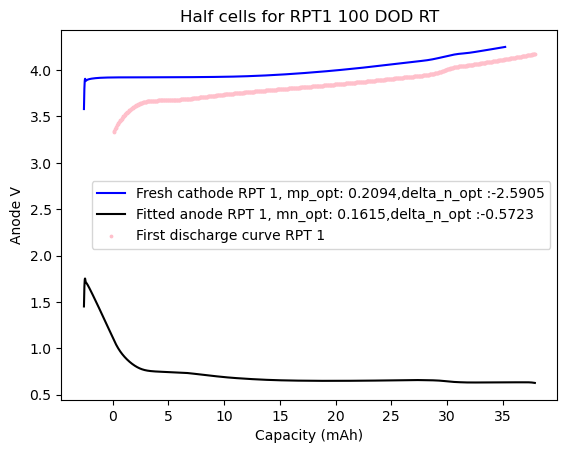

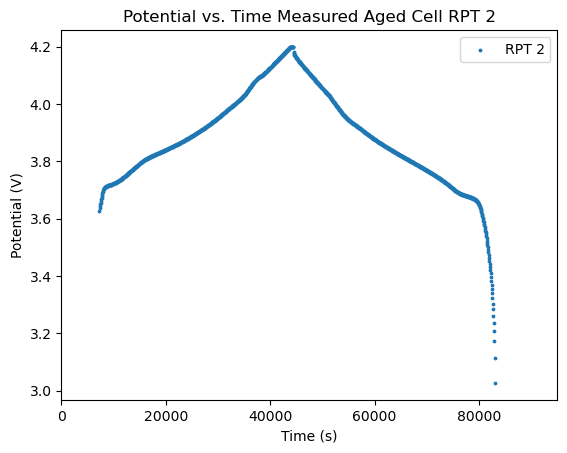

 x1 44460.64959
 x2 44520.64959
 y1 4.180502415
 y2 4.176684856
Linear equation: y = -0.000064x + 7.009355
Value of y (first_potential_V_linear) for x = 43800.76933: 4.222488
RPT 2 - capacity:  -0.03815224783885255 Ah
RPT 2 - cell_internal_resistance: 5.29688488854421 ohms
RPT 2 - cell_internal_resistance linear aproach: -6.698458218361797 ohms
RPT 2 - first_potential: 4.19904232
RPT 2 - last_potential: 4.180502415
RPT 2 - delta_potential_measured: -0.018539904999999912
RPT 2 - mean_current: -0.003500152521739131
first value 'Elapsed Time (s)': 43800.76933
last value 'Elapsed Time (s)': 83041.37138
time difference s : 39240.602049999994
time difference in hours : 10.900167236111109


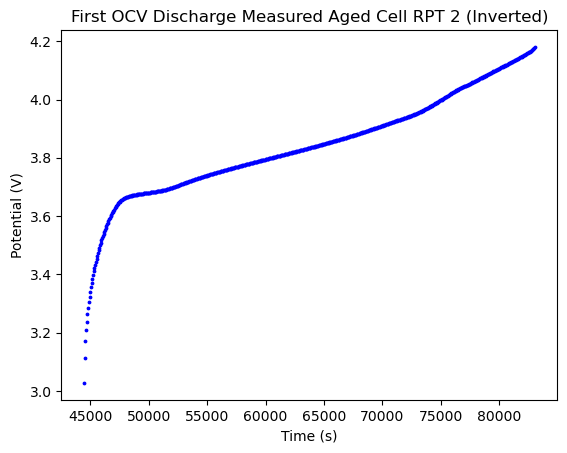

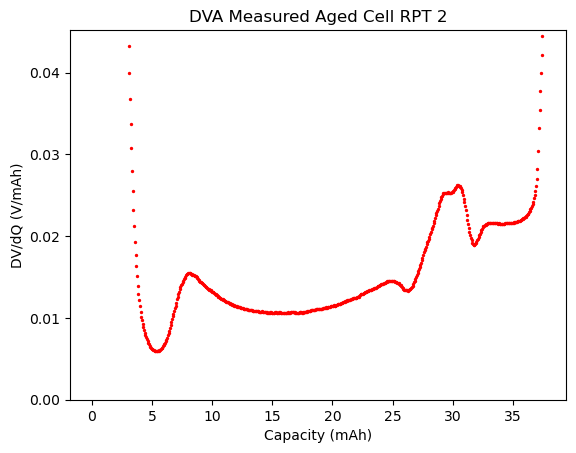

C:\Users\r342e598\anaconda\Lib\site-packages\scipy\optimize\_differentiable_functions.py:504: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(delta_x, delta_g)


Optimized parameters:
mp: 0.20820410204595413
mn: 0.15928207177075848
delta_p: -2.9878383382117106
delta_n: -0.08582499862432848
Total optimization time: 5.448829889297485 seconds
limit mp: 0.20820410204595413


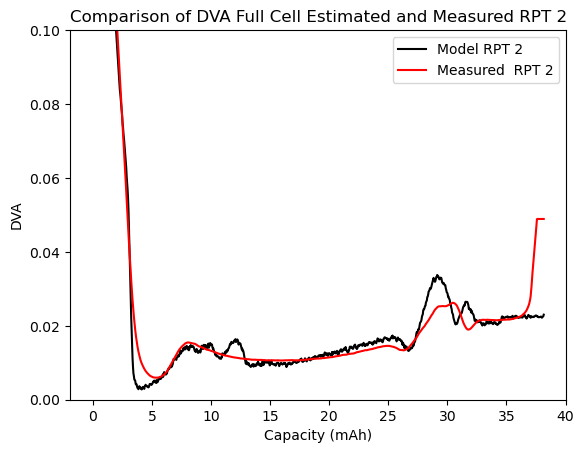

initial value Numerical integral (Trapezoidal rule): 4.013540411112793


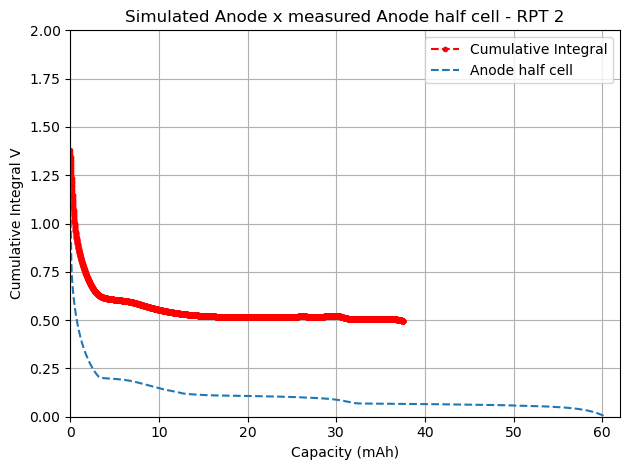

C:\Users\r342e598\AppData\Local\Temp\ipykernel_16728\1976290827.py:293: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_step, _ = curve_fit(step_function, x_region, y_region, p0=[np.mean(x_region), np.min(y_region), np.max(y_region)])


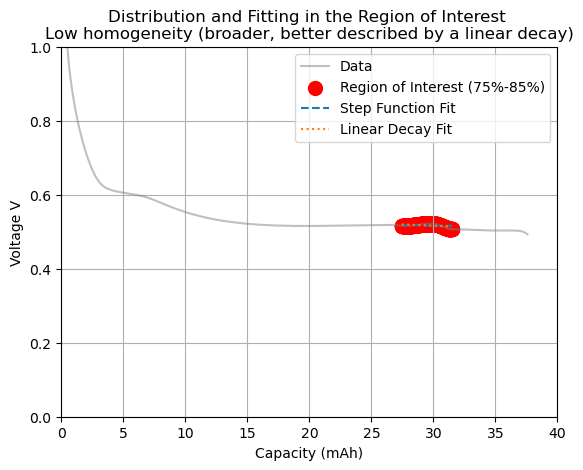

RMSE for Step Function: 0.0041
RMSE for Linear Decay: 0.0038
Homogeneity: Low homogeneity (broader, better described by a linear decay)
Slope of RPT 2  : -0.001354899731454376


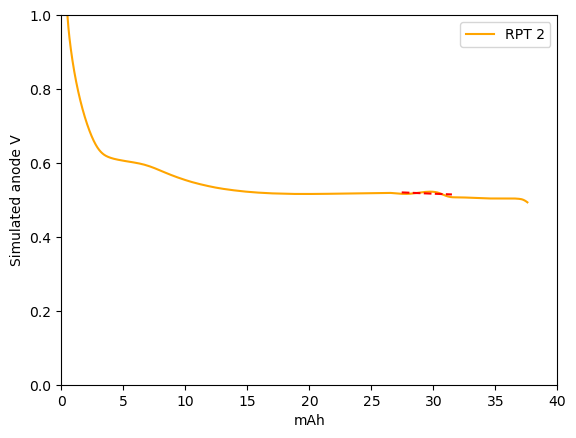

<class 'int'>


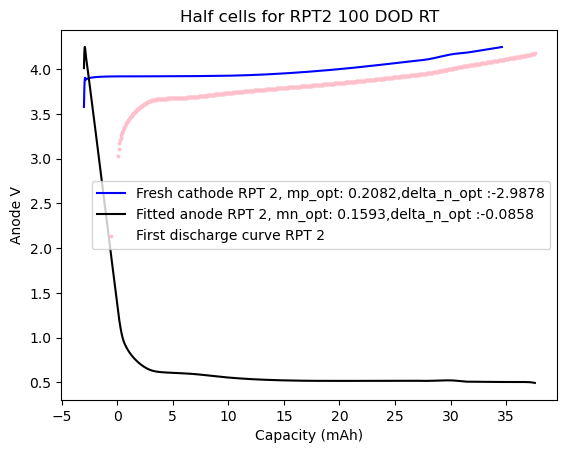

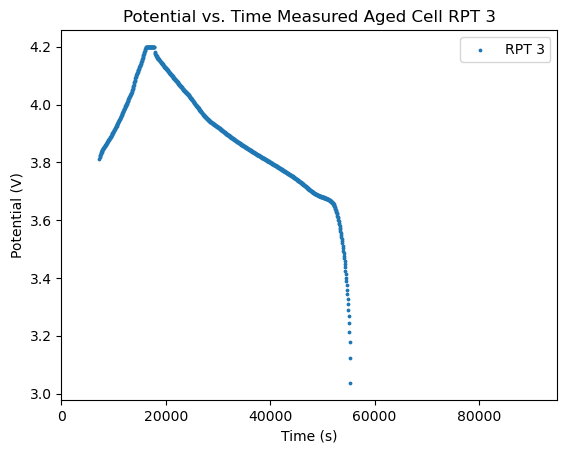

 x1 17864.61646
 x2 17924.61646
 y1 4.181166649
 y2 4.177490711
Linear equation: y = -0.000061x + 5.275654
Value of y (first_potential_V_linear) for x = 16200.10271: 4.283144
RPT 3 - capacity:  -0.03801912590691651 Ah
RPT 3 - cell_internal_resistance: 4.832723671405592 ohms
RPT 3 - cell_internal_resistance linear aproach: -24.303165814502183 ohms
RPT 3 - first_potential: 4.198081493
RPT 3 - last_potential: 4.181166649
RPT 3 - delta_potential_measured: -0.01691484400000043
RPT 3 - mean_current: -0.0035000643839999995
first value 'Elapsed Time (s)': 16200.10271
last value 'Elapsed Time (s)': 55304.77001
time difference s : 39104.6673
time difference in hours : 10.862407583333333


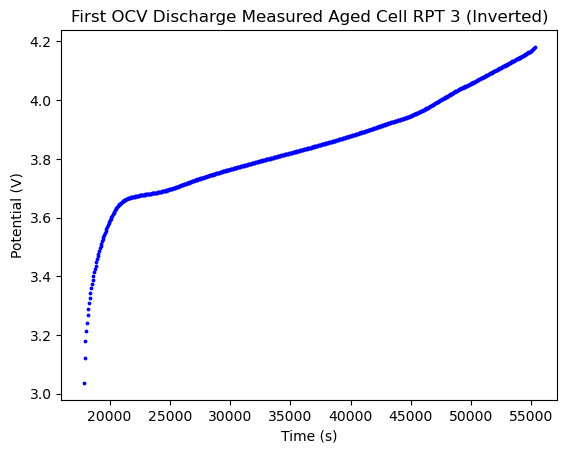

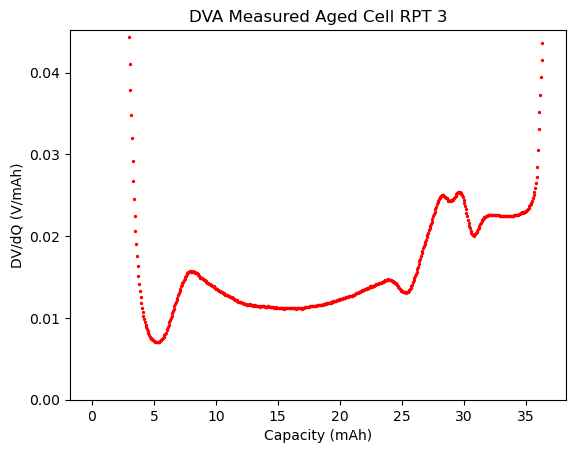

C:\Users\r342e598\anaconda\Lib\site-packages\scipy\optimize\_differentiable_functions.py:504: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(delta_x, delta_g)


Optimized parameters:
mp: 0.20314353636058693
mn: 0.15809496207144053
delta_p: -2.972268291419029
delta_n: -0.0884374202461685
Total optimization time: 4.78310227394104 seconds
limit mp: 0.20314353636058693


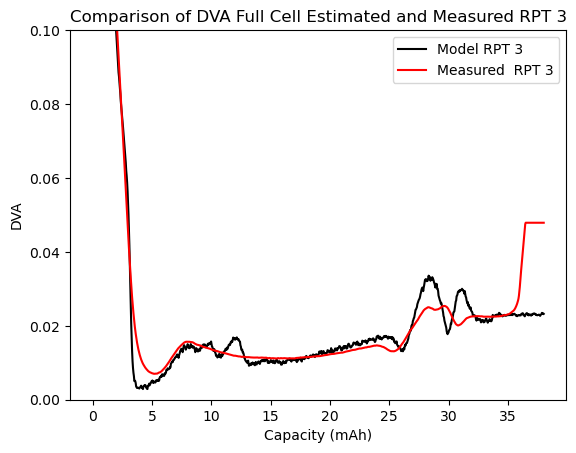

initial value Numerical integral (Trapezoidal rule): 3.9440868934462


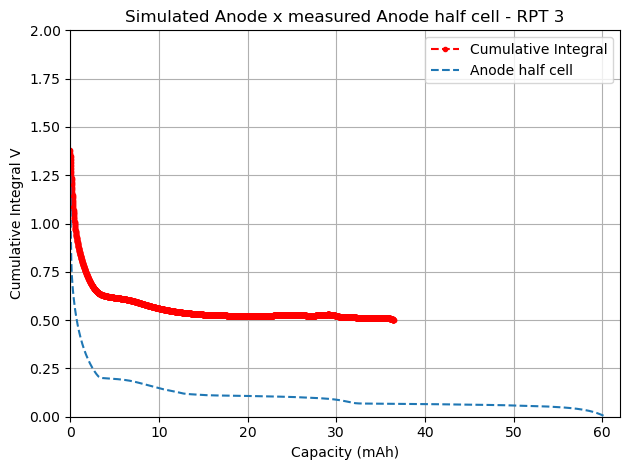

C:\Users\r342e598\AppData\Local\Temp\ipykernel_16728\1976290827.py:293: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_step, _ = curve_fit(step_function, x_region, y_region, p0=[np.mean(x_region), np.min(y_region), np.max(y_region)])


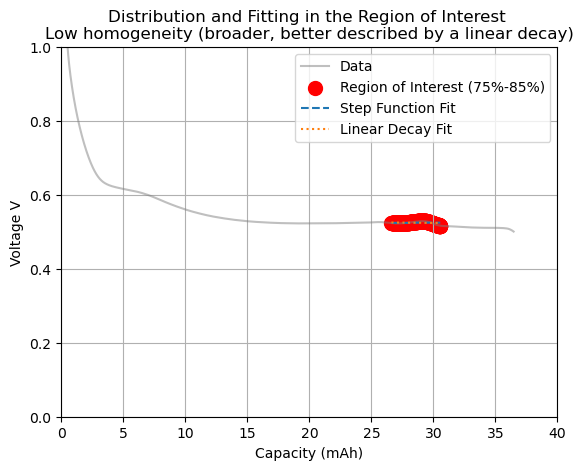

RMSE for Step Function: 0.0032
RMSE for Linear Decay: 0.0032
Homogeneity: Low homogeneity (broader, better described by a linear decay)
Slope of RPT 3  : -0.00031704249976376603


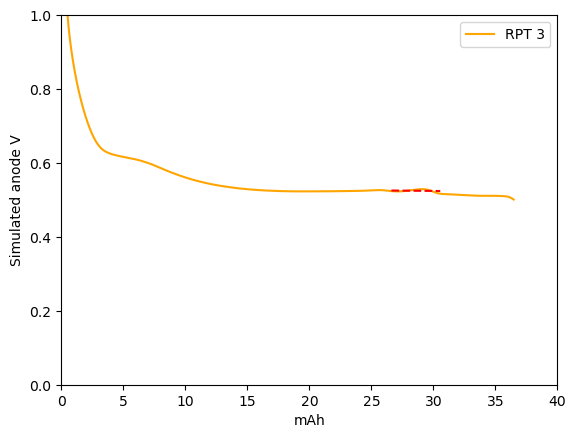

<class 'int'>


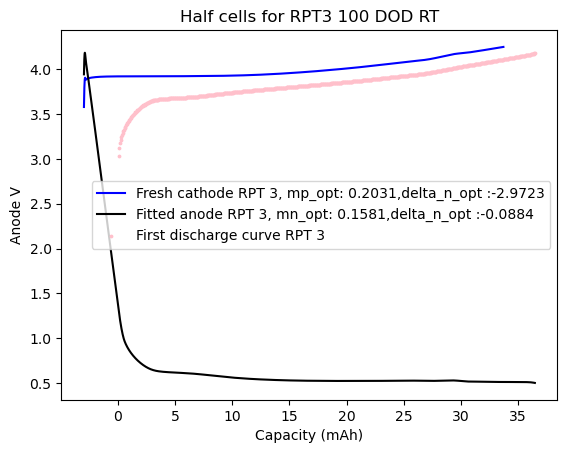

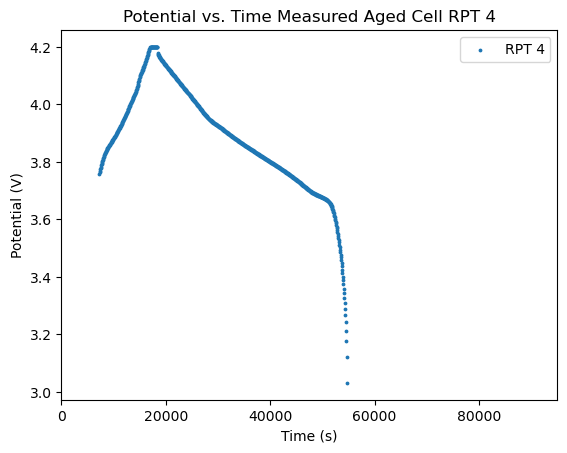

 x1 18435.78351
 x2 18495.78351
 y1 4.178852558
 y2 4.17489481
Linear equation: y = -0.000066x + 5.394922
Value of y (first_potential_V_linear) for x = 16980.16878: 4.274868
RPT 4 - capacity:  -0.0366497999900902 Ah
RPT 4 - cell_internal_resistance: 5.388251211344483 ohms
RPT 4 - cell_internal_resistance linear aproach: -22.044135366978168 ohms
RPT 4 - first_potential: 4.197711945
RPT 4 - last_potential: 4.178852558
RPT 4 - delta_potential_measured: -0.018859387000000005
RPT 4 - mean_current: -0.0035000942347107435
first value 'Elapsed Time (s)': 16980.16878
last value 'Elapsed Time (s)': 54676.09098
time difference s : 37695.9222
time difference in hours : 10.4710895


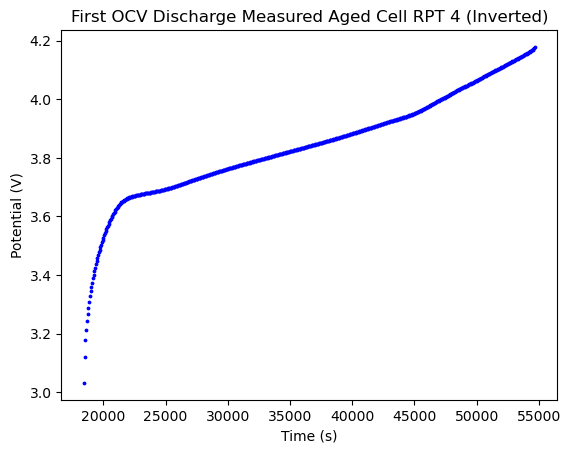

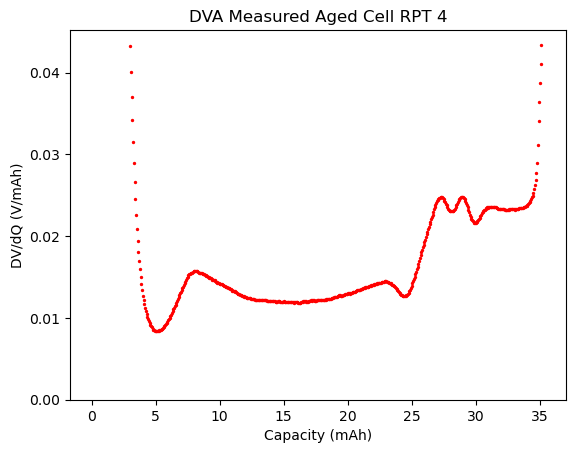

C:\Users\r342e598\anaconda\Lib\site-packages\scipy\optimize\_differentiable_functions.py:504: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(delta_x, delta_g)


Optimized parameters:
mp: 0.1974940224867889
mn: 0.15738499162427463
delta_p: -2.7902331487047625
delta_n: -0.08136242884281186
Total optimization time: 7.4634315967559814 seconds
limit mp: 0.1974940224867889


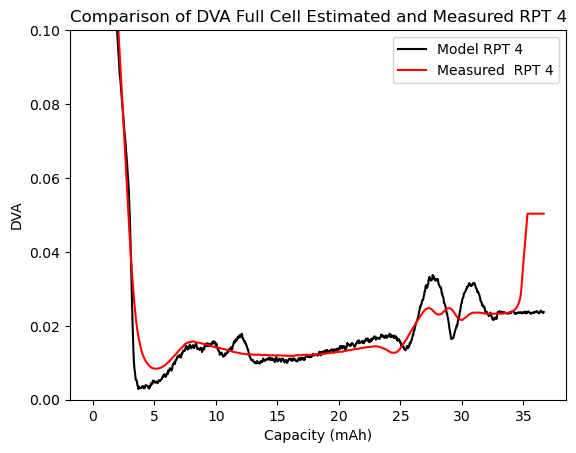

initial value Numerical integral (Trapezoidal rule): 3.8715775268819996


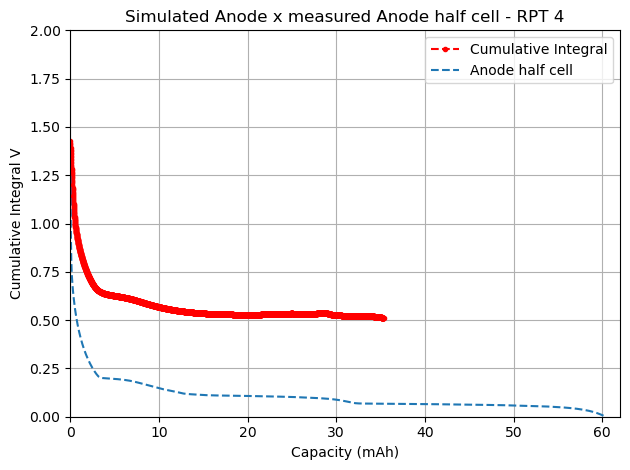

C:\Users\r342e598\AppData\Local\Temp\ipykernel_16728\1976290827.py:293: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_step, _ = curve_fit(step_function, x_region, y_region, p0=[np.mean(x_region), np.min(y_region), np.max(y_region)])


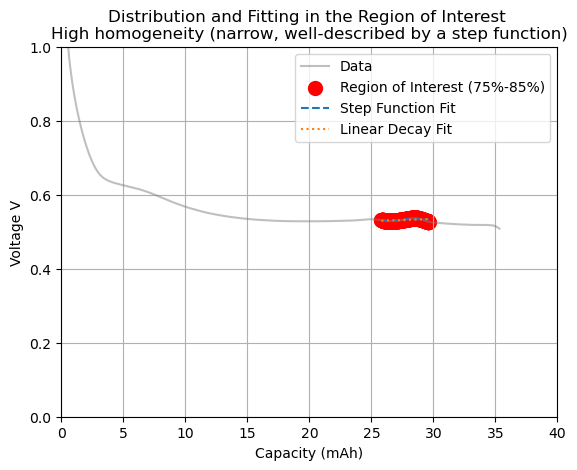

RMSE for Step Function: 0.0021
RMSE for Linear Decay: 0.0025
Homogeneity: High homogeneity (narrow, well-described by a step function)
Slope of RPT 4  : 0.0011314409875416707


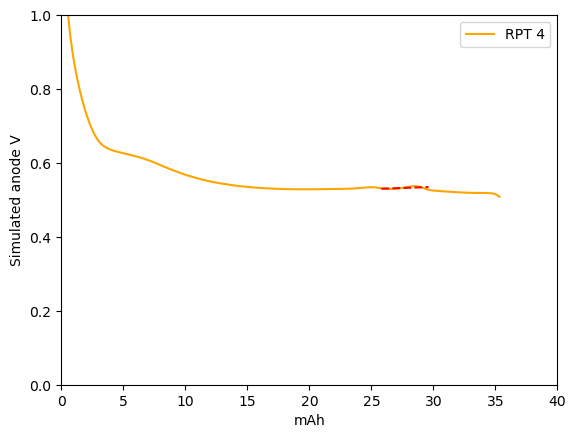

<class 'int'>


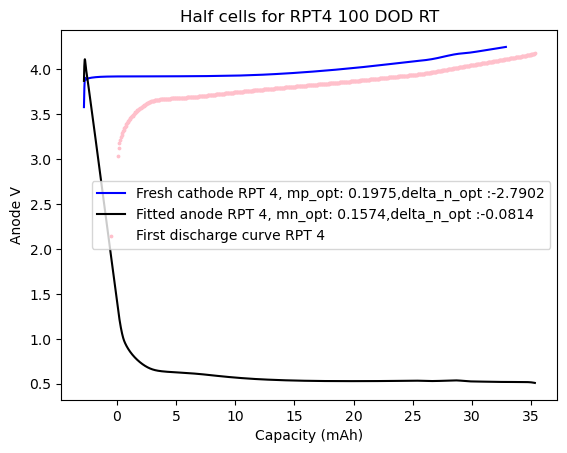

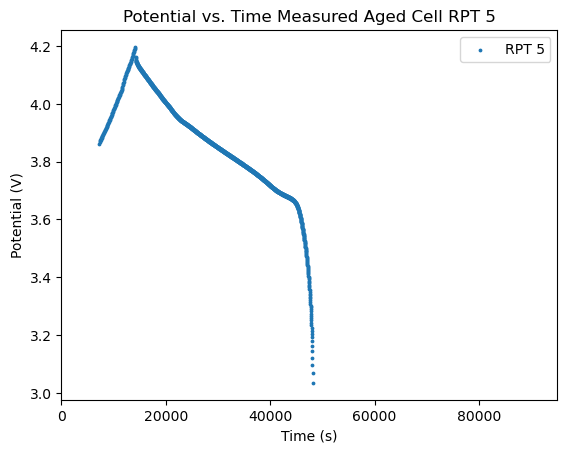

 x1 14237.3545399
 x2 14257.35453983
 y1 4.16236686706543
 y2 4.15669345855713
Linear equation: y = -0.000284x + 8.201083
Value of y (first_potential_V_linear) for x = 14160.05155915: 4.184295
RPT 5 - capacity:  -0.03301401172142391 Ah
RPT 5 - cell_internal_resistance: 9.801752931571741 ohms
RPT 5 - cell_internal_resistance linear aproach: 3.5364316663525814 ohms
RPT 5 - first_potential: 4.19667291641235
RPT 5 - last_potential: 4.16236686706543
RPT 5 - delta_potential_measured: -0.034306049346920275
RPT 5 - mean_current: -0.003499991234875902
first value 'Elapsed Time (s)': 14160.05155915
last value 'Elapsed Time (s)': 48117.40579845
time difference s : 33957.3542393
time difference in hours : 9.432598399805556


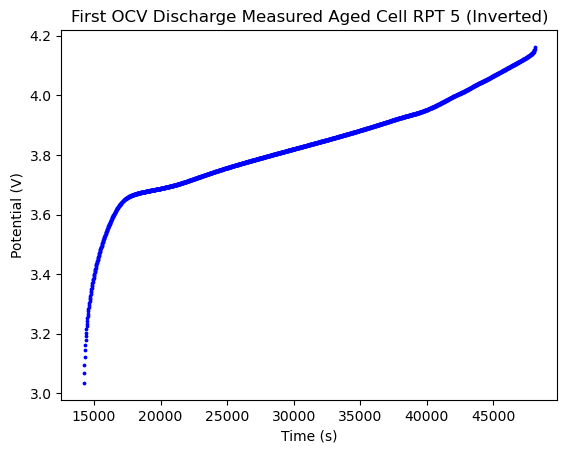

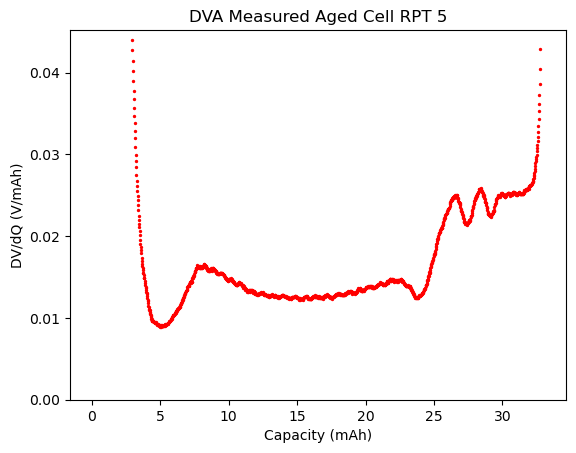

C:\Users\r342e598\anaconda\Lib\site-packages\scipy\optimize\_differentiable_functions.py:504: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(delta_x, delta_g)


Optimized parameters:
mp: 0.19257168823709128
mn: 0.16499535823982406
delta_p: -2.9968756449871226
delta_n: -0.07533431752832616
Total optimization time: 6.577908039093018 seconds
limit mp: 0.19257168823709128


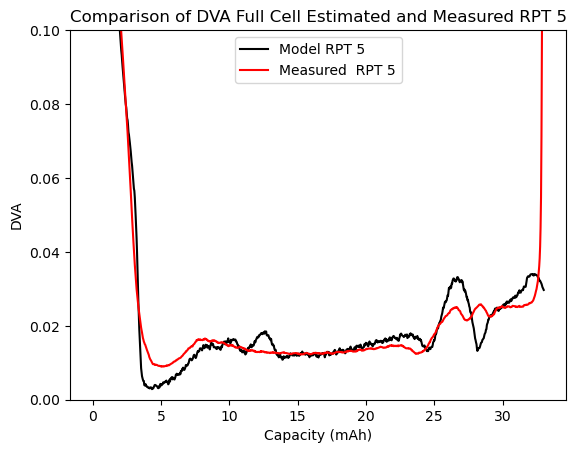

initial value Numerical integral (Trapezoidal rule): 5.487118444426577


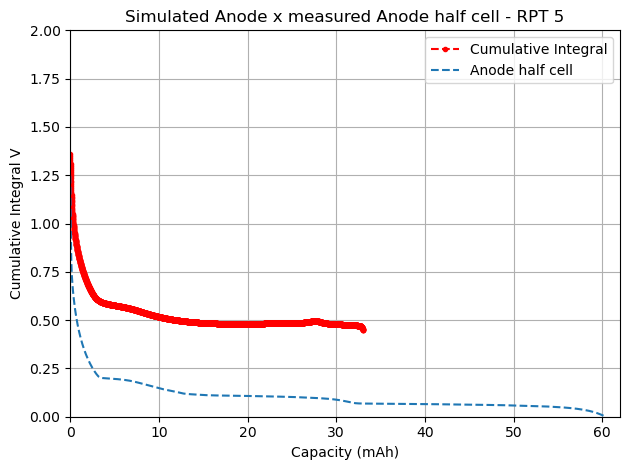

C:\Users\r342e598\AppData\Local\Temp\ipykernel_16728\1976290827.py:293: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_step, _ = curve_fit(step_function, x_region, y_region, p0=[np.mean(x_region), np.min(y_region), np.max(y_region)])


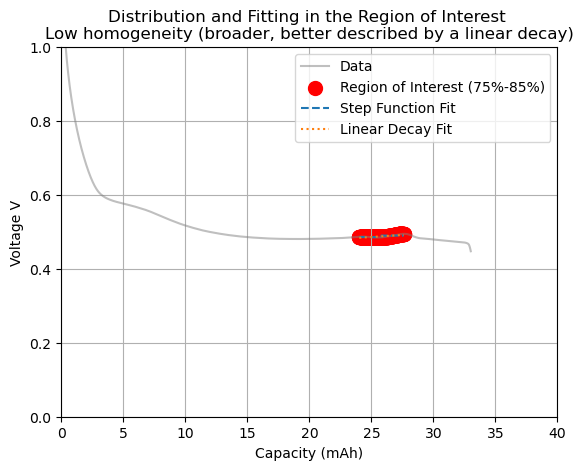

RMSE for Step Function: 0.0023
RMSE for Linear Decay: 0.0020
Homogeneity: Low homogeneity (broader, better described by a linear decay)
Slope of RPT 5  : 0.0021839226657809994


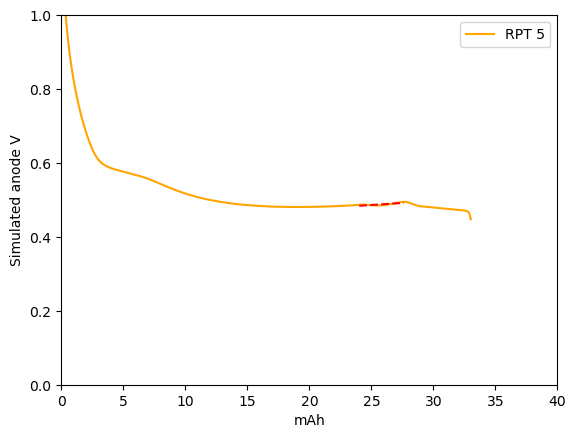

<class 'int'>


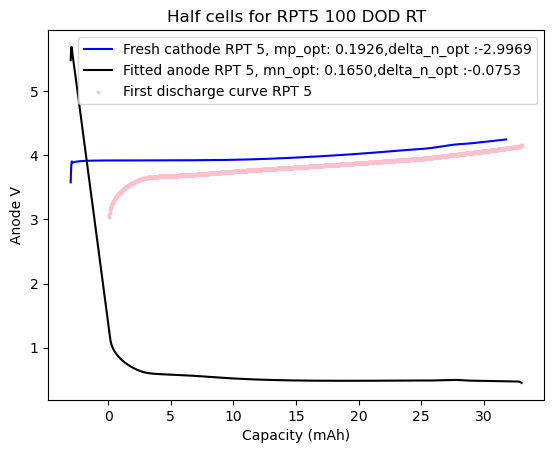

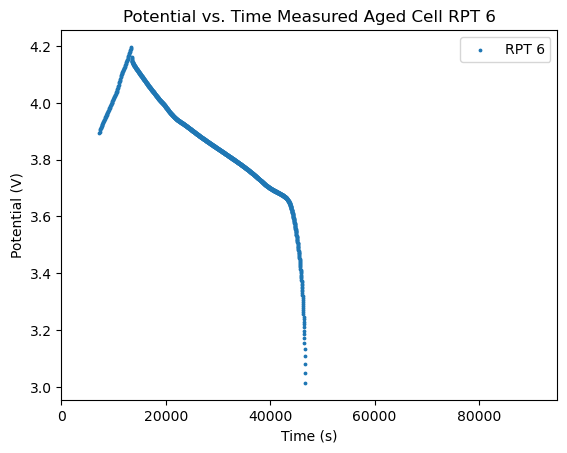

 x1 13448.17886792
 x2 13468.17886798
 y1 4.16270875930786
 y2 4.15727615356445
Linear equation: y = -0.000272x + 7.815641
Value of y (first_potential_V_linear) for x = 13380.15384606: 4.181186
RPT 6 - capacity:  -0.03234410601892491 Ah
RPT 6 - cell_internal_resistance: 9.862326373914607 ohms
RPT 6 - cell_internal_resistance linear aproach: 4.583011269543356 ohms
RPT 6 - first_potential: 4.19722700119019
RPT 6 - last_potential: 4.16270875930786
RPT 6 - delta_potential_measured: -0.03451824188232955
RPT 6 - mean_current: -0.0035000100963631345
first value 'Elapsed Time (s)': 13380.15384606
last value 'Elapsed Time (s)': 46648.28121207
time difference s : 33268.12736601
time difference in hours : 9.241146490558332


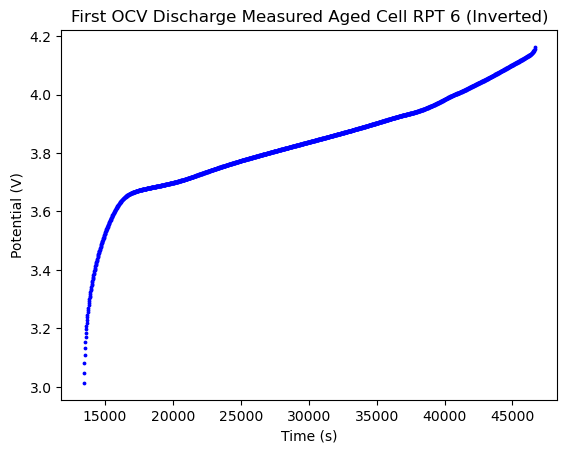

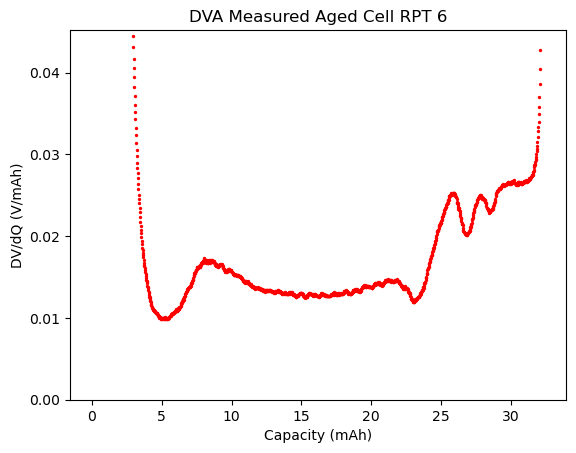

C:\Users\r342e598\anaconda\Lib\site-packages\scipy\optimize\_differentiable_functions.py:504: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(delta_x, delta_g)


Optimized parameters:
mp: 0.18821088187740762
mn: 0.1635790605712486
delta_p: -2.98625822891063
delta_n: -0.0692486695928757
Total optimization time: 2.656369924545288 seconds
limit mp: 0.18821088187740762


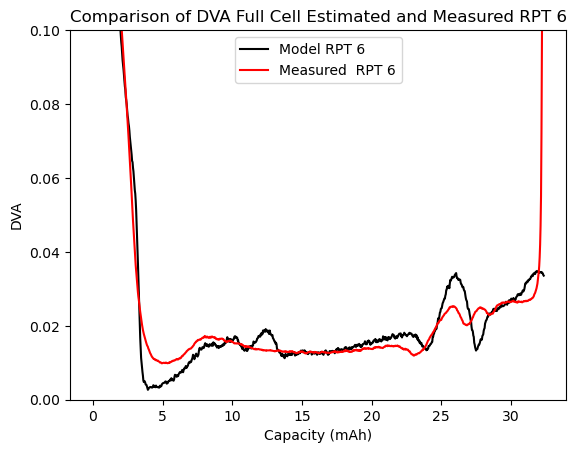

initial value Numerical integral (Trapezoidal rule): 5.890533314765638


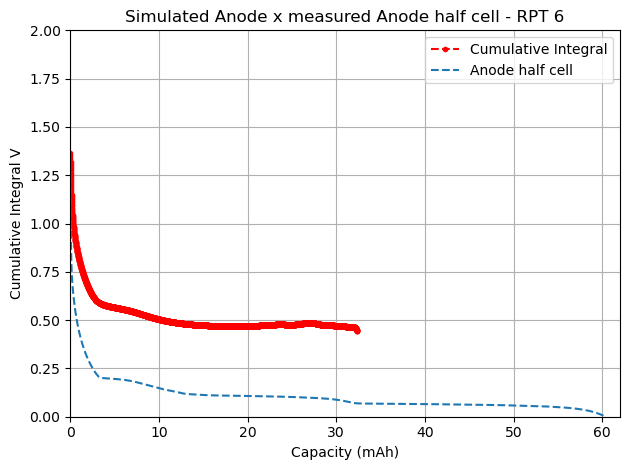

C:\Users\r342e598\AppData\Local\Temp\ipykernel_16728\1976290827.py:293: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_step, _ = curve_fit(step_function, x_region, y_region, p0=[np.mean(x_region), np.min(y_region), np.max(y_region)])


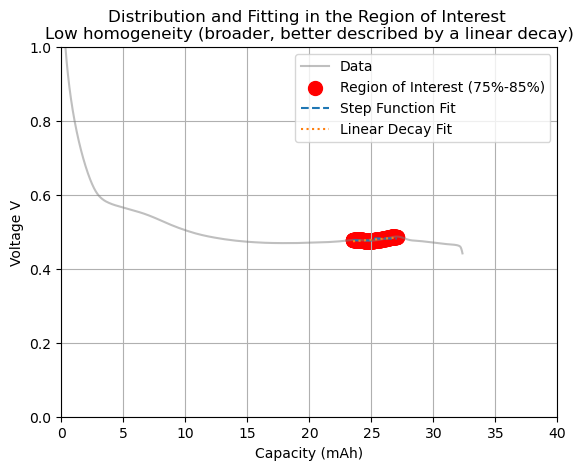

RMSE for Step Function: 0.0025
RMSE for Linear Decay: 0.0021
Homogeneity: Low homogeneity (broader, better described by a linear decay)
Slope of RPT 6  : 0.002836787841607839


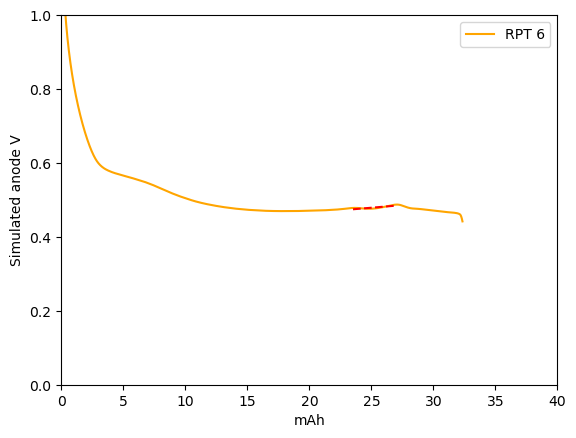

<class 'int'>


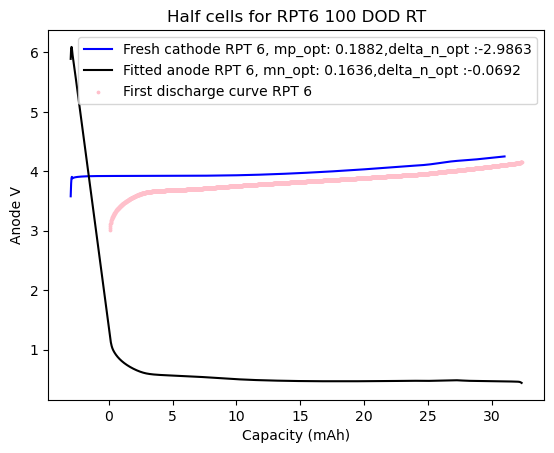

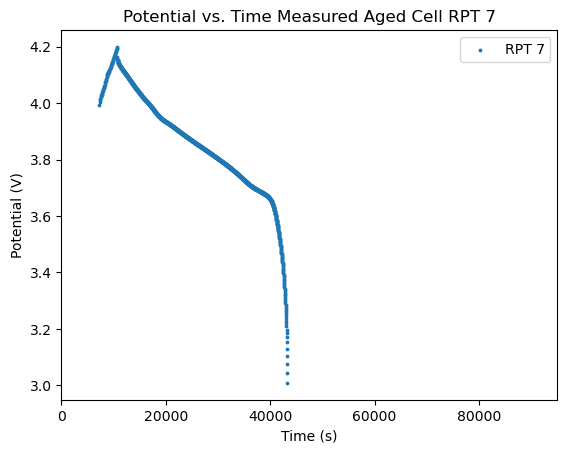

 x1 10710.10301392
 x2 10730.10301372
 y1 4.1630392074585
 y2 4.1575083732605
Linear equation: y = -0.000277x + 7.124829
Value of y (first_potential_V_linear) for x = 10680.0001592101: 4.171364
RPT 7 - capacity:  -0.03170313855501541 Ah
RPT 7 - cell_internal_resistance: 10.386220637214775 ohms
RPT 7 - cell_internal_resistance linear aproach: 8.007636764976832 ohms
RPT 7 - first_potential: 4.19938945770264
RPT 7 - last_potential: 4.1630392074585
RPT 7 - delta_potential_measured: -0.036350250244140625
RPT 7 - mean_current: -0.0034998534610264647
first value 'Elapsed Time (s)': 10680.0001592101
last value 'Elapsed Time (s)': 43290.30801038
time difference s : 32610.307851169902
time difference in hours : 9.058418847547195


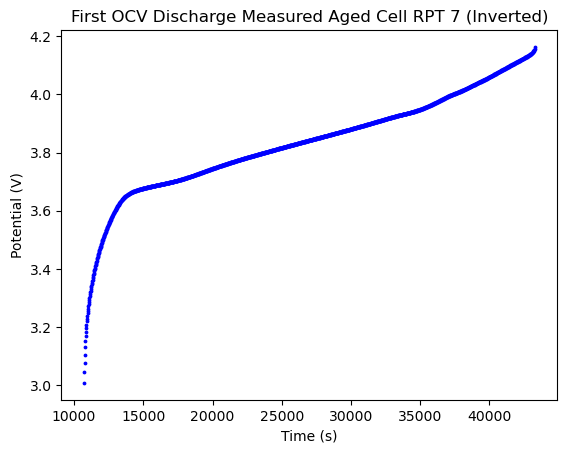

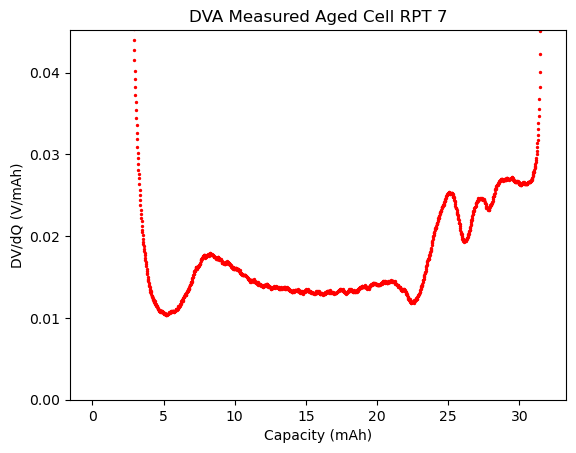

C:\Users\r342e598\anaconda\Lib\site-packages\scipy\optimize\_differentiable_functions.py:504: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(delta_x, delta_g)


Optimized parameters:
mp: 0.18147891986997997
mn: 0.1604974104532641
delta_p: -2.688366657499673
delta_n: -0.08024670247924648
Total optimization time: 7.344436168670654 seconds
limit mp: 0.18147891986997997


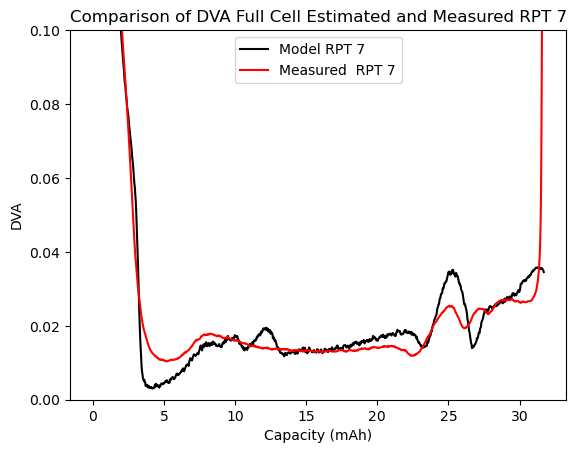

initial value Numerical integral (Trapezoidal rule): 5.46750664615649


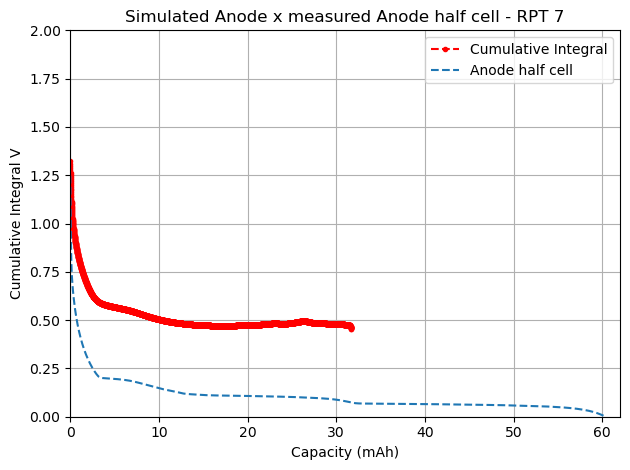

C:\Users\r342e598\AppData\Local\Temp\ipykernel_16728\1976290827.py:293: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_step, _ = curve_fit(step_function, x_region, y_region, p0=[np.mean(x_region), np.min(y_region), np.max(y_region)])


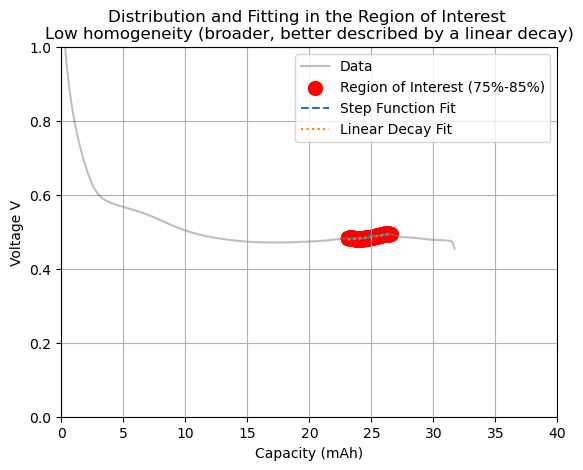

RMSE for Step Function: 0.0025
RMSE for Linear Decay: 0.0019
Homogeneity: Low homogeneity (broader, better described by a linear decay)
Slope of RPT 7  : 0.004412362911815027


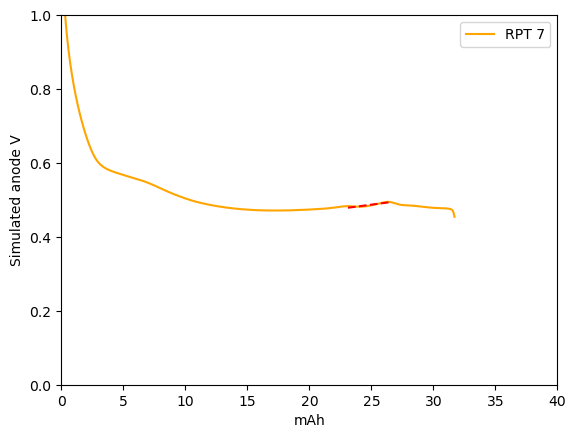

<class 'int'>


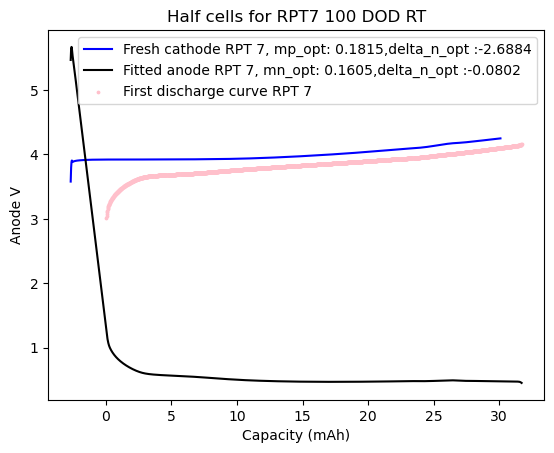

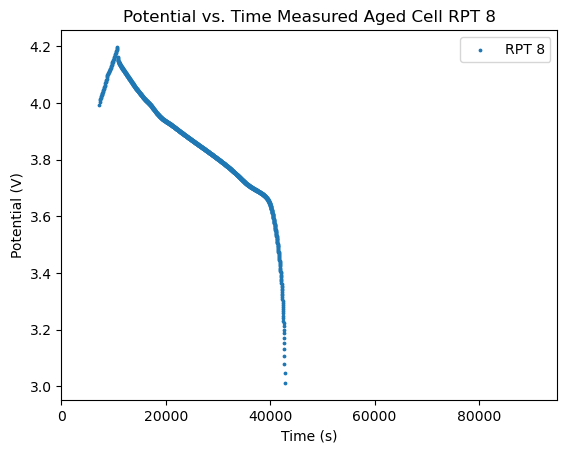

 x1 10798.26207922
 x2 10818.2620792299
 y1 4.1631875038147
 y2 4.15780544281006
Linear equation: y = -0.000269x + 7.069033
Value of y (first_potential_V_linear) for x = 10740.0515206699: 4.178852
RPT 8 - capacity:  -0.031124310686725196 Ah
RPT 8 - cell_internal_resistance: 9.869277461217154 ohms
RPT 8 - cell_internal_resistance linear aproach: 5.392998238944658 ohms
RPT 8 - first_potential: 4.19772481918335
RPT 8 - last_potential: 4.1631875038147
RPT 8 - delta_potential_measured: -0.03453731536864968
RPT 8 - mean_current: -0.0034994775964470935
first value 'Elapsed Time (s)': 10740.0515206699
last value 'Elapsed Time (s)': 42758.40722781
time difference s : 32018.3557071401
time difference in hours : 8.893987696427805


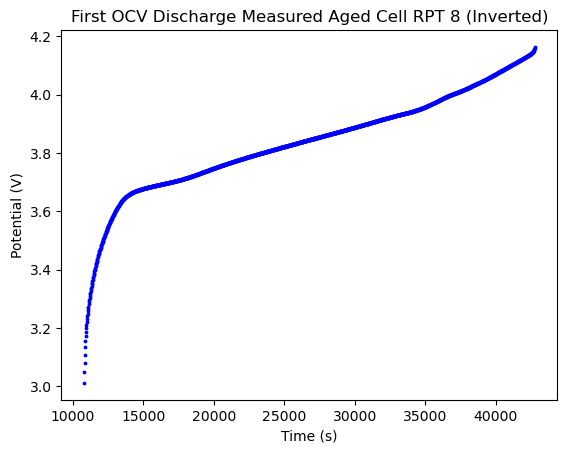

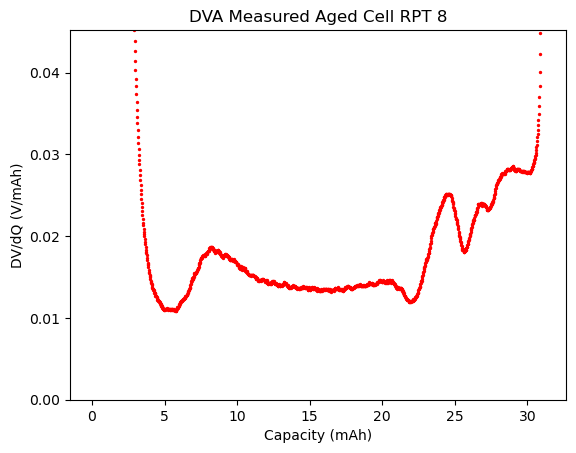

C:\Users\r342e598\anaconda\Lib\site-packages\scipy\optimize\_differentiable_functions.py:504: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(delta_x, delta_g)


Optimized parameters:
mp: 0.1789829384969702
mn: 0.15774886397988944
delta_p: -3.0018786662475834
delta_n: -0.06999046994350537
Total optimization time: 6.40812087059021 seconds
limit mp: 0.1789829384969702


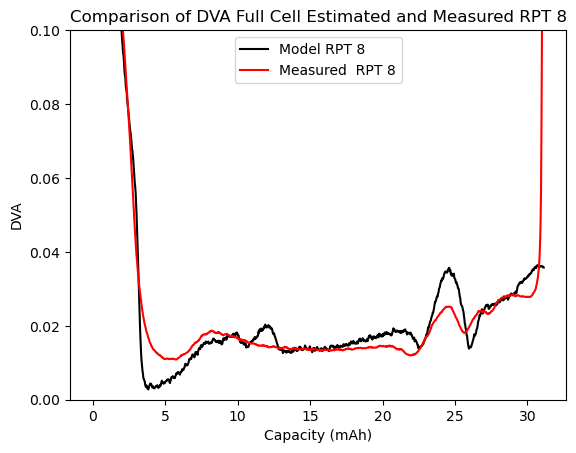

initial value Numerical integral (Trapezoidal rule): 6.0126940241286375


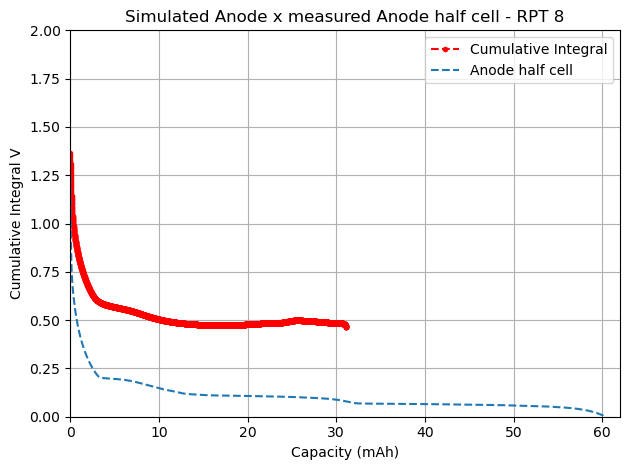

C:\Users\r342e598\AppData\Local\Temp\ipykernel_16728\1976290827.py:293: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_step, _ = curve_fit(step_function, x_region, y_region, p0=[np.mean(x_region), np.min(y_region), np.max(y_region)])


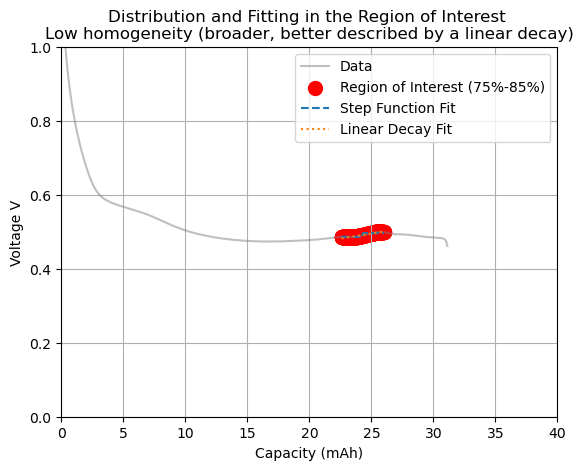

RMSE for Step Function: 0.0024
RMSE for Linear Decay: 0.0014
Homogeneity: Low homogeneity (broader, better described by a linear decay)
Slope of RPT 8  : 0.005390930797818834


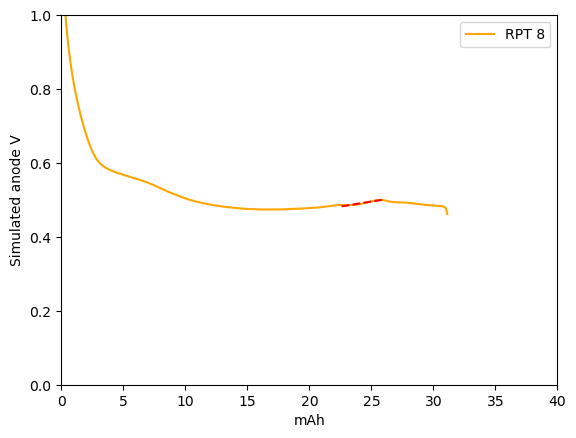

<class 'int'>


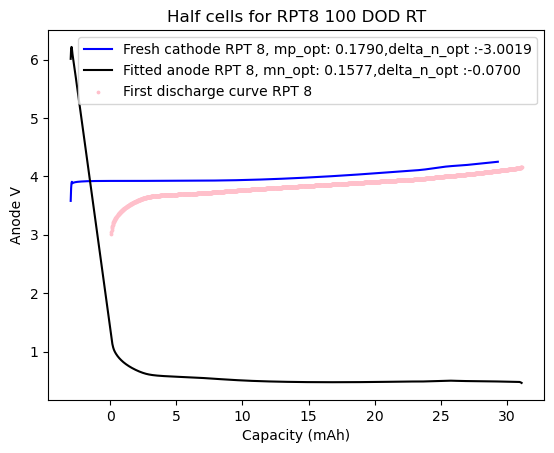

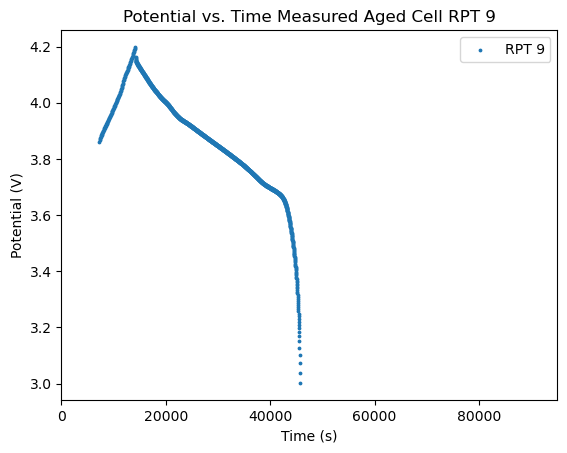

 x1 14199.3193323999
 x2 14219.3193324099
 y1 4.16371726989746
 y2 4.15849494934082
Linear equation: y = -0.000261x + 7.871387
Value of y (first_potential_V_linear) for x = 14160.1028849098: 4.173957
RPT 9 - capacity:  -0.030638153269298345 Ah
RPT 9 - cell_internal_resistance: 10.048515937677125 ohms
RPT 9 - cell_internal_resistance linear aproach: 7.122256597120854 ohms
RPT 9 - first_potential: 4.19888067245483
RPT 9 - last_potential: 4.16371726989746
RPT 9 - delta_potential_measured: -0.03516340255737038
RPT 9 - mean_current: -0.003499362769135336
first value 'Elapsed Time (s)': 14160.1028849098
last value 'Elapsed Time (s)': 45679.3705476699
time difference s : 31519.267662760103
time difference in hours : 8.755352128544473


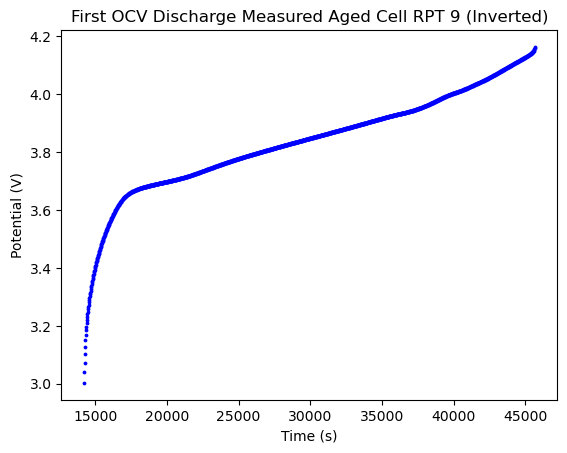

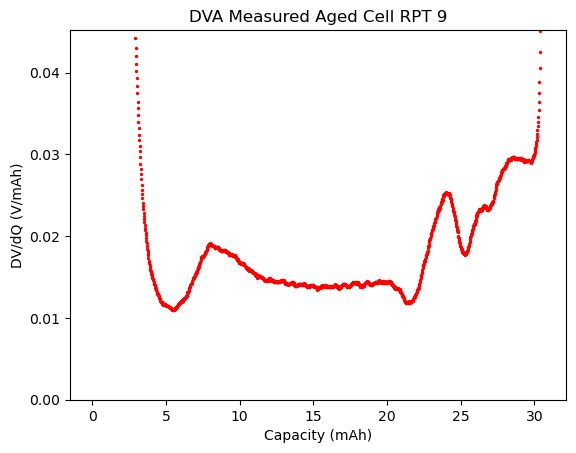

C:\Users\r342e598\anaconda\Lib\site-packages\scipy\optimize\_differentiable_functions.py:504: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(delta_x, delta_g)


Optimized parameters:
mp: 0.17553261440291865
mn: 0.1555095293380332
delta_p: -3.0040484251077744
delta_n: -0.0726284396604592
Total optimization time: 7.850977897644043 seconds
limit mp: 0.17553261440291865


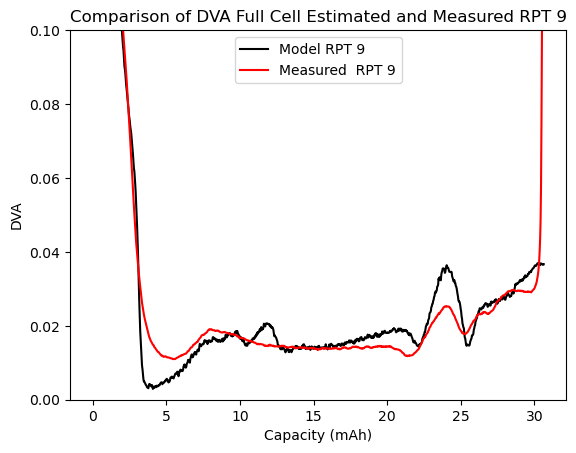

initial value Numerical integral (Trapezoidal rule): 6.181451842641649


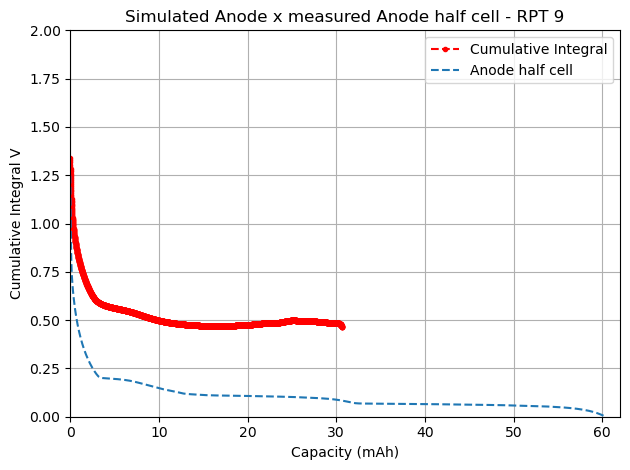

C:\Users\r342e598\AppData\Local\Temp\ipykernel_16728\1976290827.py:293: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_step, _ = curve_fit(step_function, x_region, y_region, p0=[np.mean(x_region), np.min(y_region), np.max(y_region)])


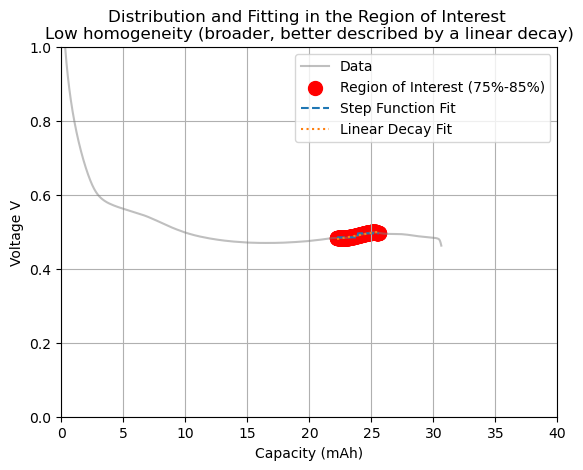

RMSE for Step Function: 0.0024
RMSE for Linear Decay: 0.0013
Homogeneity: Low homogeneity (broader, better described by a linear decay)
Slope of RPT 9  : 0.005974502544553708


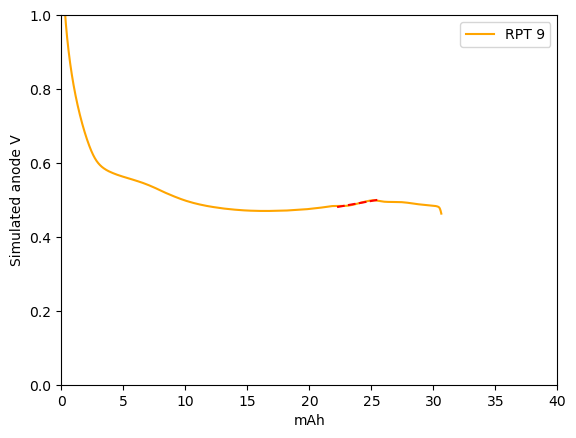

<class 'int'>


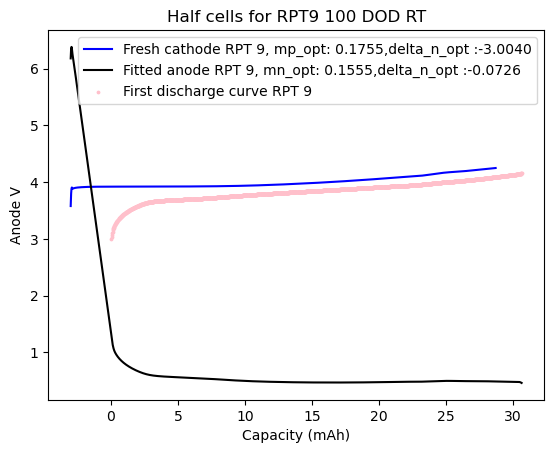

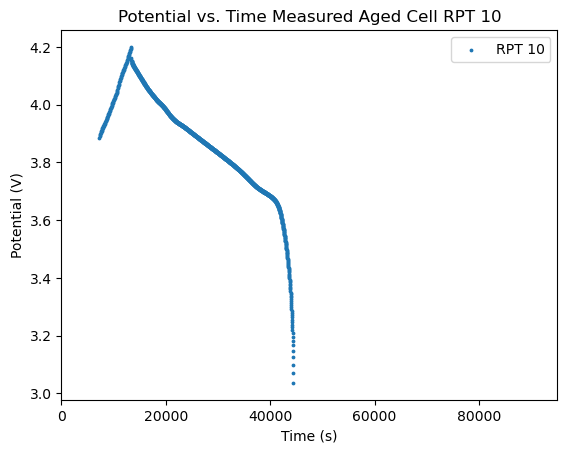

 x1 13404.70818094
 x2 13424.7081812001
 y1 4.16093635559082
 y2 4.1557035446167
Linear equation: y = -0.000262x + 7.668152
Value of y (first_potential_V_linear) for x = 13380.00022196: 4.167401
RPT 10 - capacity:  -0.030176691298018605 Ah
RPT 10 - cell_internal_resistance: 11.076844201998842 ohms
RPT 10 - cell_internal_resistance linear aproach: 9.229464818993021 ohms
RPT 10 - first_potential: 4.19969797134399
RPT 10 - last_potential: 4.16093635559082
RPT 10 - delta_potential_measured: -0.03876161575316939
RPT 10 - mean_current: -0.003499337450839542
first value 'Elapsed Time (s)': 13380.00022196
last value 'Elapsed Time (s)': 44424.7594654001
time difference s : 31044.7592434401
time difference in hours : 8.623544234288916


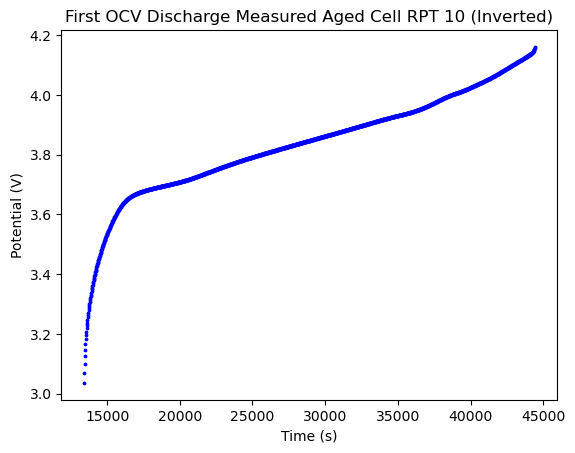

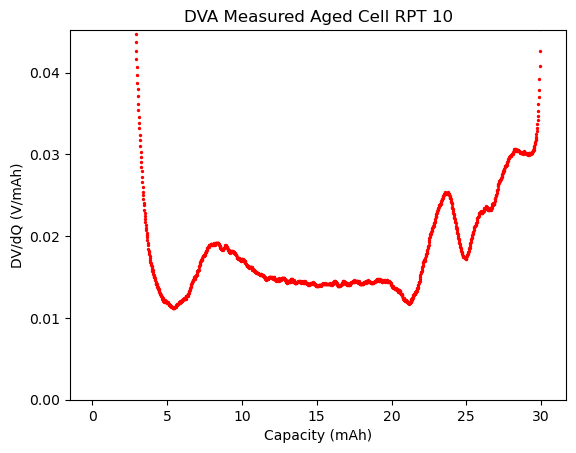

C:\Users\r342e598\anaconda\Lib\site-packages\scipy\optimize\_differentiable_functions.py:504: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(delta_x, delta_g)


Optimized parameters:
mp: 0.17367986767083007
mn: 0.15352623517511418
delta_p: -3.007266001386866
delta_n: -0.09081365980577244
Total optimization time: 6.290945529937744 seconds
limit mp: 0.17367986767083007


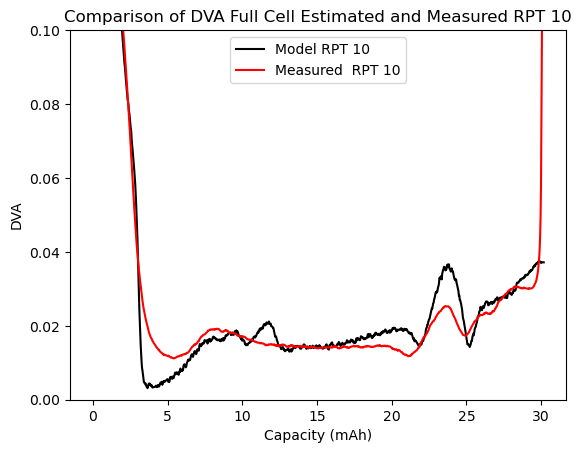

initial value Numerical integral (Trapezoidal rule): 5.530803052345531


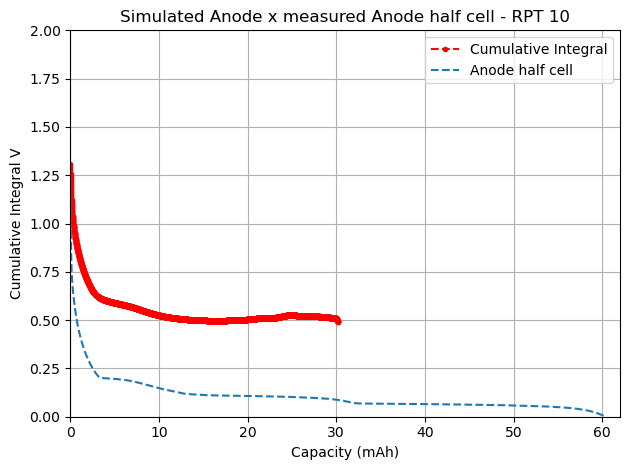

C:\Users\r342e598\AppData\Local\Temp\ipykernel_16728\1976290827.py:293: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_step, _ = curve_fit(step_function, x_region, y_region, p0=[np.mean(x_region), np.min(y_region), np.max(y_region)])


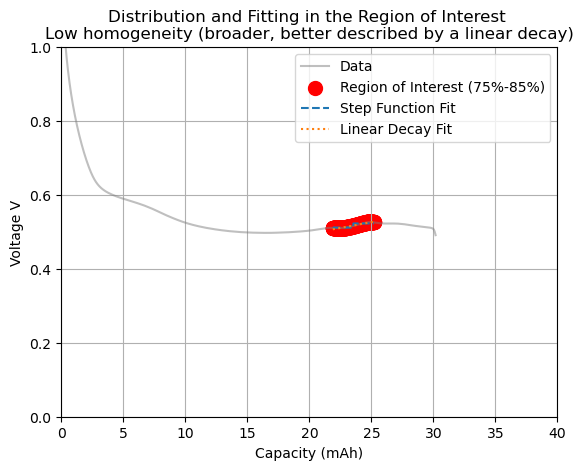

RMSE for Step Function: 0.0027
RMSE for Linear Decay: 0.0015
Homogeneity: Low homogeneity (broader, better described by a linear decay)
Slope of RPT 10  : 0.0062419919500277645


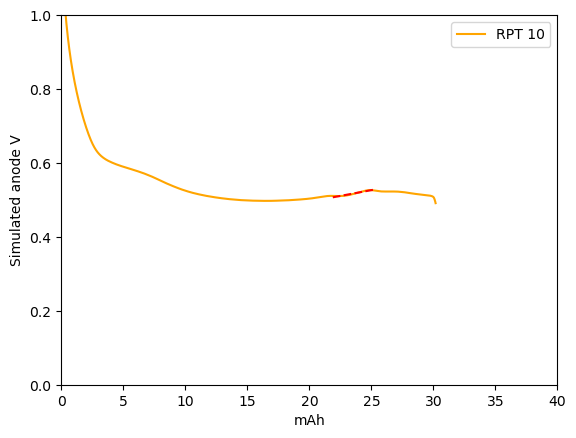

<class 'int'>


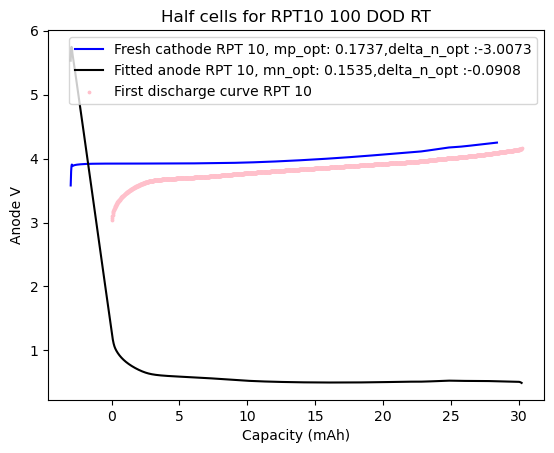

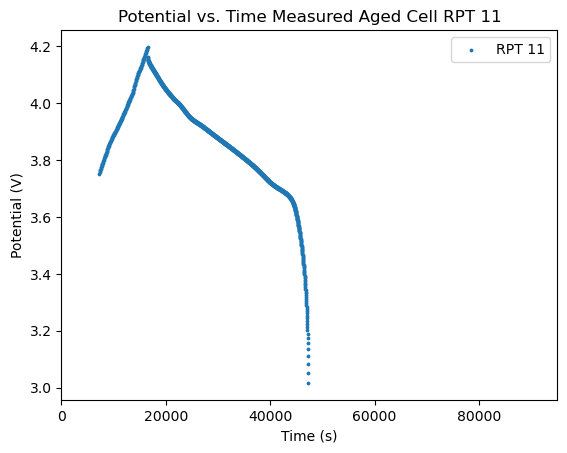

 x1 16547.6666039801
 x2 16567.6666036001
 y1 4.16392040252686
 y2 4.15885210037231
Linear equation: y = -0.000253x + 8.357349
Value of y (first_potential_V_linear) for x = 16500.0514524304: 4.175987
RPT 11 - capacity:  -0.029926712516808684 Ah
RPT 11 - cell_internal_resistance: 9.850603817945586 ohms
RPT 11 - cell_internal_resistance linear aproach: 6.402405637553729 ohms
RPT 11 - first_potential: 4.19839096069336
RPT 11 - last_potential: 4.16392040252686
RPT 11 - delta_potential_measured: -0.034470558166500354
RPT 11 - mean_current: -0.003499334538630286
first value 'Elapsed Time (s)': 16500.0514524304
last value 'Elapsed Time (s)': 47287.6666035904
time difference s : 30787.615151159996
time difference in hours : 8.552115319766665


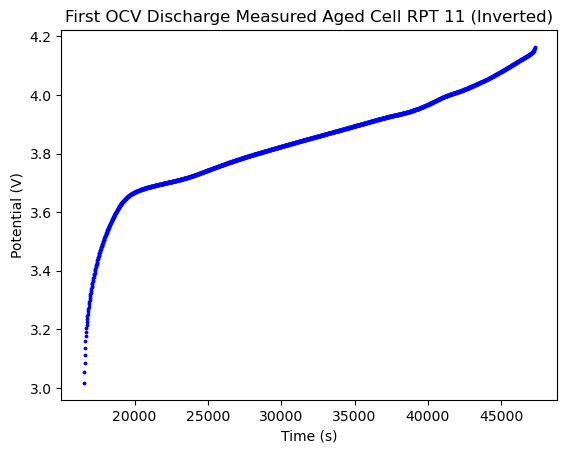

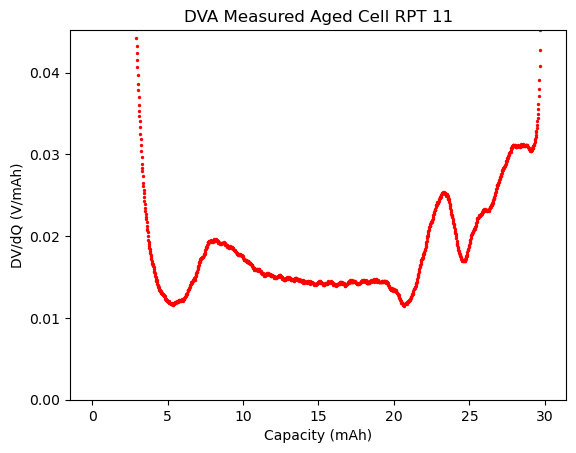

C:\Users\r342e598\anaconda\Lib\site-packages\scipy\optimize\_differentiable_functions.py:504: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(delta_x, delta_g)


Optimized parameters:
mp: 0.1718116408948384
mn: 0.15208722924577173
delta_p: -3.000578798759582
delta_n: -0.07361642117896573
Total optimization time: 6.247473239898682 seconds
limit mp: 0.1718116408948384


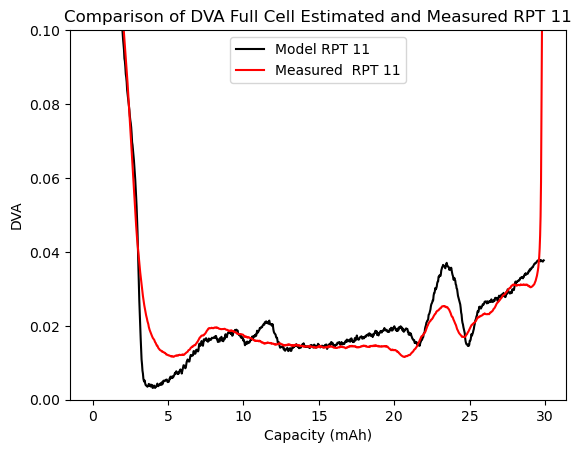

initial value Numerical integral (Trapezoidal rule): 5.97092076715743


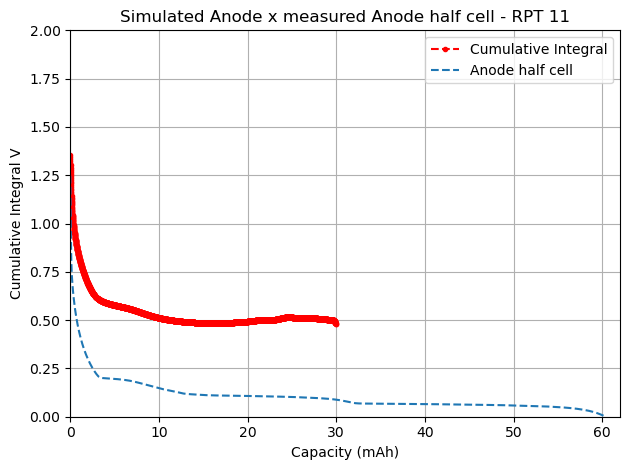

C:\Users\r342e598\AppData\Local\Temp\ipykernel_16728\1976290827.py:293: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_step, _ = curve_fit(step_function, x_region, y_region, p0=[np.mean(x_region), np.min(y_region), np.max(y_region)])


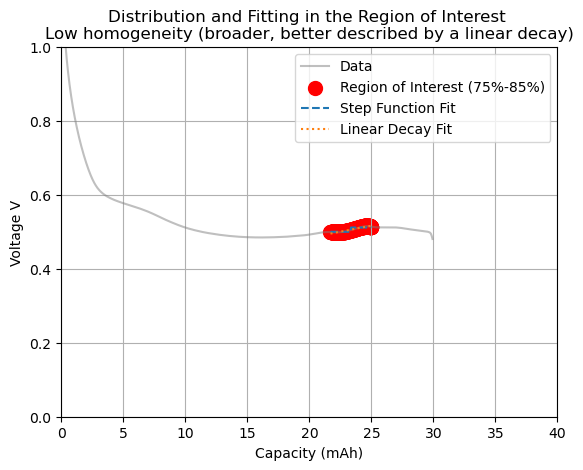

RMSE for Step Function: 0.0027
RMSE for Linear Decay: 0.0015
Homogeneity: Low homogeneity (broader, better described by a linear decay)
Slope of RPT 11  : 0.0065047469309430835


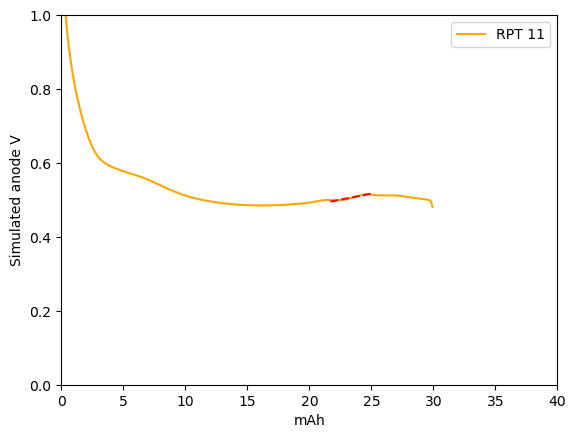

<class 'int'>


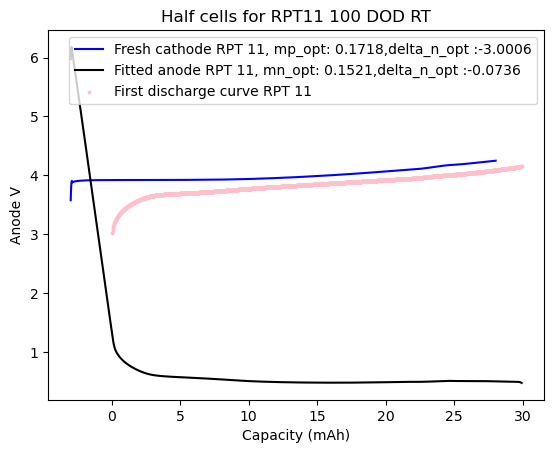

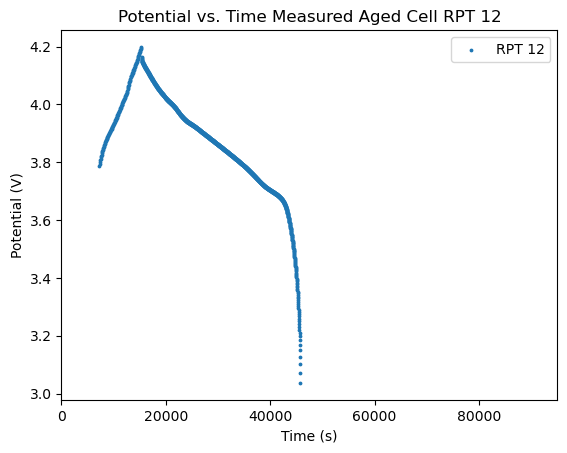

 x1 15344.56960954
 x2 15364.5696095098
 y1 4.16412210464478
 y2 4.15914487838745
Linear equation: y = -0.000249x + 7.982792
Value of y (first_potential_V_linear) for x = 15300.0514611197: 4.175201
RPT 12 - capacity:  -0.029611684345249252 Ah
RPT 12 - cell_internal_resistance: 9.836633355860743 ohms
RPT 12 - cell_internal_resistance linear aproach: 6.670538560510186 ohms
RPT 12 - first_potential: 4.19854259490967
RPT 12 - last_potential: 4.16412210464478
RPT 12 - delta_potential_measured: -0.034420490264889914
RPT 12 - mean_current: -0.003499214519811488
first value 'Elapsed Time (s)': 15300.0514611197
last value 'Elapsed Time (s)': 45764.6208778699
time difference s : 30464.5694167502
time difference in hours : 8.462380393541723


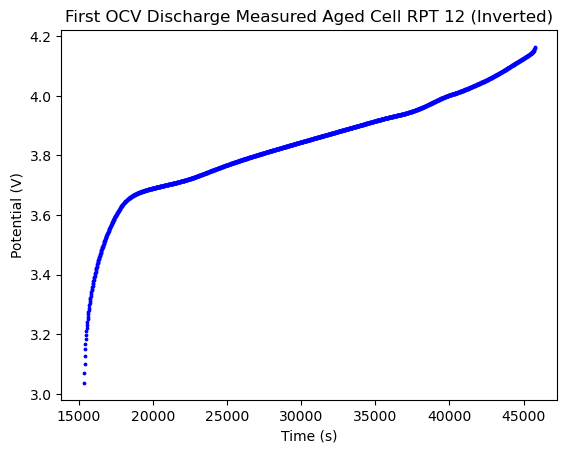

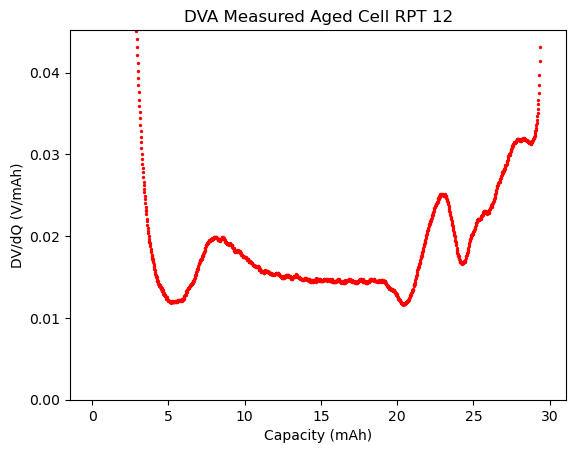

C:\Users\r342e598\anaconda\Lib\site-packages\scipy\optimize\_differentiable_functions.py:504: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(delta_x, delta_g)


Optimized parameters:
mp: 0.17079050416824088
mn: 0.15072551284572241
delta_p: -3.0032108659332435
delta_n: -0.08187531070552409
Total optimization time: 2.450732707977295 seconds
limit mp: 0.17079050416824088


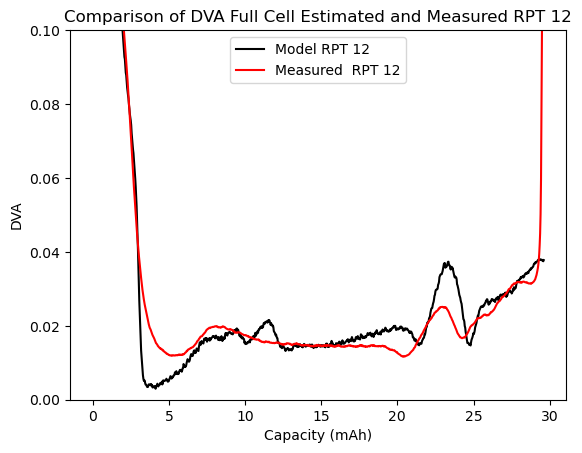

initial value Numerical integral (Trapezoidal rule): 5.62038616947954


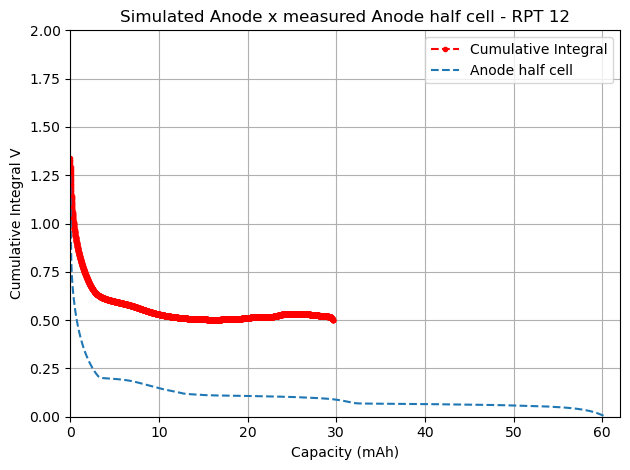

C:\Users\r342e598\AppData\Local\Temp\ipykernel_16728\1976290827.py:293: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_step, _ = curve_fit(step_function, x_region, y_region, p0=[np.mean(x_region), np.min(y_region), np.max(y_region)])


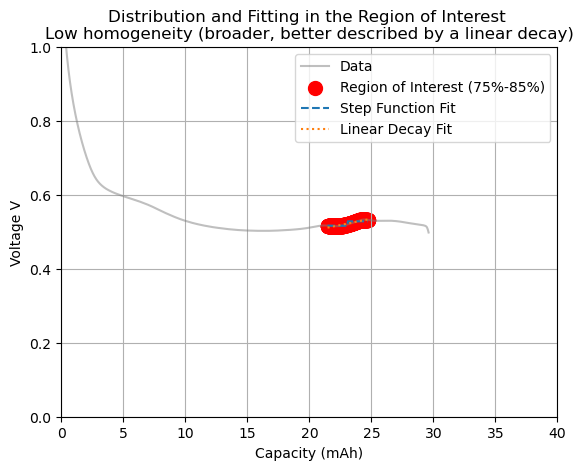

RMSE for Step Function: 0.0032
RMSE for Linear Decay: 0.0021
Homogeneity: Low homogeneity (broader, better described by a linear decay)
Slope of RPT 12  : 0.006815675751646215


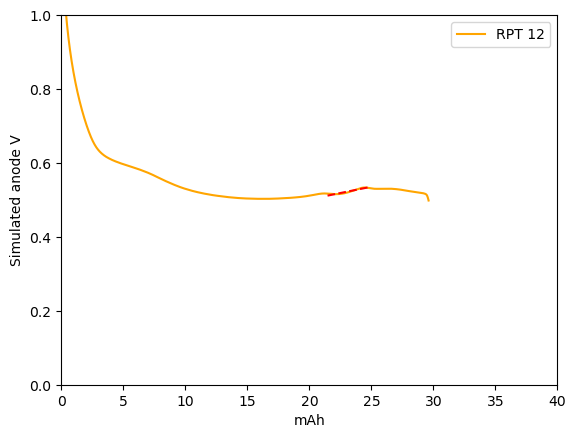

<class 'int'>


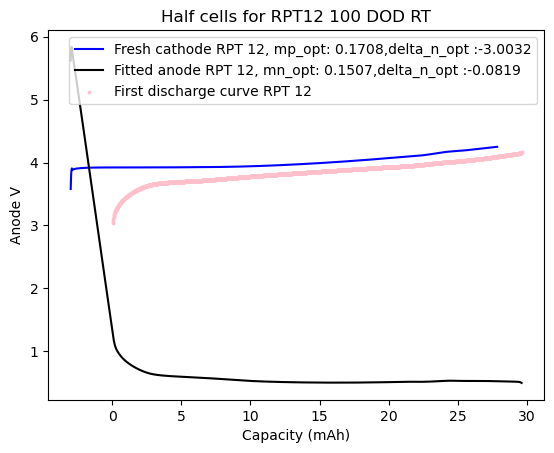

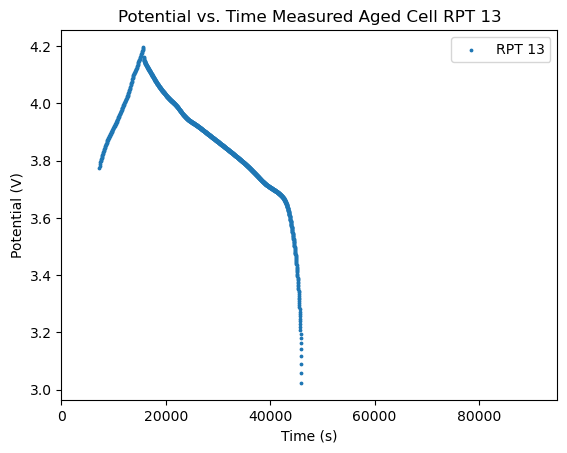

 x1 15779.7740314701
 x2 15799.77403181
 y1 4.16367769241333
 y2 4.15863132476807
Linear equation: y = -0.000252x + 8.145205
Value of y (first_potential_V_linear) for x = 15720.1540045599: 4.178721
RPT 13 - capacity:  -0.029375860301654594 Ah
RPT 13 - cell_internal_resistance: 9.72129643224971 ohms
RPT 13 - cell_internal_resistance linear aproach: 5.422590941680243 ohms
RPT 13 - first_potential: 4.19769716262817
RPT 13 - last_potential: 4.16367769241333
RPT 13 - delta_potential_measured: -0.0340194702148402
RPT 13 - mean_current: -0.0034994787425659626
first value 'Elapsed Time (s)': 15720.1540045599
last value 'Elapsed Time (s)': 45939.8252372001
time difference s : 30219.6712326402
time difference in hours : 8.394353120177835


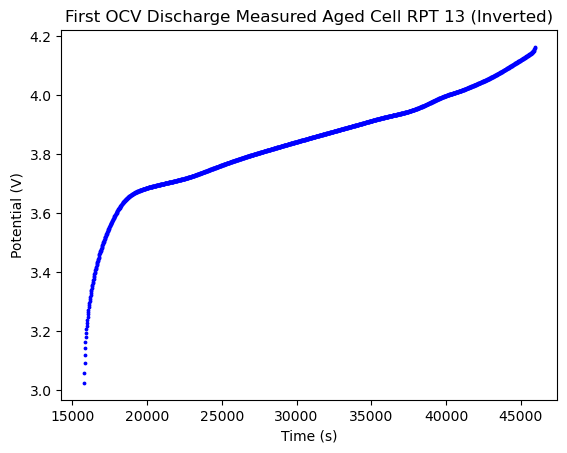

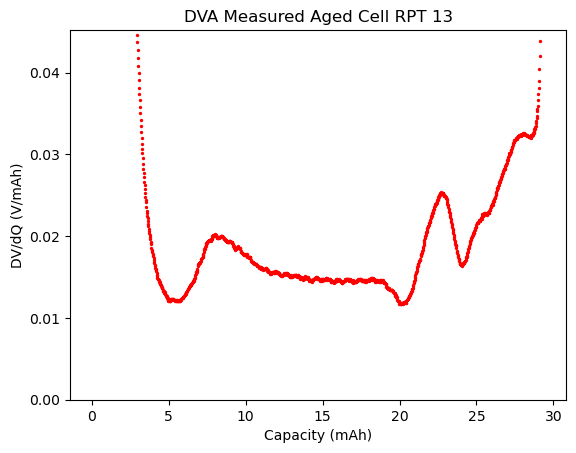

C:\Users\r342e598\anaconda\Lib\site-packages\scipy\optimize\_differentiable_functions.py:504: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(delta_x, delta_g)


Optimized parameters:
mp: 0.17036269101960694
mn: 0.15026110719879449
delta_p: -3.1948781443510845
delta_n: -0.07066876685440872
Total optimization time: 7.580724477767944 seconds
limit mp: 0.17036269101960694


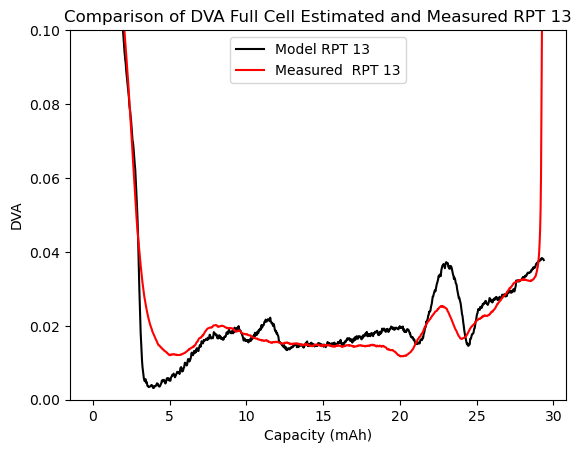

initial value Numerical integral (Trapezoidal rule): 6.221991465000612


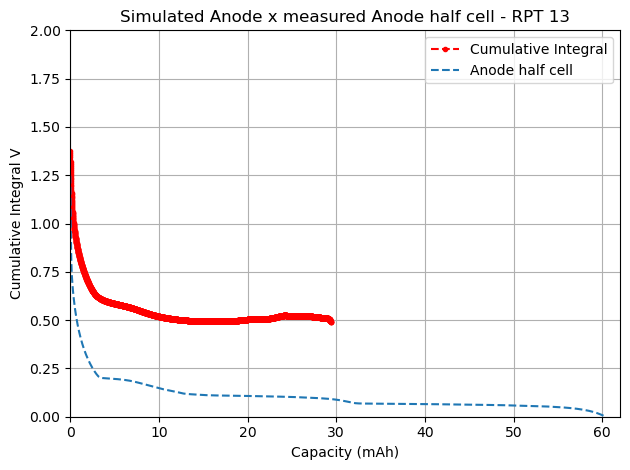

C:\Users\r342e598\AppData\Local\Temp\ipykernel_16728\1976290827.py:293: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_step, _ = curve_fit(step_function, x_region, y_region, p0=[np.mean(x_region), np.min(y_region), np.max(y_region)])


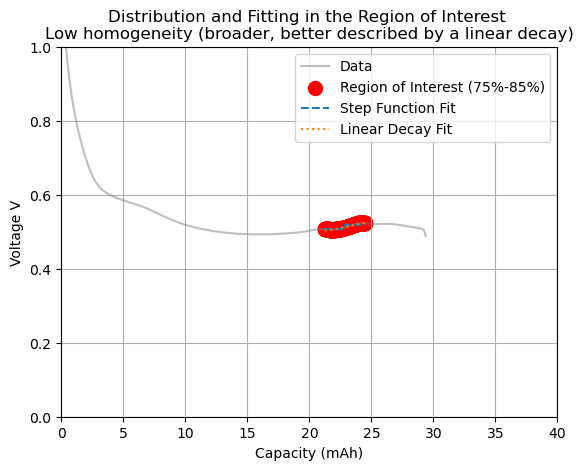

RMSE for Step Function: 0.0031
RMSE for Linear Decay: 0.0020
Homogeneity: Low homogeneity (broader, better described by a linear decay)
Slope of RPT 13  : 0.006906619759367797


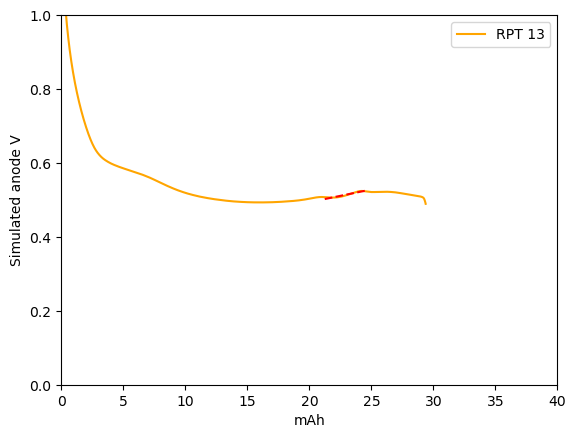

<class 'int'>


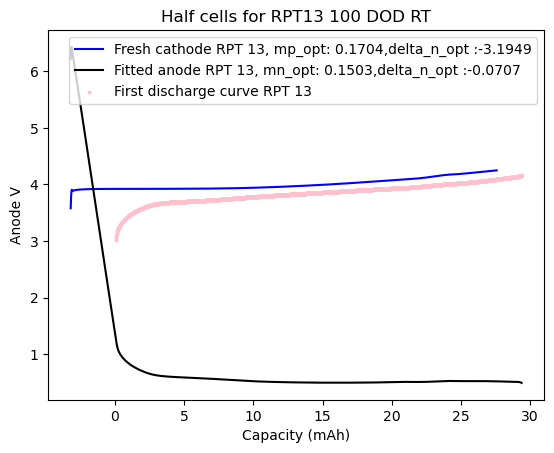

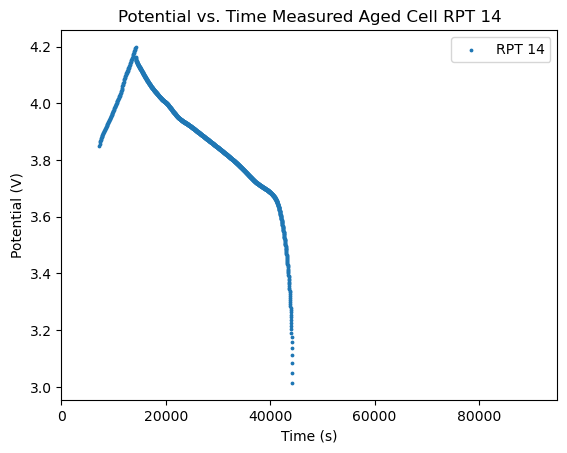

 x1 14262.7715900298
 x2 14282.77159118
 y1 4.16436100006104
 y2 4.15923500061035
Linear equation: y = -0.000256x + 7.819909
Value of y (first_potential_V_linear) for x = 14220.1537877098: 4.175284
RPT 14 - capacity:  -0.029145564040580222 Ah
RPT 14 - cell_internal_resistance: 9.805594613513549 ohms
RPT 14 - cell_internal_resistance linear aproach: 6.684304269871846 ohms
RPT 14 - first_potential: 4.19867563247681
RPT 14 - last_potential: 4.16436100006104
RPT 14 - delta_potential_measured: -0.034314632415770596
RPT 14 - mean_current: -0.0034994953155089645
first value 'Elapsed Time (s)': 14220.1537877098
last value 'Elapsed Time (s)': 44202.7715900796
time difference s : 29982.6178023698
time difference in hours : 8.328504945102722


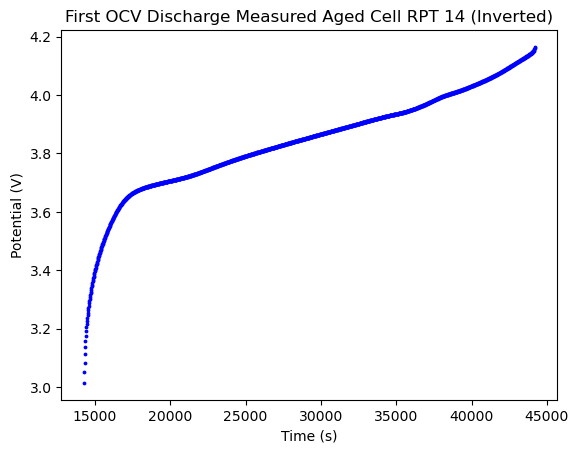

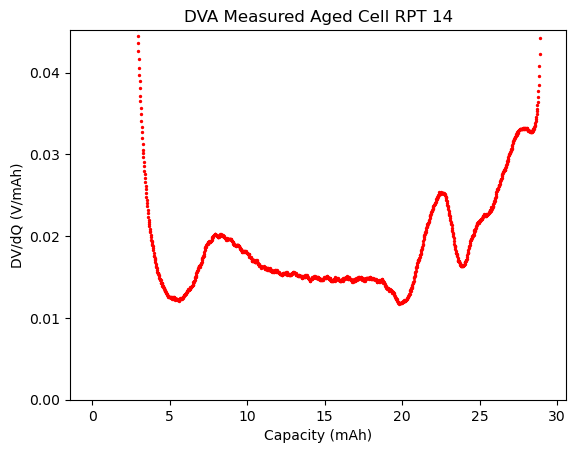

C:\Users\r342e598\anaconda\Lib\site-packages\scipy\optimize\_differentiable_functions.py:504: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(delta_x, delta_g)


Optimized parameters:
mp: 0.17010212483560588
mn: 0.15000410175962486
delta_p: -3.4589556500229786
delta_n: -0.07321504330441528
Total optimization time: 6.567698955535889 seconds
limit mp: 0.17010212483560588


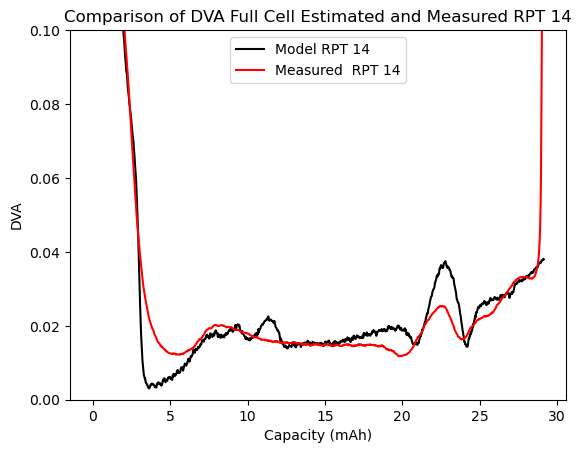

initial value Numerical integral (Trapezoidal rule): 6.826603559307313


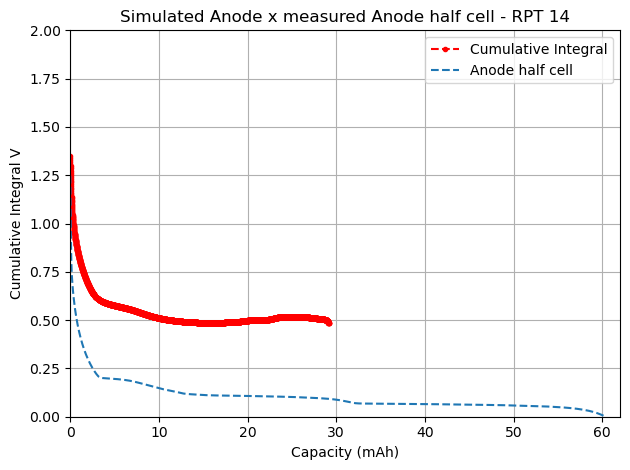

C:\Users\r342e598\AppData\Local\Temp\ipykernel_16728\1976290827.py:293: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_step, _ = curve_fit(step_function, x_region, y_region, p0=[np.mean(x_region), np.min(y_region), np.max(y_region)])


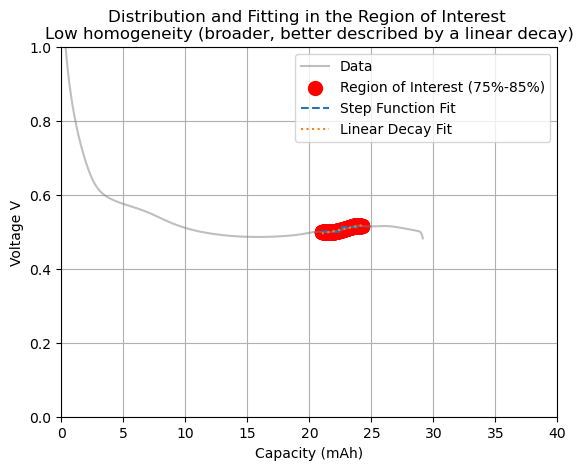

RMSE for Step Function: 0.0029
RMSE for Linear Decay: 0.0017
Homogeneity: Low homogeneity (broader, better described by a linear decay)
Slope of RPT 14  : 0.006892764420441208


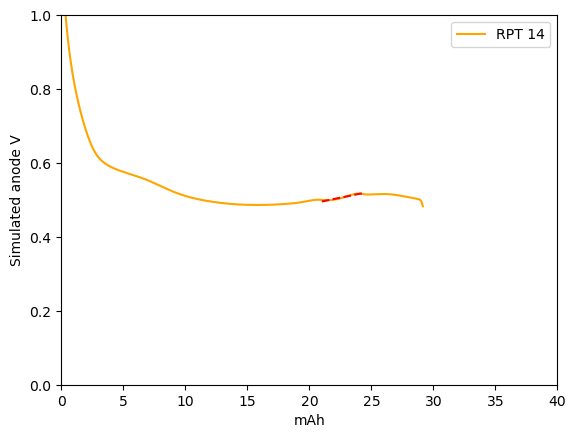

<class 'int'>


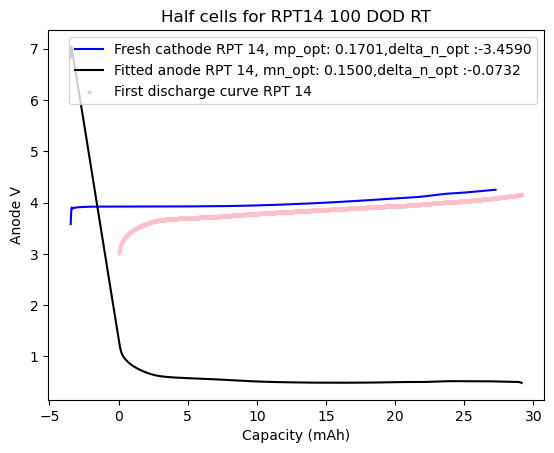

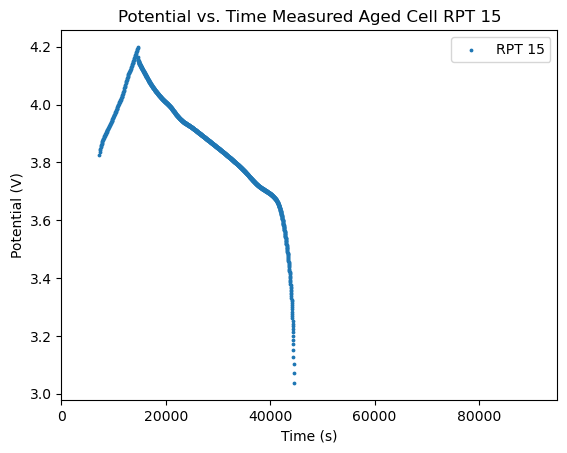

 x1 14671.1665715501
 x2 14691.1665715594
 y1 4.16344356536865
 y2 4.15845680236816
Linear equation: y = -0.000249x + 7.821525
Value of y (first_potential_V_linear) for x = 14640.1540016802: 4.171176
RPT 15 - capacity:  -0.029035866319882763 Ah
RPT 15 - cell_internal_resistance: 10.259218404579903 ohms
RPT 15 - cell_internal_resistance linear aproach: 8.049488749841347 ohms
RPT 15 - first_potential: 4.19934415817261
RPT 15 - last_potential: 4.16344356536865
RPT 15 - delta_potential_measured: -0.03590059280396041
RPT 15 - mean_current: -0.0034993496958729067
first value 'Elapsed Time (s)': 14640.1540016802
last value 'Elapsed Time (s)': 44511.1665714895
time difference s : 29871.0125698093
time difference in hours : 8.297503491613694


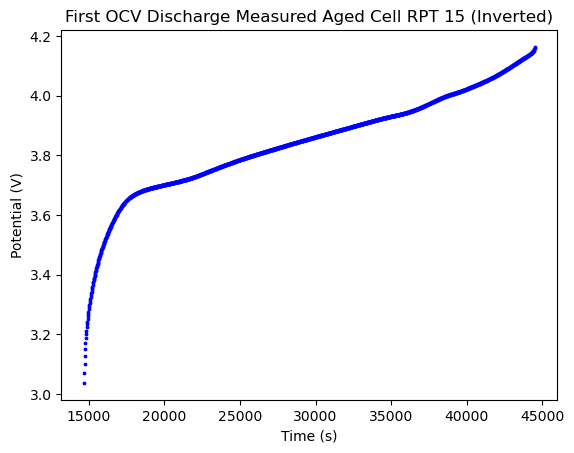

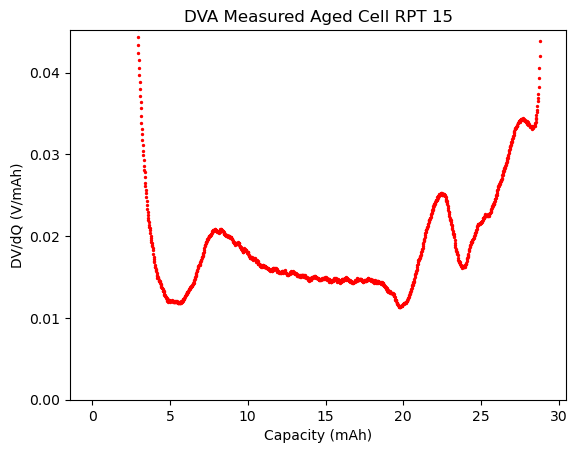

C:\Users\r342e598\anaconda\Lib\site-packages\scipy\optimize\_differentiable_functions.py:504: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(delta_x, delta_g)


Optimized parameters:
mp: 0.17005733101767212
mn: 0.15000484830090977
delta_p: -3.6272630938967607
delta_n: -0.0855713964317526
Total optimization time: 7.3772501945495605 seconds
limit mp: 0.17005733101767212


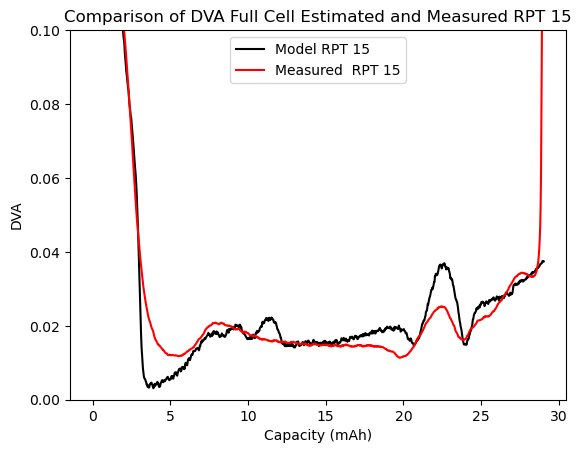

initial value Numerical integral (Trapezoidal rule): 6.609079896696075


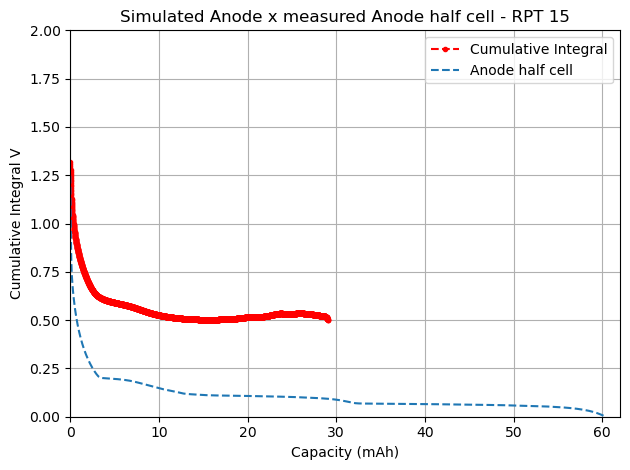

C:\Users\r342e598\AppData\Local\Temp\ipykernel_16728\1976290827.py:293: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_step, _ = curve_fit(step_function, x_region, y_region, p0=[np.mean(x_region), np.min(y_region), np.max(y_region)])


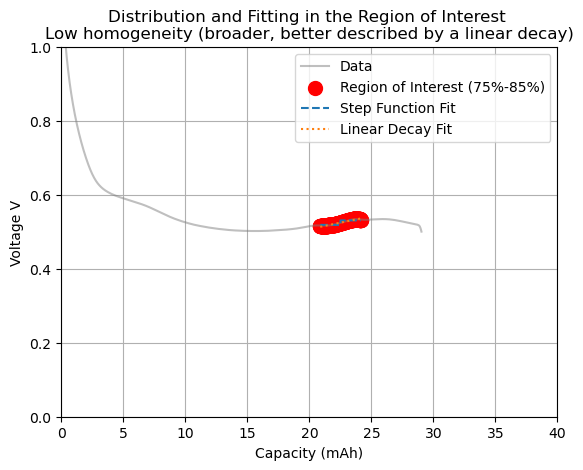

RMSE for Step Function: 0.0027
RMSE for Linear Decay: 0.0014
Homogeneity: Low homogeneity (broader, better described by a linear decay)
Slope of RPT 15  : 0.006896525174053235


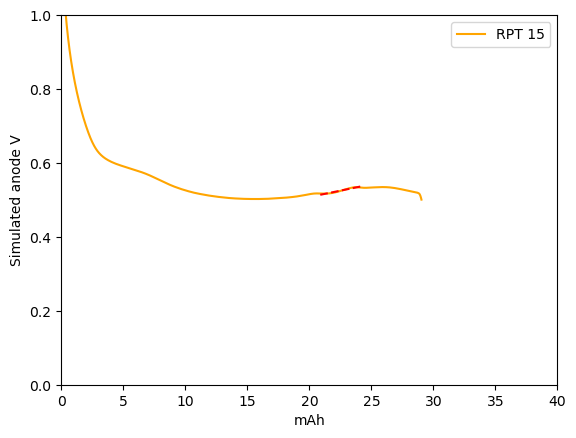

<class 'int'>


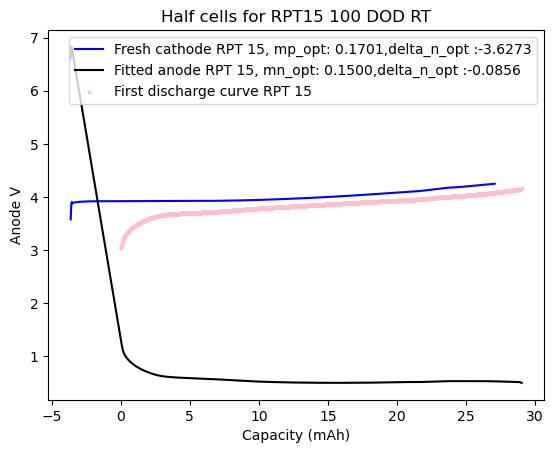

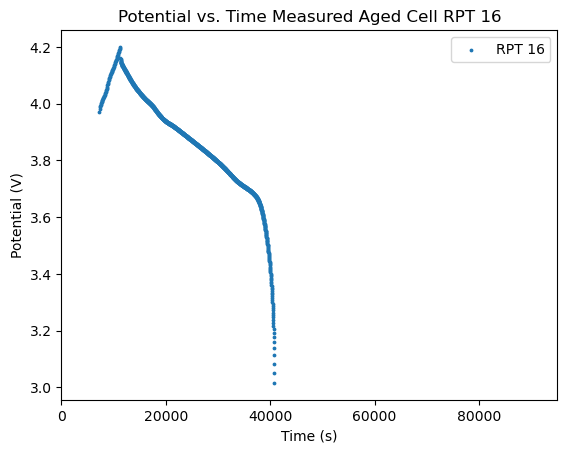

 x1 11301.2603473002
 x2 11321.2603471903
 y1 4.16185092926025
 y2 4.15658807754517
Linear equation: y = -0.000263x + 7.135694
Value of y (first_potential_V_linear) for x = 11280.0513319103: 4.167432
RPT 16 - capacity:  -0.028696694505373033 Ah
RPT 16 - cell_internal_resistance: 10.877574125649836 ohms
RPT 16 - cell_internal_resistance linear aproach: 9.282749551277652 ohms
RPT 16 - first_potential: 4.19991636276245
RPT 16 - last_potential: 4.16185092926025
RPT 16 - delta_potential_measured: -0.03806543350219993
RPT 16 - mean_current: -0.0034994414253119023
first value 'Elapsed Time (s)': 11280.0513319103
last value 'Elapsed Time (s)': 40801.3627823899
time difference s : 29521.311450479603
time difference in hours : 8.20036429179989


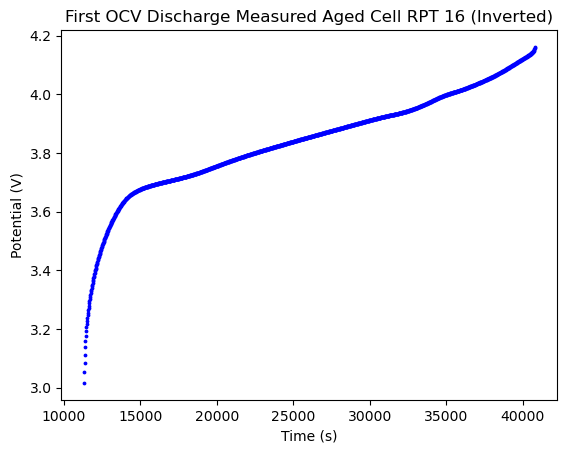

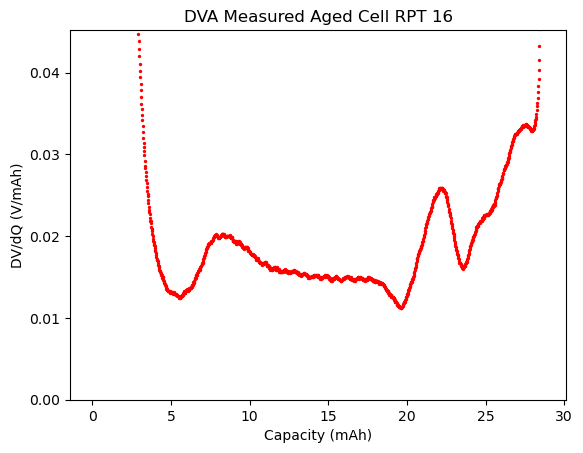

C:\Users\r342e598\anaconda\Lib\site-packages\scipy\optimize\_differentiable_functions.py:504: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(delta_x, delta_g)


Optimized parameters:
mp: 0.17002882315785275
mn: 0.1500353929979788
delta_p: -3.3311211134963807
delta_n: -0.08191467462601178
Total optimization time: 5.587181806564331 seconds
limit mp: 0.17002882315785275


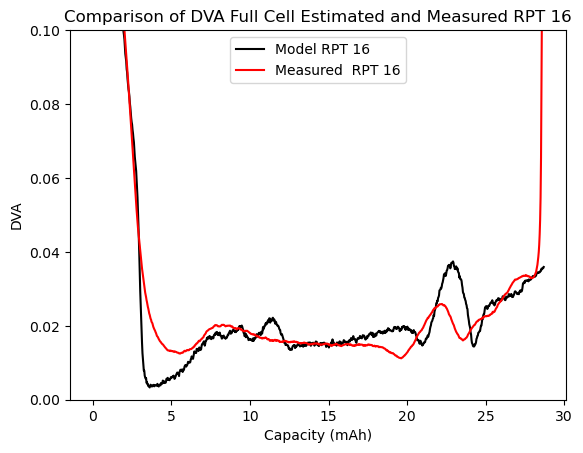

initial value Numerical integral (Trapezoidal rule): 6.561788336901869


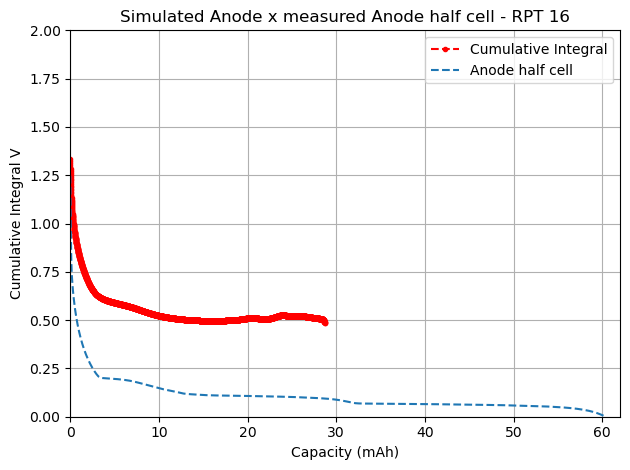

C:\Users\r342e598\AppData\Local\Temp\ipykernel_16728\1976290827.py:293: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_step, _ = curve_fit(step_function, x_region, y_region, p0=[np.mean(x_region), np.min(y_region), np.max(y_region)])


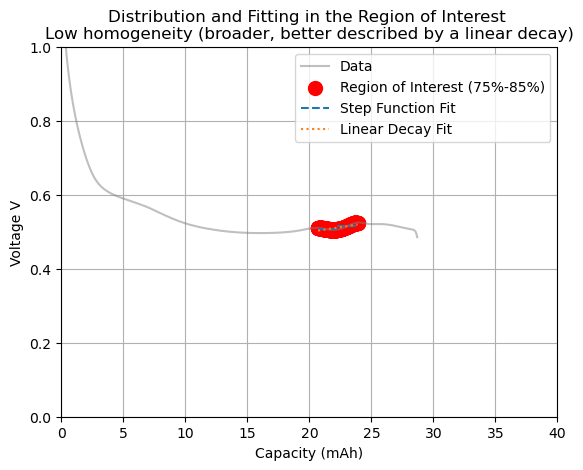

RMSE for Step Function: 0.0045
RMSE for Linear Decay: 0.0039
Homogeneity: Low homogeneity (broader, better described by a linear decay)
Slope of RPT 16  : 0.0051909418330584635


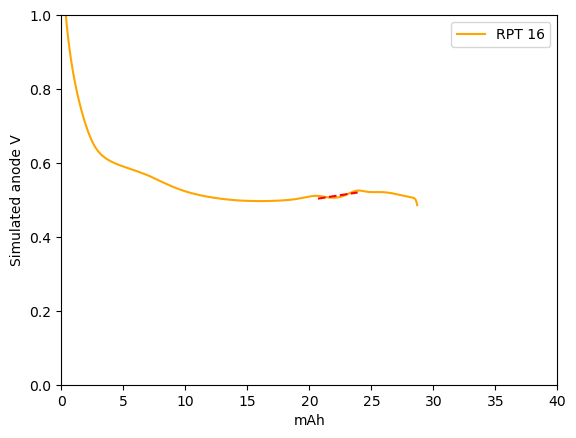

<class 'int'>


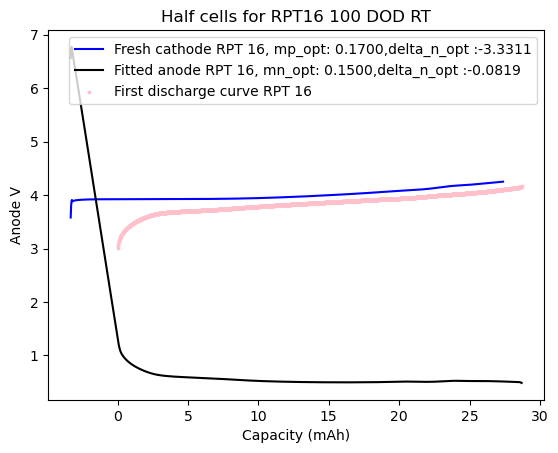

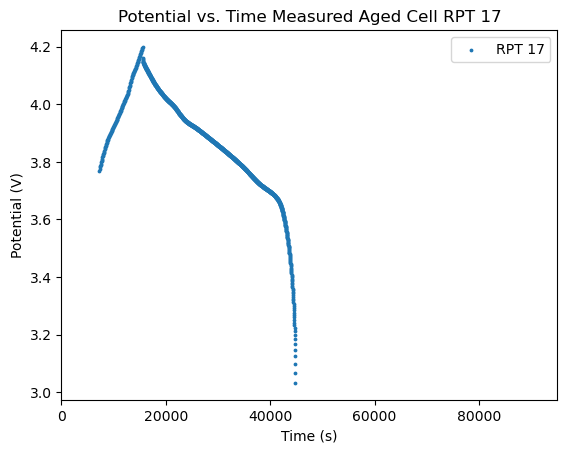

 x1 15576.6691132095
 x2 15596.6691132197
 y1 4.1612548828125
 y2 4.15593194961548
Linear equation: y = -0.000266x + 8.306933
Value of y (first_potential_V_linear) for x = 15540.1539284801: 4.170973
RPT 17 - capacity:  -0.028477571417002086 Ah
RPT 17 - cell_internal_resistance: 10.793496063957235 ohms
RPT 17 - cell_internal_resistance linear aproach: 8.016299910155487 ohms
RPT 17 - first_potential: 4.19902515411377
RPT 17 - last_potential: 4.1612548828125
RPT 17 - delta_potential_measured: -0.03777027130127042
RPT 17 - mean_current: -0.0034993547111576606
first value 'Elapsed Time (s)': 15540.1539284801
last value 'Elapsed Time (s)': 44836.7716089701
time difference s : 29296.61768049
time difference in hours : 8.137949355691667


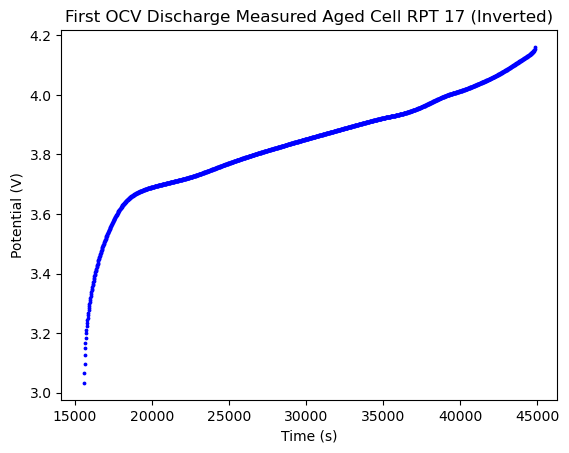

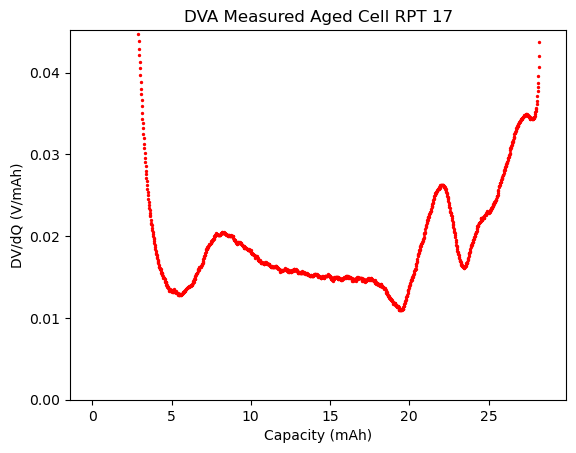

C:\Users\r342e598\anaconda\Lib\site-packages\scipy\optimize\_differentiable_functions.py:504: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(delta_x, delta_g)


Optimized parameters:
mp: 0.17001370044137448
mn: 0.15001706636483886
delta_p: -3.8913498365943338
delta_n: -0.08144375718112909
Total optimization time: 7.576315402984619 seconds
limit mp: 0.17001370044137448


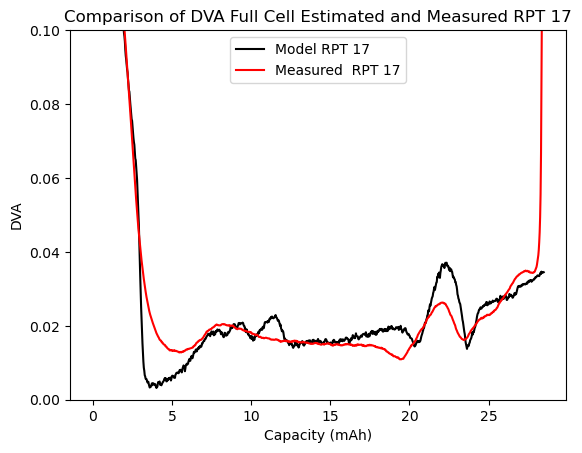

initial value Numerical integral (Trapezoidal rule): 7.145140636539165


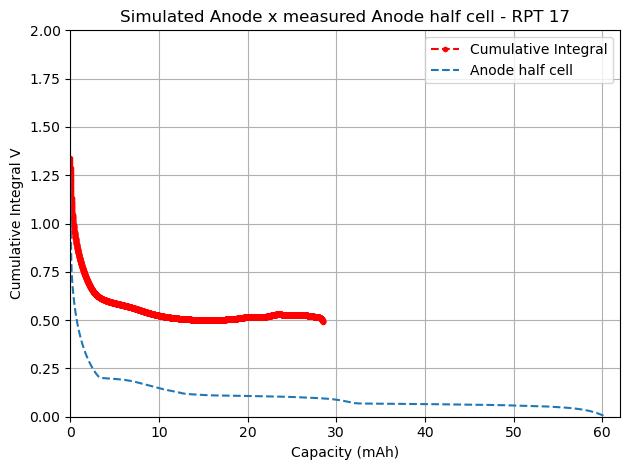

C:\Users\r342e598\AppData\Local\Temp\ipykernel_16728\1976290827.py:293: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_step, _ = curve_fit(step_function, x_region, y_region, p0=[np.mean(x_region), np.min(y_region), np.max(y_region)])


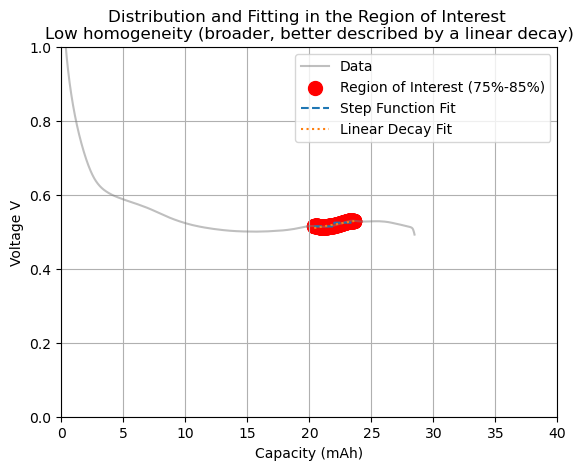

RMSE for Step Function: 0.0030
RMSE for Linear Decay: 0.0021
Homogeneity: Low homogeneity (broader, better described by a linear decay)
Slope of RPT 17  : 0.005903221880748066


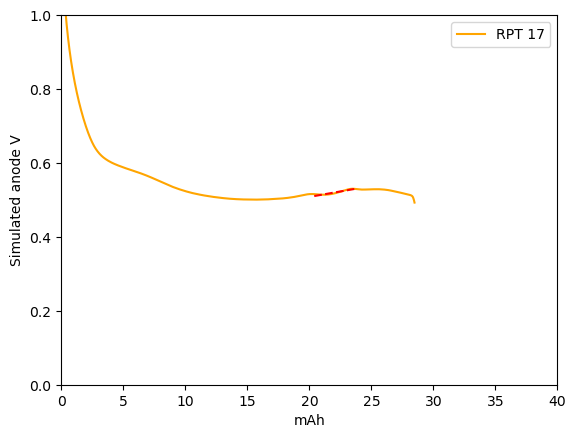

<class 'int'>


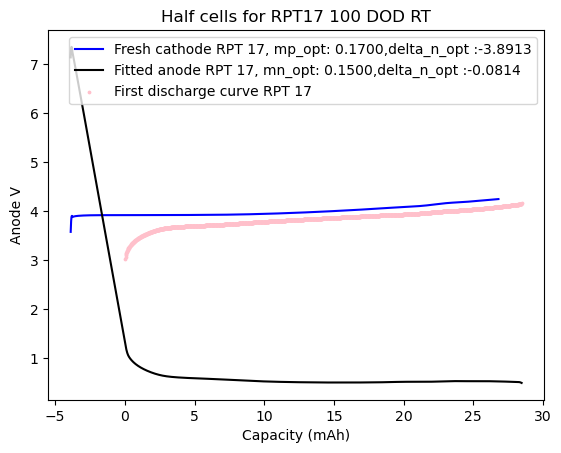

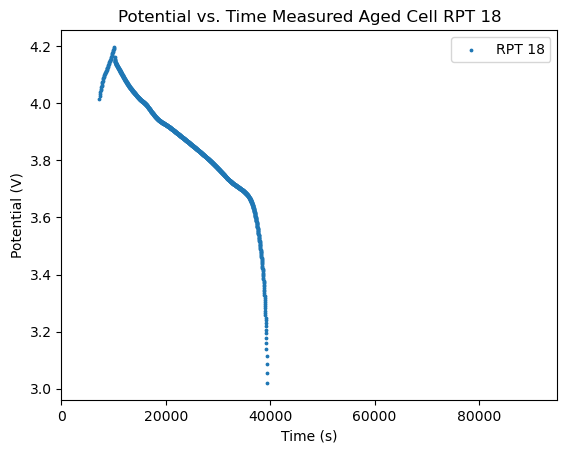

 x1 10189.0662048198
 x2 10209.0662048096
 y1 4.16252946853638
 y2 4.15732431411743
Linear equation: y = -0.000260x + 6.814313
Value of y (first_potential_V_linear) for x = 10140.0514002396: 4.175286
RPT 18 - capacity:  -0.028393088625561422 Ah
RPT 18 - cell_internal_resistance: 10.211441949719884 ohms
RPT 18 - cell_internal_resistance linear aproach: 6.566134265535381 ohms
RPT 18 - first_potential: 4.19826364517212
RPT 18 - last_potential: 4.16252946853638
RPT 18 - delta_potential_measured: -0.03573417663574041
RPT 18 - mean_current: -0.003499425136204261
first value 'Elapsed Time (s)': 10140.0514002396
last value 'Elapsed Time (s)': 39349.1686333893
time difference s : 29209.1172331497
time difference in hours : 8.113643675874917


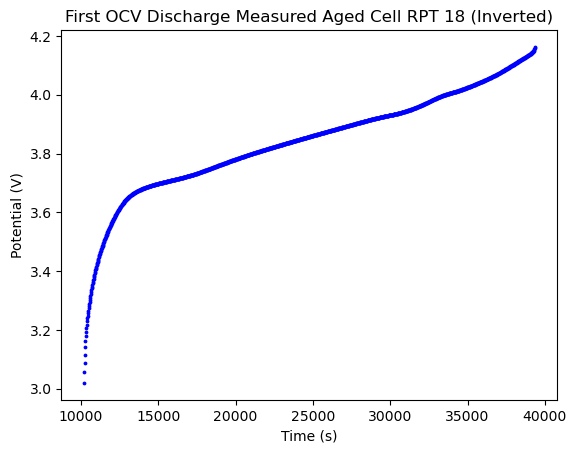

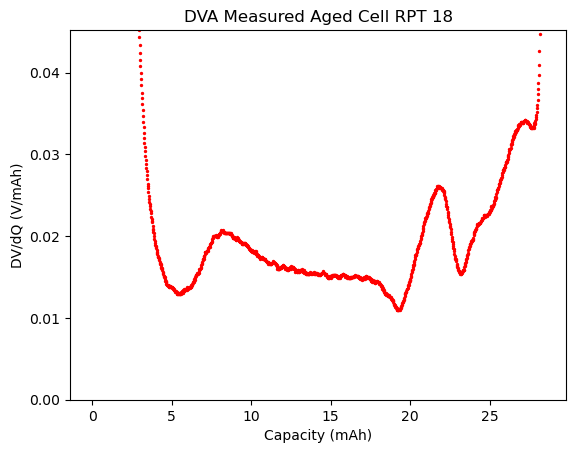

C:\Users\r342e598\anaconda\Lib\site-packages\scipy\optimize\_differentiable_functions.py:504: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(delta_x, delta_g)


Optimized parameters:
mp: 0.17000647935740137
mn: 0.1500552976434224
delta_p: -3.9891265934914113
delta_n: -0.07229376018052044
Total optimization time: 5.228938579559326 seconds
limit mp: 0.17000647935740137


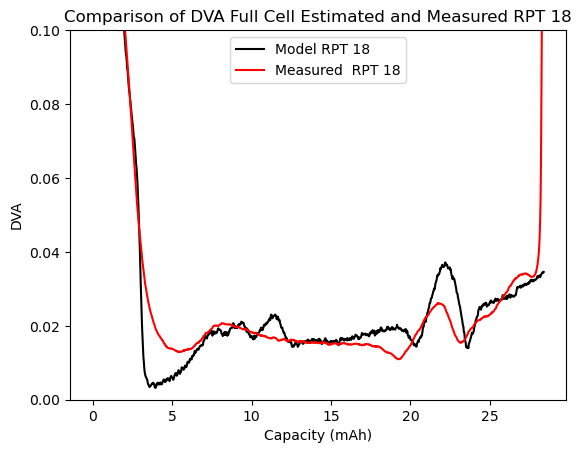

initial value Numerical integral (Trapezoidal rule): 7.611330083869382


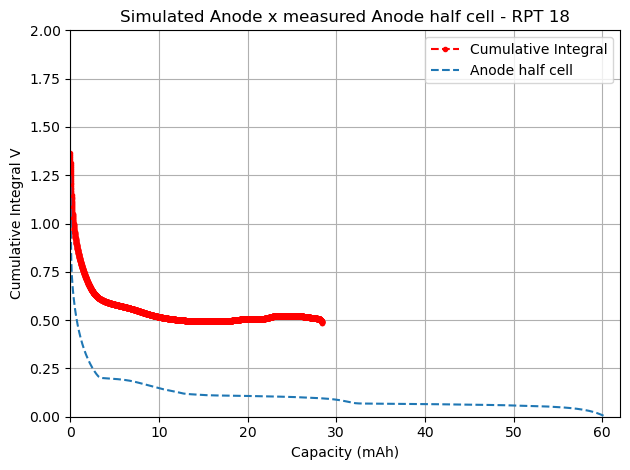

C:\Users\r342e598\AppData\Local\Temp\ipykernel_16728\1976290827.py:293: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_step, _ = curve_fit(step_function, x_region, y_region, p0=[np.mean(x_region), np.min(y_region), np.max(y_region)])


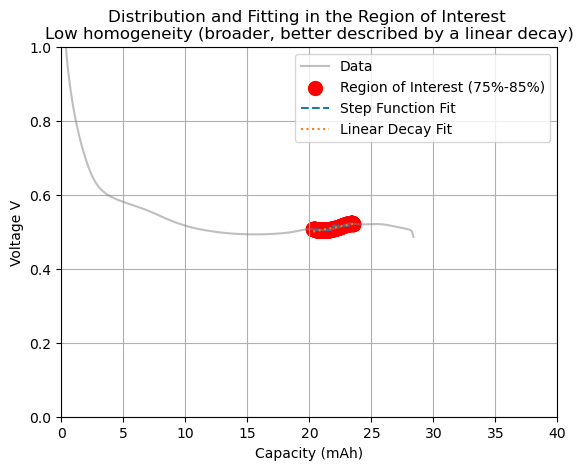

RMSE for Step Function: 0.0035
RMSE for Linear Decay: 0.0025
Homogeneity: Low homogeneity (broader, better described by a linear decay)
Slope of RPT 18  : 0.0063888788064957475


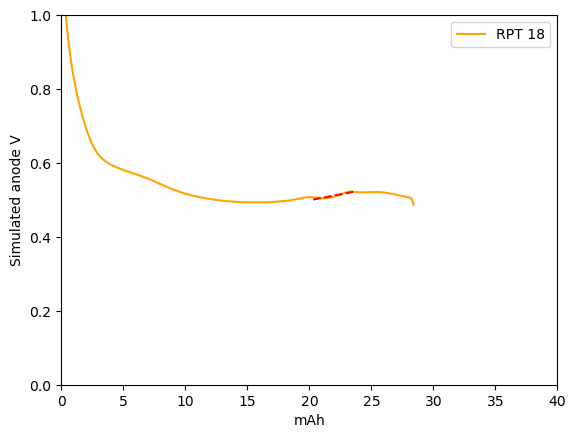

<class 'int'>


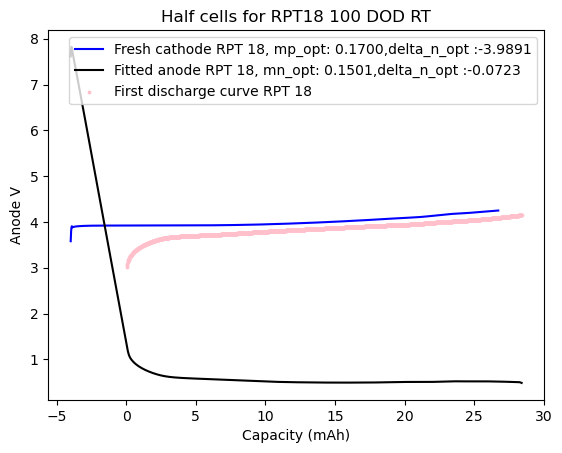

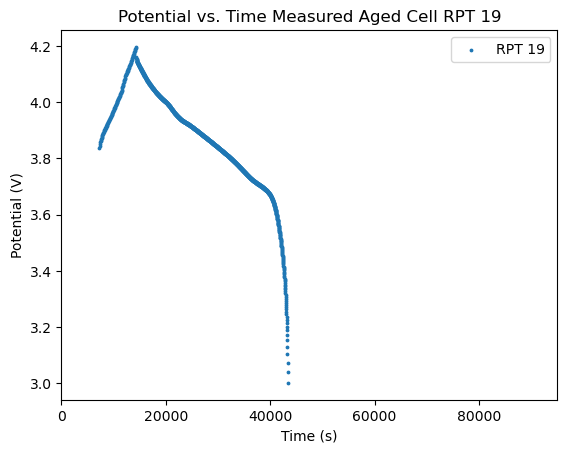

 x1 14350.3129585097
 x2 14370.3129584398
 y1 4.16292428970337
 y2 4.15773677825928
Linear equation: y = -0.000259x + 7.885045
Value of y (first_potential_V_linear) for x = 14280.1025966005: 4.181135
RPT 19 - capacity:  -0.02825864190424421 Ah
RPT 19 - cell_internal_resistance: 9.759024085002407 ohms
RPT 19 - cell_internal_resistance linear aproach: 4.555156902427269 ohms
RPT 19 - first_potential: 4.19707584381104
RPT 19 - last_potential: 4.16292428970337
RPT 19 - delta_potential_measured: -0.03415155410766957
RPT 19 - mean_current: -0.0034994845601573434
first value 'Elapsed Time (s)': 14280.1025966005
last value 'Elapsed Time (s)': 43350.4154116698
time difference s : 29070.312815069297
time difference in hours : 8.075086893074804


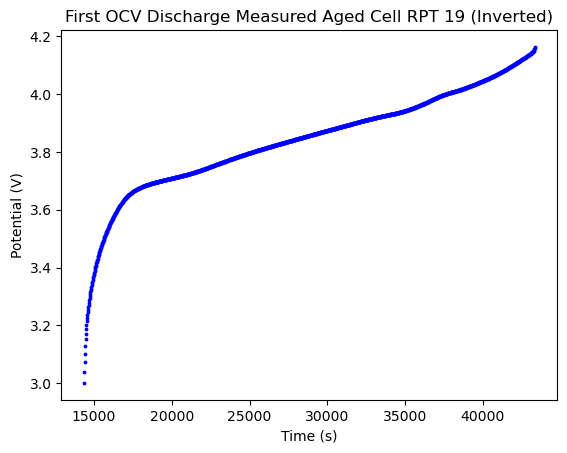

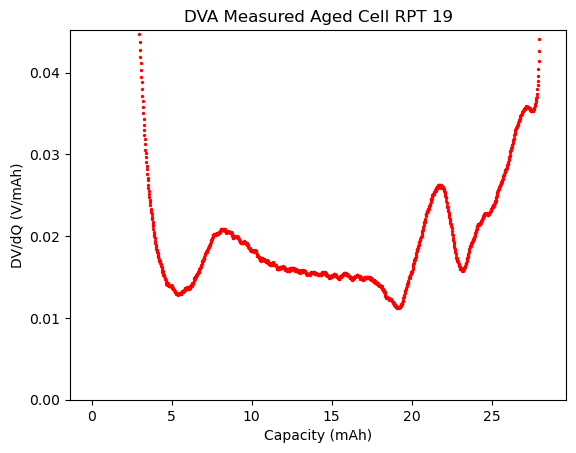

C:\Users\r342e598\anaconda\Lib\site-packages\scipy\optimize\_differentiable_functions.py:504: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(delta_x, delta_g)


Optimized parameters:
mp: 0.17000315362545937
mn: 0.1500269539899372
delta_p: -3.9909434313767944
delta_n: -0.05923706807842355
Total optimization time: 4.727333068847656 seconds
limit mp: 0.17000315362545937


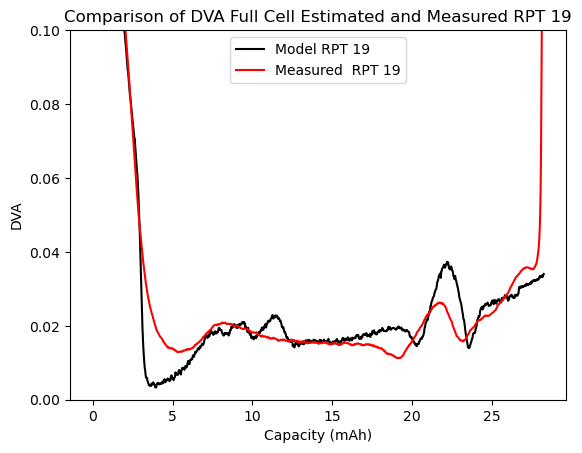

initial value Numerical integral (Trapezoidal rule): 8.134214086495799


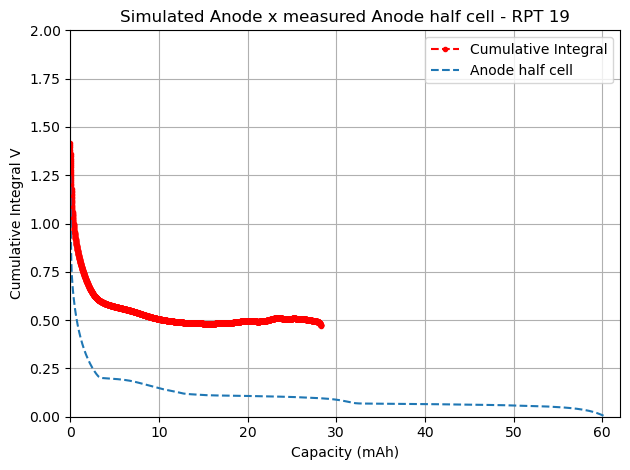

C:\Users\r342e598\AppData\Local\Temp\ipykernel_16728\1976290827.py:293: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_step, _ = curve_fit(step_function, x_region, y_region, p0=[np.mean(x_region), np.min(y_region), np.max(y_region)])


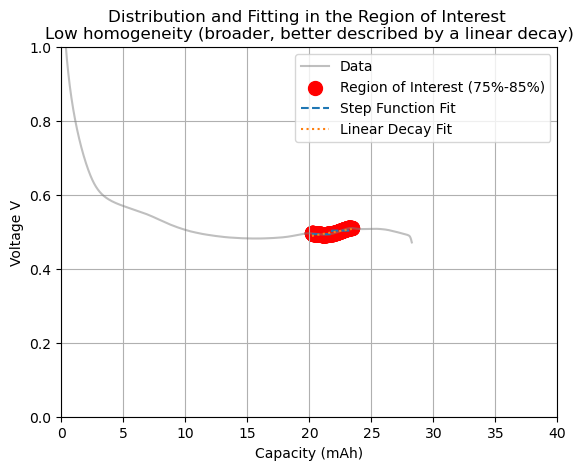

RMSE for Step Function: 0.0037
RMSE for Linear Decay: 0.0030
Homogeneity: Low homogeneity (broader, better described by a linear decay)
Slope of RPT 19  : 0.0057377329439634054


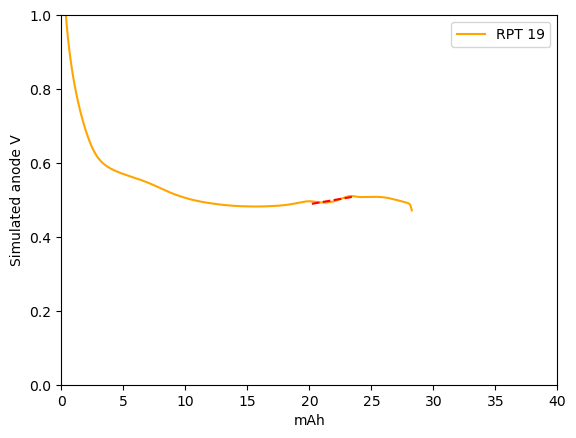

<class 'int'>


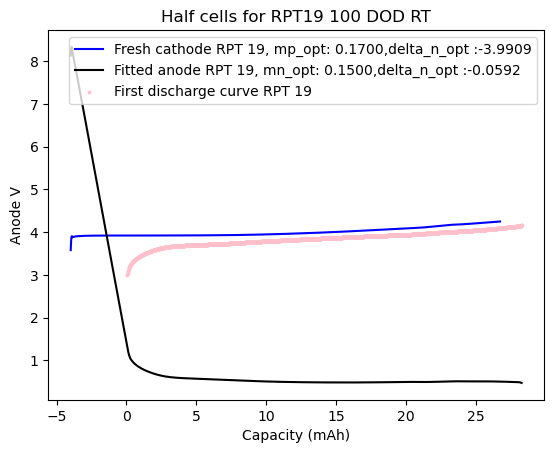

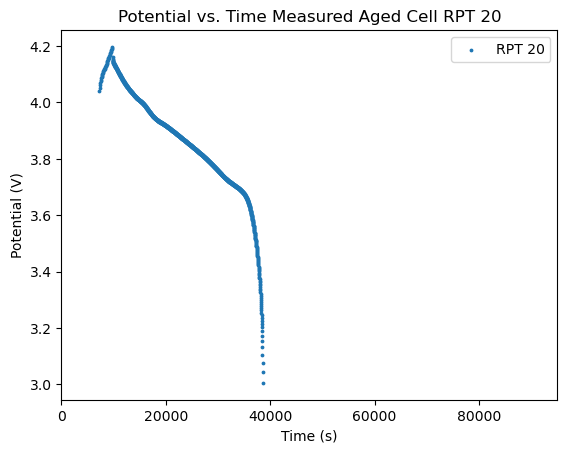

 x1 9793.51800602954
 x2 9813.51800605003
 y1 4.15951490402222
 y2 4.15424108505249
Linear equation: y = -0.000264x + 6.741977
Value of y (first_potential_V_linear) for x = 9720.00021865964: 4.178901
RPT 20 - capacity:  -0.02804781911647254 Ah
RPT 20 - cell_internal_resistance: 10.665508256918486 ohms
RPT 20 - cell_internal_resistance linear aproach: 5.125796916047196 ohms
RPT 20 - first_potential: 4.19683837890625
RPT 20 - last_potential: 4.15951490402222
RPT 20 - delta_potential_measured: -0.03732347488402965
RPT 20 - mean_current: -0.0034994558144773565
first value 'Elapsed Time (s)': 9720.00021865964
last value 'Elapsed Time (s)': 38573.67180999
time difference s : 28853.671591330363
time difference in hours : 8.014908775369545


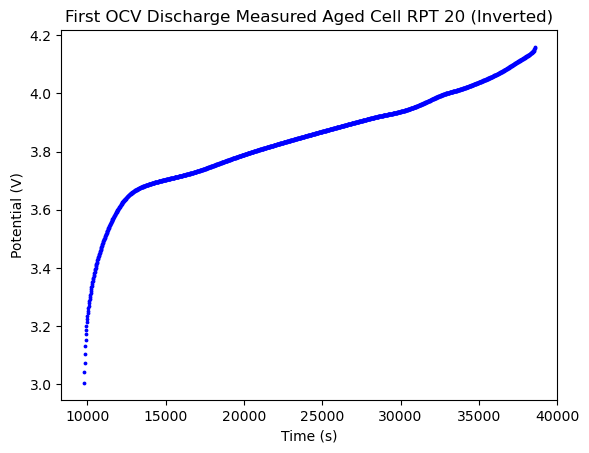

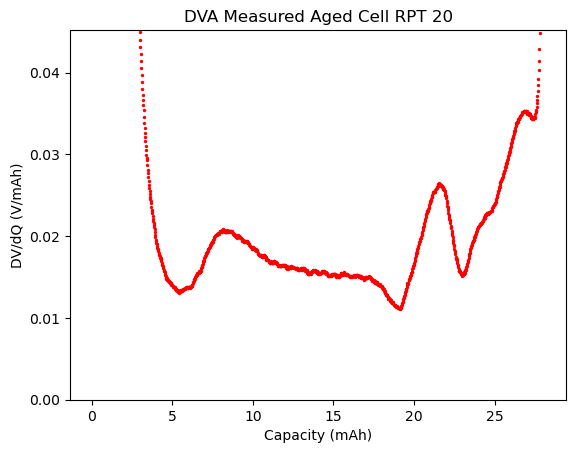

C:\Users\r342e598\anaconda\Lib\site-packages\scipy\optimize\_differentiable_functions.py:504: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(delta_x, delta_g)


Optimized parameters:
mp: 0.17000157637707827
mn: 0.1554619387351361
delta_p: -3.356339852561957
delta_n: -0.059982318310382456
Total optimization time: 5.097053289413452 seconds
limit mp: 0.17000157637707827


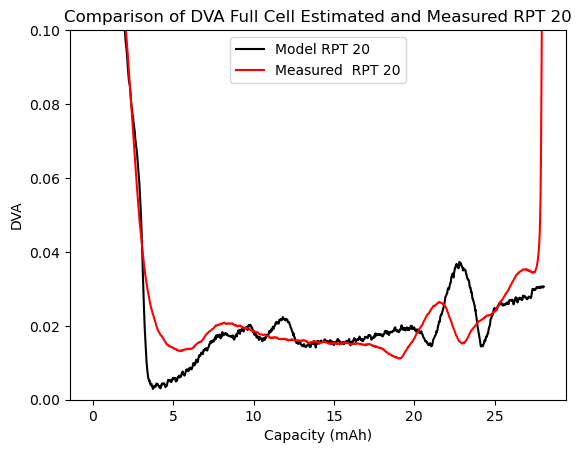

initial value Numerical integral (Trapezoidal rule): 6.927187531108723


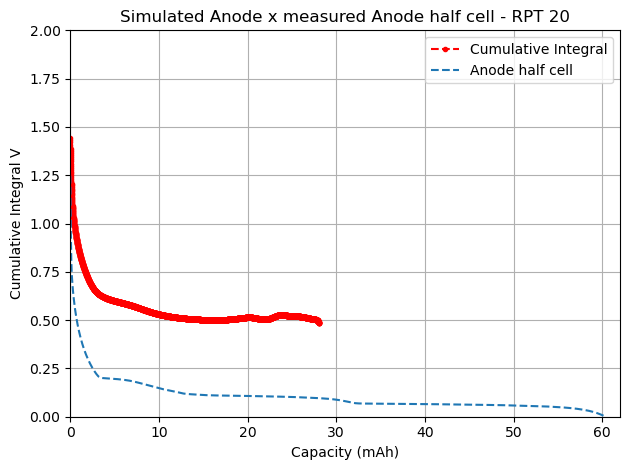

C:\Users\r342e598\AppData\Local\Temp\ipykernel_16728\1976290827.py:293: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_step, _ = curve_fit(step_function, x_region, y_region, p0=[np.mean(x_region), np.min(y_region), np.max(y_region)])


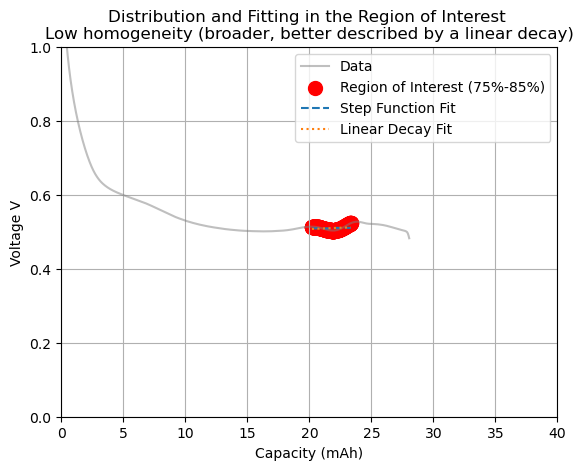

RMSE for Step Function: 0.0053
RMSE for Linear Decay: 0.0051
Homogeneity: Low homogeneity (broader, better described by a linear decay)
Slope of RPT 20  : 0.0013790505652583184


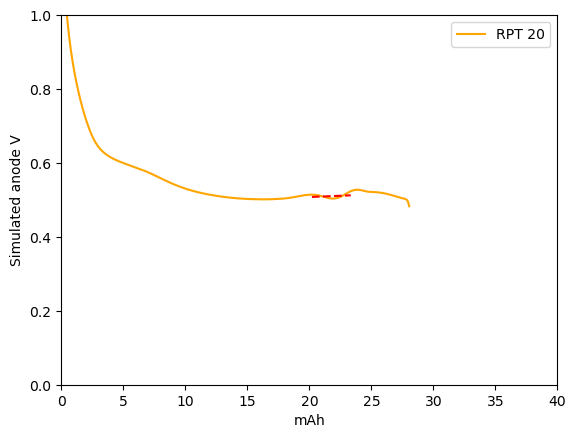

<class 'int'>


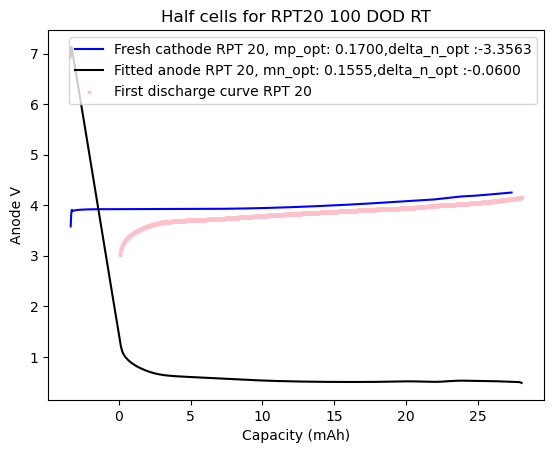

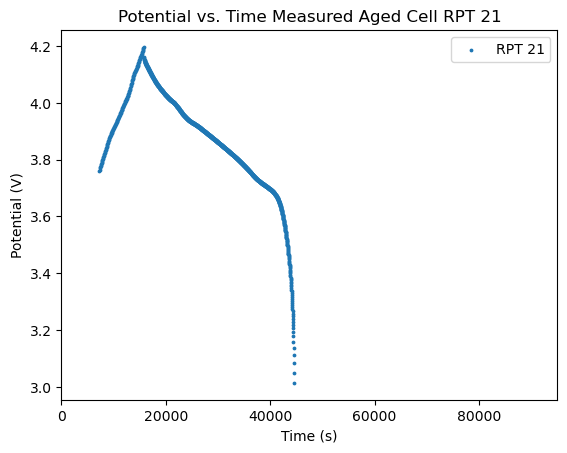

 x1 15852.0235077003
 x2 15872.02350765
 y1 4.16281414031982
 y2 4.15756130218506
Linear equation: y = -0.000263x + 8.326220
Value of y (first_potential_V_linear) for x = 15780.1026965706: 4.181704
RPT 21 - capacity:  -0.027968223750167238 Ah
RPT 21 - cell_internal_resistance: 9.762471240623642 ohms
RPT 21 - cell_internal_resistance linear aproach: 4.364601626650559 ohms
RPT 21 - first_potential: 4.19697713851929
RPT 21 - last_potential: 4.16281414031982
RPT 21 - delta_potential_measured: -0.034162998199469996
RPT 21 - mean_current: -0.0034994211360450177
first value 'Elapsed Time (s)': 15780.1026965706
last value 'Elapsed Time (s)': 44552.1771586901
time difference s : 28772.0744621195
time difference in hours : 7.992242906144305


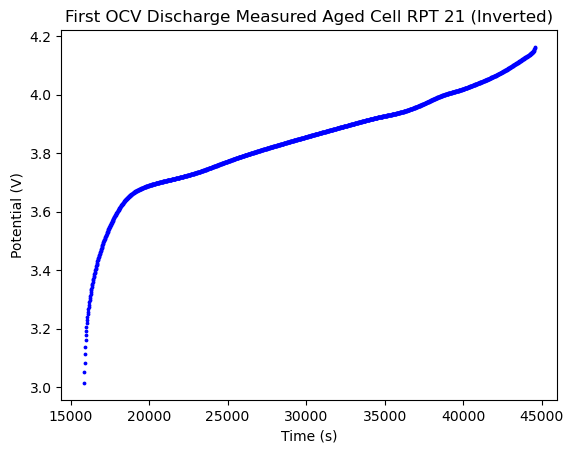

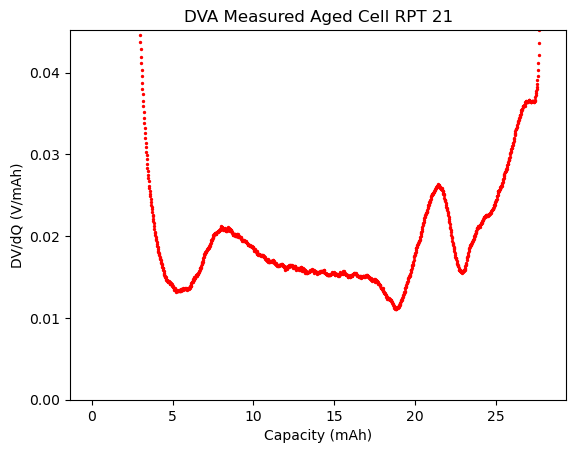

C:\Users\r342e598\anaconda\Lib\site-packages\scipy\optimize\_differentiable_functions.py:504: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(delta_x, delta_g)


Optimized parameters:
mp: 0.17000078236293475
mn: 0.1501182299662889
delta_p: -3.991732127676394
delta_n: -0.06273429529157097
Total optimization time: 4.751706838607788 seconds
limit mp: 0.17000078236293475


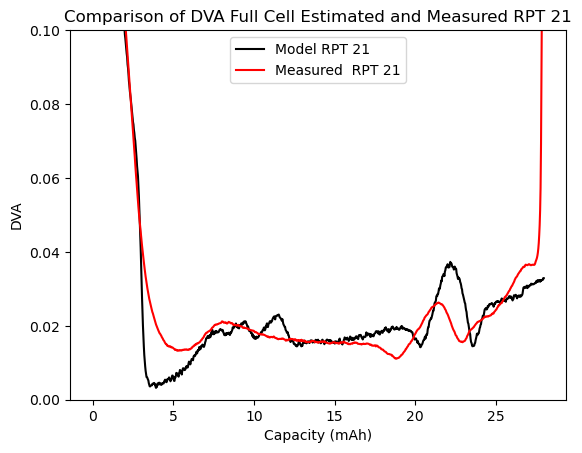

initial value Numerical integral (Trapezoidal rule): 7.845135716103257


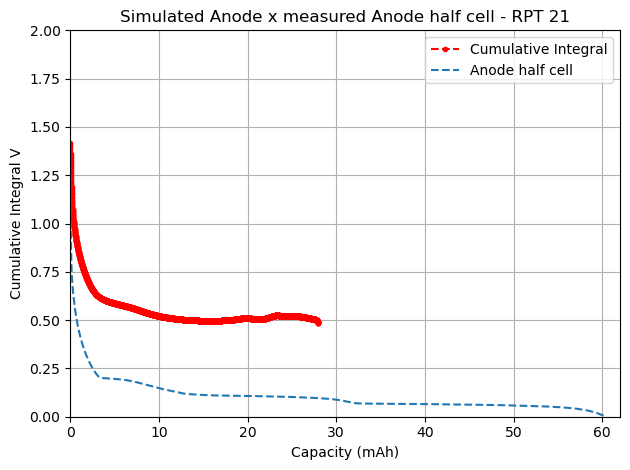

C:\Users\r342e598\AppData\Local\Temp\ipykernel_16728\1976290827.py:293: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_step, _ = curve_fit(step_function, x_region, y_region, p0=[np.mean(x_region), np.min(y_region), np.max(y_region)])


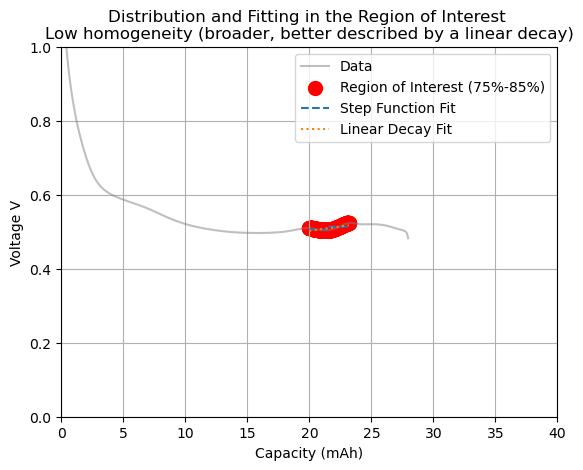

RMSE for Step Function: 0.0047
RMSE for Linear Decay: 0.0041
Homogeneity: Low homogeneity (broader, better described by a linear decay)
Slope of RPT 21  : 0.004716124029977858


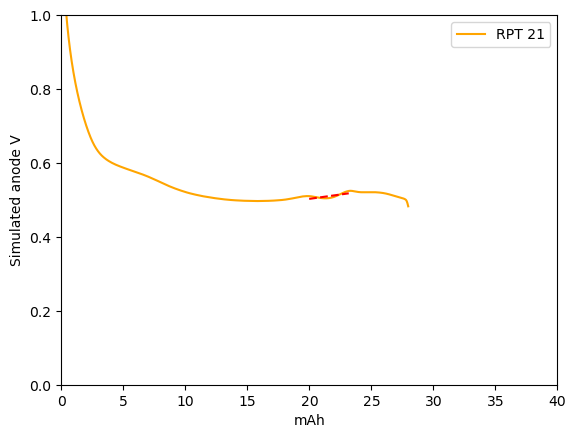

<class 'int'>


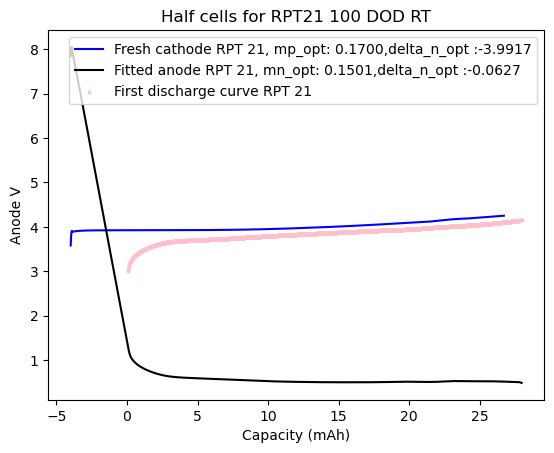

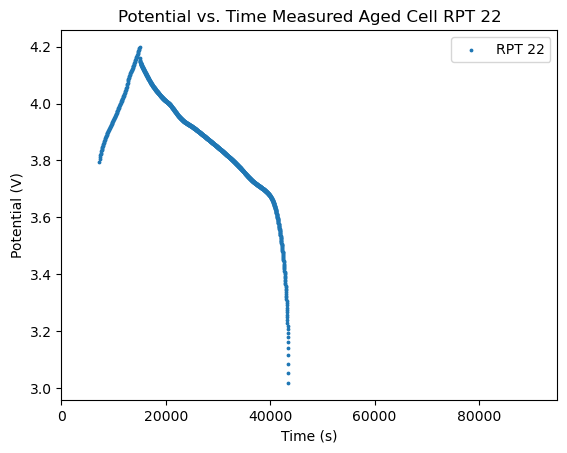

 x1 15034.3645513691
 x2 15054.3645513002
 y1 4.15992498397827
 y2 4.15463638305664
Linear equation: y = -0.000264x + 8.135463
Value of y (first_potential_V_linear) for x = 15000.1539209299: 4.168971
RPT 22 - capacity:  -0.027699201335020157 Ah
RPT 22 - cell_internal_resistance: 11.21830389890519 ohms
RPT 22 - cell_internal_resistance linear aproach: 8.633305229160037 ohms
RPT 22 - first_potential: 4.19918394088745
RPT 22 - last_potential: 4.15992498397827
RPT 22 - delta_potential_measured: -0.039258956909180576
RPT 22 - mean_current: -0.0034995447852871867
first value 'Elapsed Time (s)': 15000.1539209299
last value 'Elapsed Time (s)': 43494.4670171086
time difference s : 28494.313096178703
time difference in hours : 7.9150869711607506


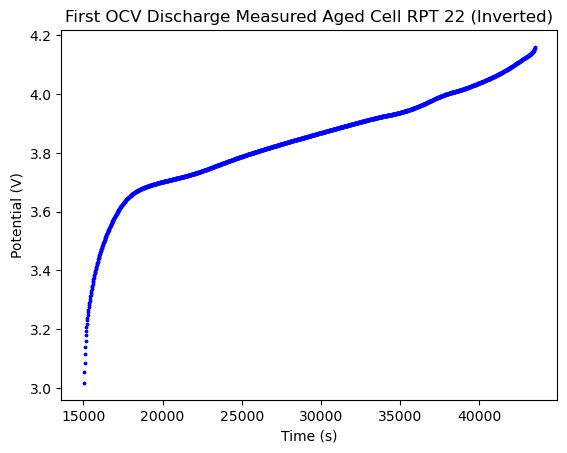

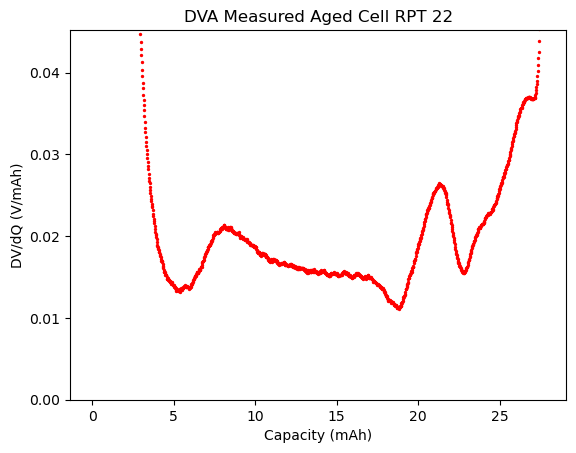

C:\Users\r342e598\anaconda\Lib\site-packages\scipy\optimize\_differentiable_functions.py:504: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(delta_x, delta_g)


Optimized parameters:
mp: 0.17000039116671398
mn: 0.15395462324076267
delta_p: -3.361901195174197
delta_n: -0.07628559169807649
Total optimization time: 5.506296634674072 seconds
limit mp: 0.17000039116671398


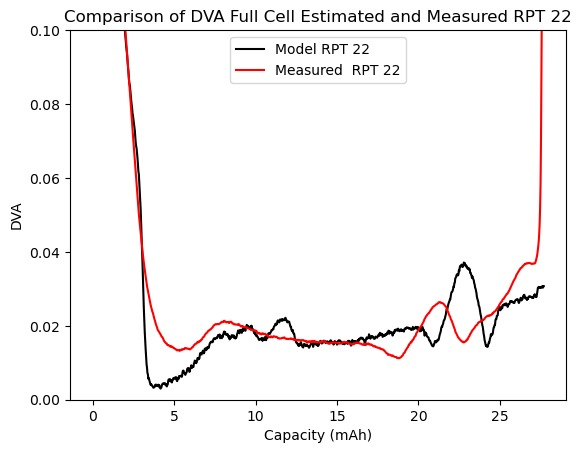

initial value Numerical integral (Trapezoidal rule): 6.668437610143649


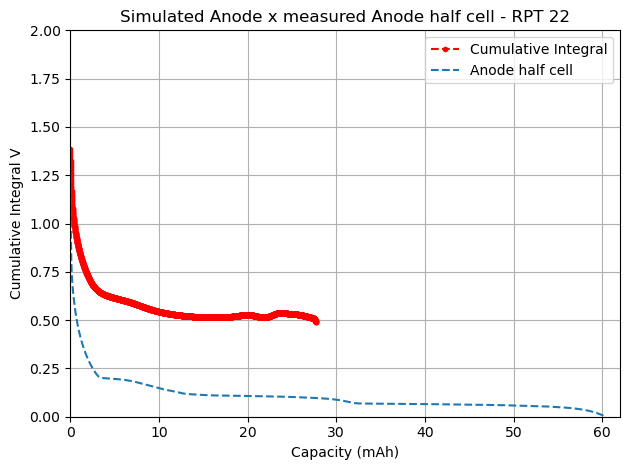

C:\Users\r342e598\AppData\Local\Temp\ipykernel_16728\1976290827.py:293: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_step, _ = curve_fit(step_function, x_region, y_region, p0=[np.mean(x_region), np.min(y_region), np.max(y_region)])


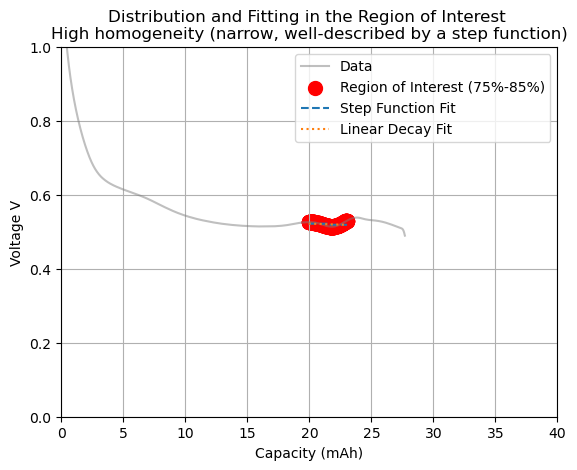

RMSE for Step Function: 0.0045
RMSE for Linear Decay: 0.0047
Homogeneity: High homogeneity (narrow, well-described by a step function)
Slope of RPT 22  : -0.001080554239833918


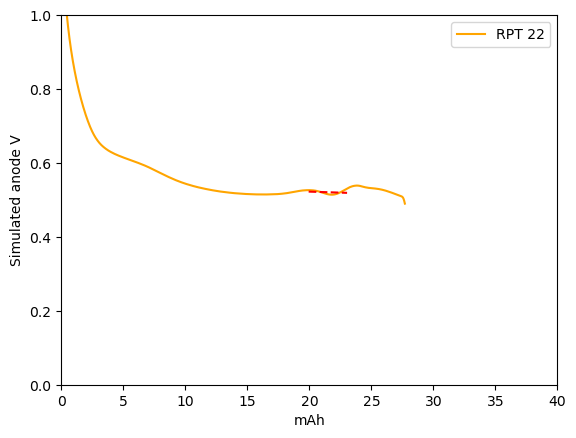

<class 'int'>


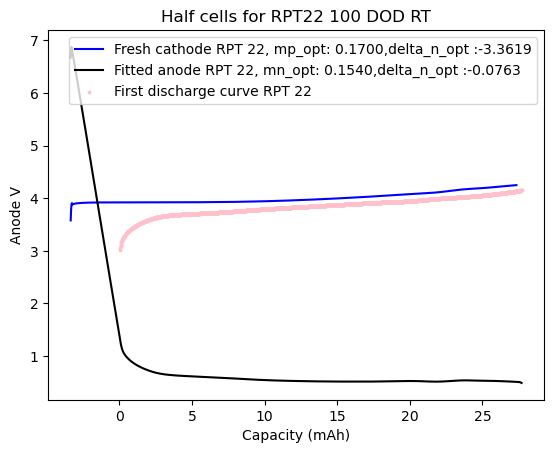

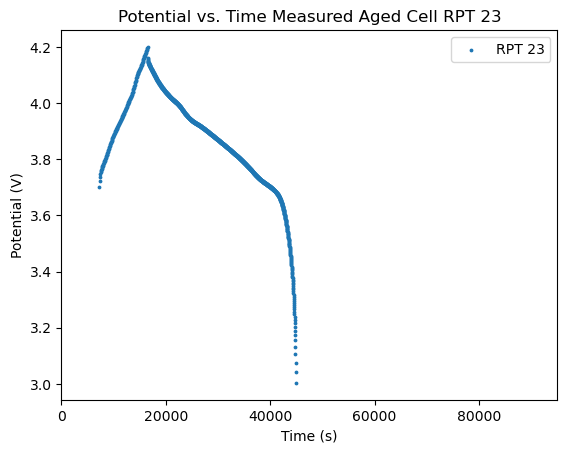

 x1 16522.7581609394
 x2 16542.7581608891
 y1 4.1612663269043
 y2 4.15593814849854
Linear equation: y = -0.000266x + 8.563076
Value of y (first_potential_V_linear) for x = 16500.1539221704: 4.167288
RPT 23 - capacity:  -0.027589927737303285 Ah
RPT 23 - cell_internal_resistance: 11.024858817368019 ohms
RPT 23 - cell_internal_resistance linear aproach: 9.304023169561578 ohms
RPT 23 - first_potential: 4.19984722137451
RPT 23 - last_potential: 4.1612663269043
RPT 23 - delta_potential_measured: -0.038580894470209515
RPT 23 - mean_current: -0.0034994456717605377
first value 'Elapsed Time (s)': 16500.1539221704
last value 'Elapsed Time (s)': 44882.8605479095
time difference s : 28382.706625739098
time difference in hours : 7.884085173816416


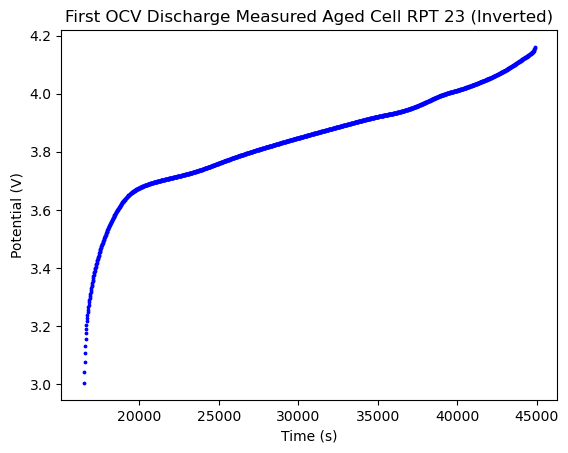

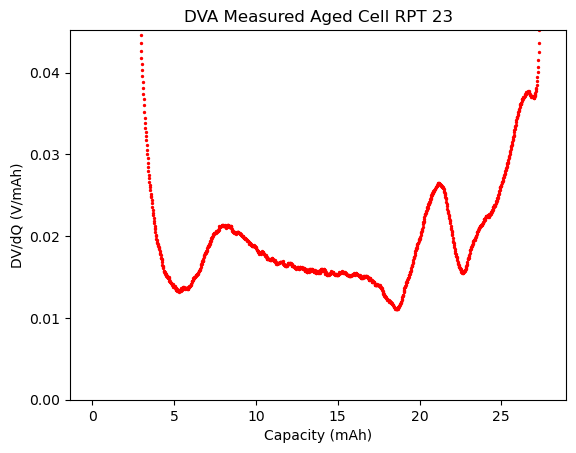

C:\Users\r342e598\anaconda\Lib\site-packages\scipy\optimize\_differentiable_functions.py:504: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(delta_x, delta_g)


Optimized parameters:
mp: 0.17000019558632656
mn: 0.15610857155319455
delta_p: -2.989799869801308
delta_n: -0.07556961292063706
Total optimization time: 6.367483139038086 seconds
limit mp: 0.17000019558632656


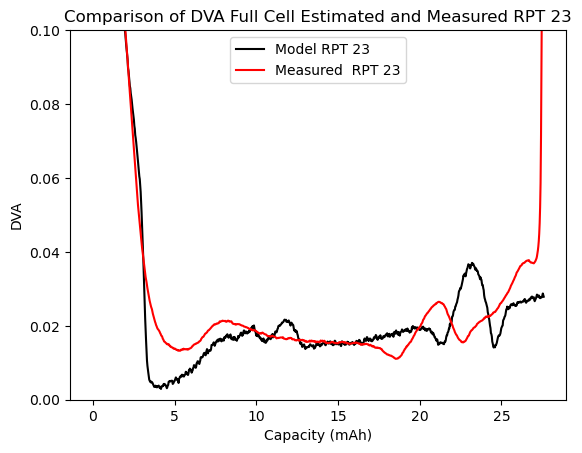

initial value Numerical integral (Trapezoidal rule): 6.324984147889906


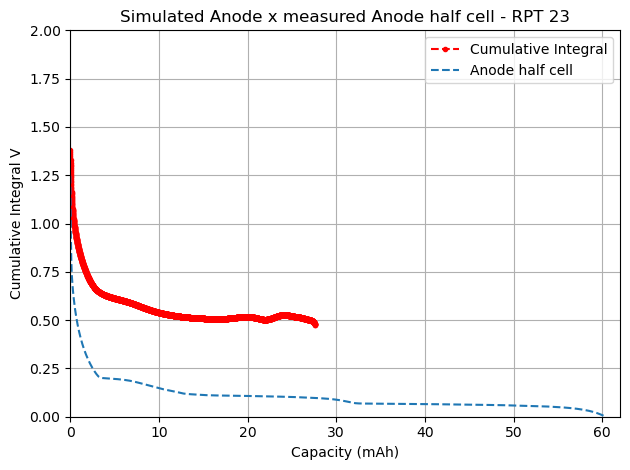

C:\Users\r342e598\AppData\Local\Temp\ipykernel_16728\1976290827.py:293: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_step, _ = curve_fit(step_function, x_region, y_region, p0=[np.mean(x_region), np.min(y_region), np.max(y_region)])


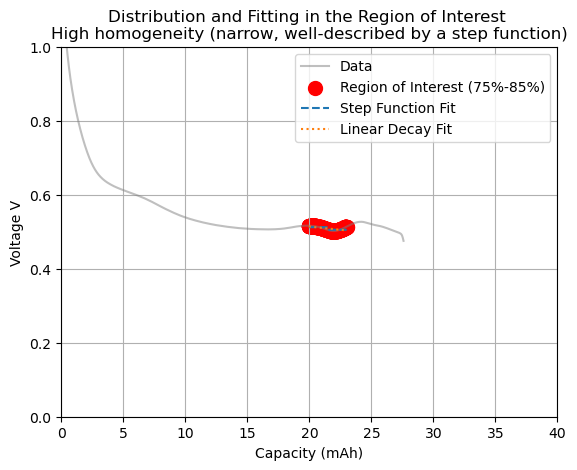

RMSE for Step Function: 0.0035
RMSE for Linear Decay: 0.0038
Homogeneity: High homogeneity (narrow, well-described by a step function)
Slope of RPT 23  : -0.003495317524428442


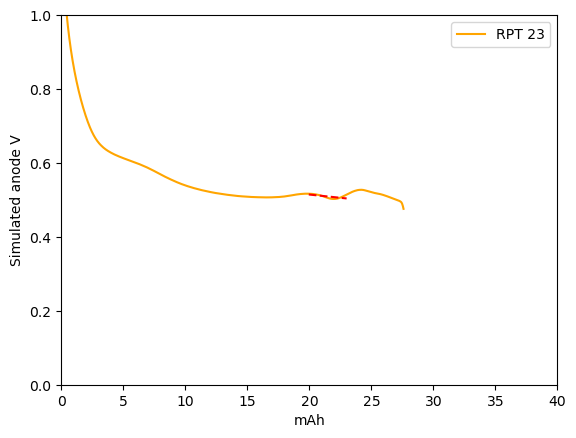

<class 'int'>


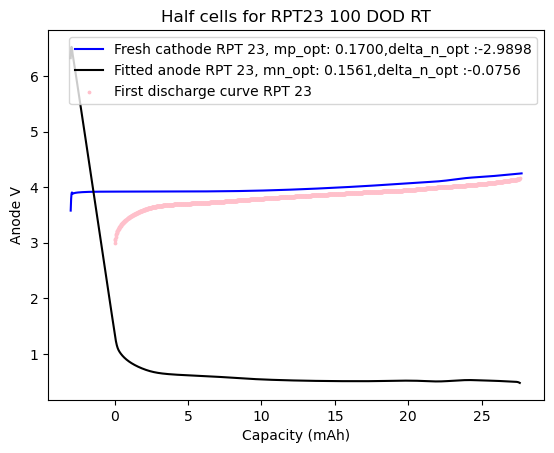

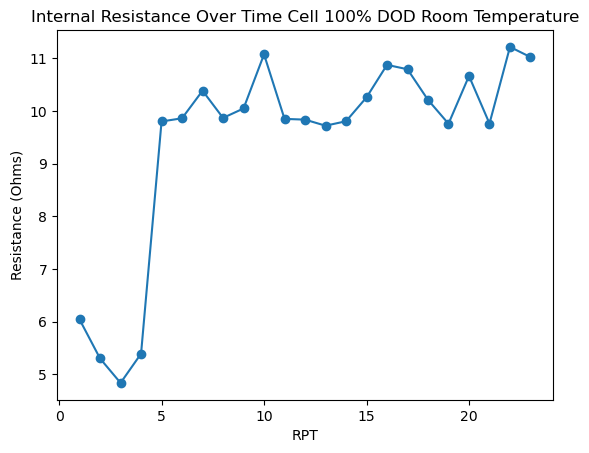

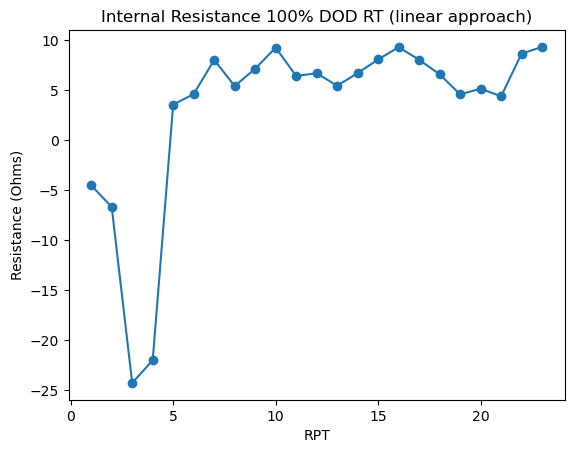

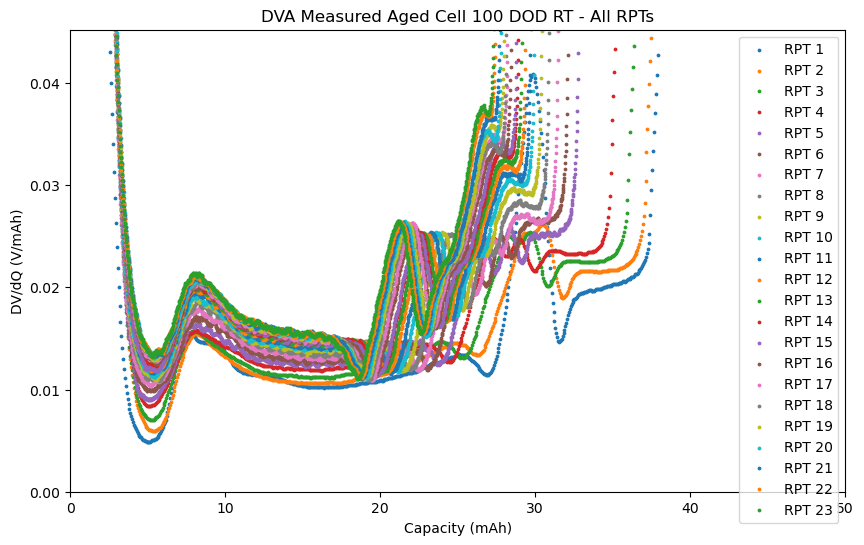

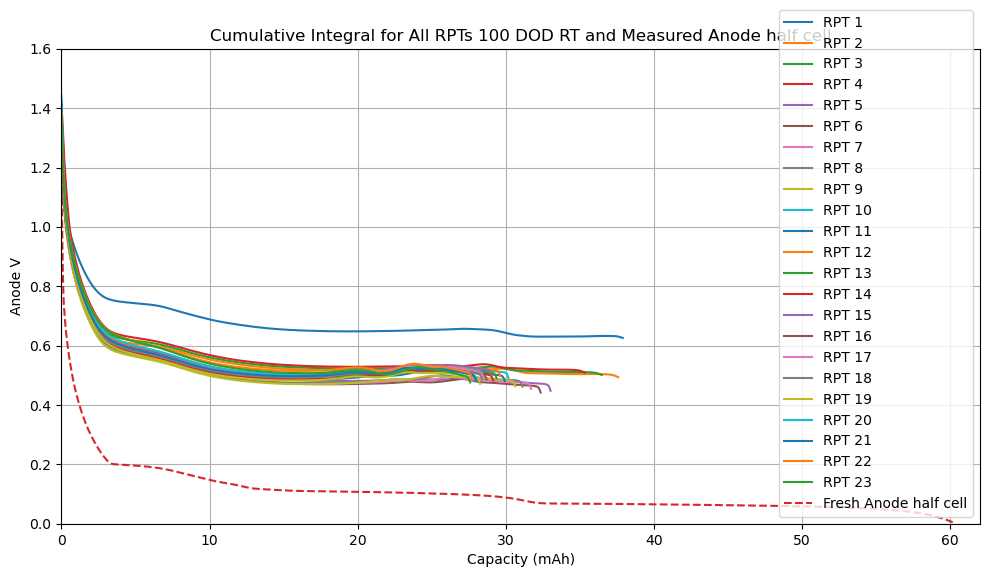

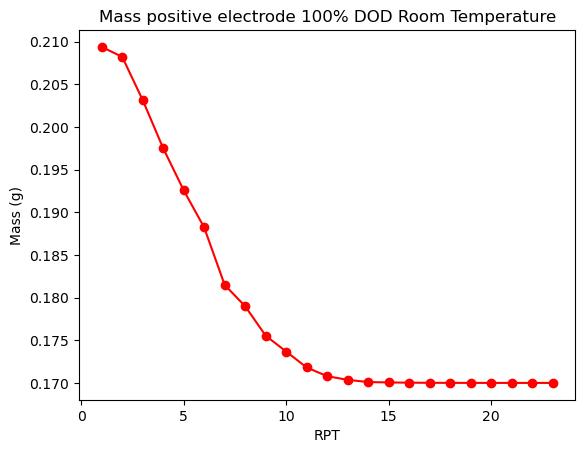

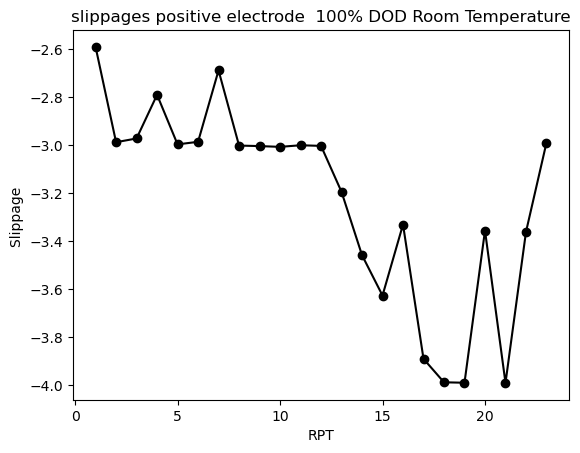

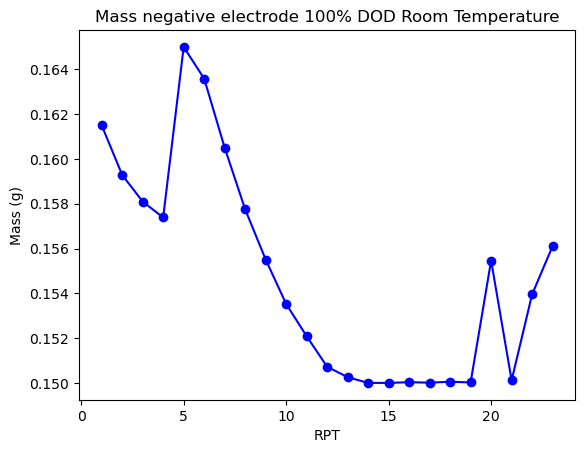

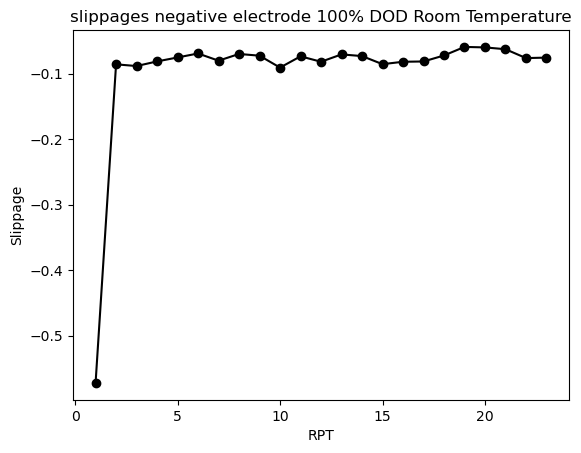

    rpt_number  slope_rpt  Homogeneity_ml Homogeneity_desc  Capacity  \
0            1  -0.007605               1              Low -0.038432   
1            2  -0.001355               1              Low -0.038152   
2            3  -0.000317               1              Low -0.038019   
3            4   0.001131               0             High -0.036650   
4            5   0.002184               1              Low -0.033014   
5            6   0.002837               1              Low -0.032344   
6            7   0.004412               1              Low -0.031703   
7            8   0.005391               1              Low -0.031124   
8            9   0.005975               1              Low -0.030638   
9           10   0.006242               1              Low -0.030177   
10          11   0.006505               1              Low -0.029927   
11          12   0.006816               1              Low -0.029612   
12          13   0.006907               1              Low -0.02

In [14]:
# This code presents the parameter for the Cell cycled at 100 deph of discharge (DOD) at 25 C.
# For different DODs, update the initial conditials and other parameters accordingly (names and bounds, for example).

import os
# Define the base directory
base_dir = 'C:/Users/r342e598/Desktop/DVA_analysis_V_3/100percDOD_RT'

# Initialize a list to store capacities for all RPTs,anodes etc...
ml_results = []
rpt_dataframes = []
anode_rpt_data = []

# Store capacity of RPT1 for later percentage calculations
capacity_rpt1 = None

# Initial guess for the first iteration
initial_guess = [0.20, 0.17, -3, -0.08] 
limit_mp=0.21 

#initial_guess = [0.215, 0.18, -0.2, -0.08] # best so far, and do not let udate for  50 DOD
#limit_mp=0.22  # for 50 DOD

#initial_guess = [0.215, 0.18, -0.2, -0.08] # best so far, and do not let udate the values  25 dod
#limit_mp=0.22   # 25 dod



# Iterate through each folder in the base directory
for folder_name in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder_name)
    
    if os.path.isdir(folder_path) and 'RPT_' in folder_name:
        # Extract the RPT number from the folder name
        rpt_number = folder_name.split('_')[2]
        rpt_df_name = f'rpt_{rpt_number}_df'

        # Find the CSV file starting with '2_'
        for file_name in os.listdir(folder_path):
            if file_name.startswith('2_') and file_name.endswith('.csv'):
                file_path_full_cell = os.path.join(folder_path, file_name)

                # Read the CSV file
                rpt_df = pd.read_csv(file_path_full_cell)
                
                # Plotting the data
                plt.scatter(rpt_df['Elapsed Time (s)'], rpt_df['Working Electrode (V)'], s=3, label=f'RPT {rpt_number}')
                plt.xlabel('Time (s)')
                plt.ylabel('Potential (V)')
                plt.title(f'Potential vs. Time Measured Aged Cell RPT {rpt_number}')
                plt.xlim(0, 95000)
                plt.legend()
                plt.show()

               # Internal resistance calculation
                first_potential = rpt_df.loc[rpt_df['Repeats'] == 1, 'Working Electrode (V)'].iloc[-1]
                start_time = rpt_df.loc[rpt_df['Repeats'] == 1 , 'Elapsed Time (s)' ].iloc[-1]
                last_potential = rpt_df.loc[rpt_df['Repeats'] == 3, 'Working Electrode (V)'].iloc[0]
                delta_potential_measured = last_potential - first_potential
                 
                 
                #new line get the x for the first potencial,add these lines to the others DODs 
                first_potential_x = rpt_df.loc[rpt_df['Repeats'] == 1, 'Elapsed Time (s)' ].iloc[-1]
                
                subset = rpt_df[rpt_df['Repeats'] == 3].iloc[:2]
                x1, x2 = subset['Elapsed Time (s)']
                y1, y2 = subset['Working Electrode (V)']
                print(f' x1 {x1}')
                print(f' x2 {x2}')
                print(f' y1 {y1}')
                print(f' y2 {y2}')
                a = (y2 - y1) / (x2 - x1)
                b = y1 - (a * x1)
                
                first_potential_V_linear = (a * first_potential_x ) + b
                print(f'Linear equation: y = {a:f}x + {b:f}')
                print(f'Value of y (first_potential_V_linear) for x = {first_potential_x}: {first_potential_V_linear:f}')

                diference_v=  first_potential -  first_potential_V_linear 
                
                # Isolate the first discharge
                rpt_df = rpt_df[rpt_df['Repeats'] == 3].copy()
                end_time =  rpt_df['Elapsed Time (s)'].iloc[-1]
                mean_current = rpt_df['Current (A)'].mean()
                
                time_difference = end_time - start_time
                cell_internal_resistance = delta_potential_measured / mean_current
                #a different aproach can be used to determine the IR, wich consits in doing a linear fitting in the voltage drop
                linear_aproach_IR= diference_v/ mean_current*(-1)
                capacity = (time_difference/3600) * mean_current
                
                print(f"RPT {rpt_number} - capacity:  {capacity} Ah")
                print(f"RPT {rpt_number} - cell_internal_resistance: {cell_internal_resistance} ohms")
                print(f"RPT {rpt_number} - cell_internal_resistance linear aproach: {linear_aproach_IR} ohms")
                print(f"RPT {rpt_number} - first_potential: {first_potential}")
                print(f"RPT {rpt_number} - last_potential: {last_potential}")
                print(f"RPT {rpt_number} - delta_potential_measured: {delta_potential_measured}")
                print(f"RPT {rpt_number} - mean_current: {mean_current}")
                print(f"first value 'Elapsed Time (s)': {start_time}")
                print(f"last value 'Elapsed Time (s)': {end_time}")
                print(f"time difference s : {time_difference}")
                print(f"time difference in hours : {time_difference/3600}")
                
                 # Set capacity_rpt1 during the first iteration (RPT1)
                if rpt_number == "1":
                    capacity_rpt1 = capacity
                
                # Calculate percentage capacity and determine capacity
                percentage_capacity = (capacity / capacity_rpt1) * 100 
                
 
                # Reverse the order of 'Working Electrode (V)' for voltage derivative calculation
                inverted_vd = rpt_df['Working Electrode (V)'].values[::-1]
                rpt_df['Working Electrode (V)'] = inverted_vd
                rpt_df['voltage_derivative'] = np.gradient(rpt_df['Working Electrode (V)'], rpt_df['Cumulative Charge (mAh)'])
                rpt_df['voltage_derivative'] = savgol_filter(rpt_df['voltage_derivative'], 15, 1)

                # Plotting voltage
                plt.scatter(rpt_df['Elapsed Time (s)'], rpt_df['Working Electrode (V)'], color="blue", s=3)
                plt.xlabel('Time (s)')
                plt.ylabel('Potential (V)')
                plt.title(f'First OCV Discharge Measured Aged Cell RPT {rpt_number} (Inverted)')
                #plt.savefig(f'OCV_RPT_{rpt_number}.png')
                plt.show()

                # Plotting DVA
                plt.scatter(rpt_df['Cumulative Charge (mAh)'], rpt_df['voltage_derivative'], color="red", s=2)
                plt.xlabel('Capacity (mAh)')
                plt.ylabel('DV/dQ (V/mAh)')
                plt.ylim(0, 0.0452)
                plt.title(f'DVA Measured Aged Cell RPT {rpt_number}')
                #plt.savefig(f'dVA_RPT_{rpt_number}.png')
                plt.show()
                
                
                # Solver optimization and plotting
                # Define the range of common_x
                min_capacity = 0
                max_capacity = (capacity*-1000)
                num_points = 1000
                common_x = np.linspace(min_capacity, max_capacity, num_points)
                
                def error_function(params):
                    mp, mn, delta_p, delta_n = params
                    anode_df['anode_der'] = np.gradient(anode_df['Working Electrode (V)'], ((anode_df["Cumulative Charge (mAh/g)"] * mn) + delta_n))
                    catode_df['catode_der'] = np.gradient(catode_df['Working Electrode (V)'], ((catode_df["Cumulative Charge (mAh/g)"] * mp) + delta_p))
                    anode_df['anode_der'] = savgol_filter(anode_df['anode_der'], 50, 1)
                    catode_df['catode_der'] = savgol_filter(catode_df['catode_der'], 50, 1)
                    catode_interp = np.interp(common_x, (catode_df["Cumulative Charge (mAh/g)"] * mp) + delta_p, catode_df['catode_der'])
                    anode_interp = np.interp(common_x, (anode_df["Cumulative Charge (mAh/g)"] * mn) + delta_n, anode_df['anode_der'])
                    subtracted_data = catode_interp - anode_interp
                    interp_full_cell = np.interp(common_x, rpt_df["Cumulative Charge (mAh)"], rpt_df['voltage_derivative'])
                    subtracted_data = savgol_filter(subtracted_data, 50, 1)
                    interp_full_cell = savgol_filter(interp_full_cell, 50, 1)
                    
                    error = np.sum((subtracted_data - interp_full_cell)**2)
                    
                    return error

                bounds = [(0.17, limit_mp), (0.15, 0.165), (-4, 0), (-1, 0)]  #for 100 DOD
                #bounds = [(0.19,  limit_mp), (0.17, 0.18), (-3, 0), (-0.5, 0)]  #for 25 DOD
                #bounds = [(0.19,  limit_mp), (0.17, 0.18), (-3, 0), (-0.5, 0)] # for 50 DOD
                ## Define constraints
                constraints = [
                {'type': 'ineq', 'fun': lambda params: params[0] - params[1]},]  # Ensures mp > mn]
   

                # Define callback function to print progress

                iteration = 0
                def callback(xk, *args, **kwargs):
                    global iteration
                iteration += 1
                #print(f"Iteration {iteration}:")
                #print("Current parameters:", xk)
                #print("Current error:", error_function(xk))
                #print("-" * 30)
                # Record start time
                start_time = time.time()

                # Perform optimization
                result = minimize(error_function, initial_guess, method='trust-constr', bounds=bounds
                            , constraints=constraints
                             , options={'gtol': 1e-6}, callback=callback)

               # Record end time
                end_time = time.time()

               # Extract optimized parameters
                mp_opt, mn_opt, delta_p_opt, delta_n_opt = result.x
                limit_mp = result.x[0]

                print("Optimized parameters:")
                print("mp:", mp_opt)
                print("mn:", mn_opt)
                print("delta_p:", delta_p_opt)
                print("delta_n:", delta_n_opt)
                print("Total optimization time:", end_time - start_time, "seconds")
                print("limit mp:",limit_mp)
                
                # Define the range of common_x
                anode_df['anode_der1'] = np.gradient(anode_df['Working Electrode (V)'], ((anode_df["Cumulative Charge (mAh/g)"] * mn_opt) + delta_n_opt))
                catode_df['catode_der1'] = np.gradient(catode_df['Working Electrode (V)'], ((catode_df["Cumulative Charge (mAh/g)"] * mp_opt) + delta_p_opt))
                catode_interp1 = np.interp(common_x, (catode_df["Cumulative Charge (mAh/g)"] * mp_opt) + delta_p_opt, catode_df['catode_der1'])
                anode_interp1 = np.interp(common_x, ((anode_df["Cumulative Charge (mAh/g)"] * mn_opt) + delta_n_opt), anode_df['anode_der1'])
                subtracted_data1 = catode_interp1 - anode_interp1
                interp_full_cell = np.interp(common_x, rpt_df["Cumulative Charge (mAh)"], rpt_df['voltage_derivative'])
                
                plt.plot(common_x, subtracted_data1, label=f'Model RPT {rpt_number}', color='black')
                plt.plot(common_x, interp_full_cell , label=f'Measured  RPT {rpt_number}', color='red')
                #plt.plot(rpt_df["Cumulative Charge (mAh)"], rpt_df['voltage_derivative'], label='Measured full cell', color='red')
                plt.xlabel('Capacity (mAh)')
                plt.ylabel('DVA')
                plt.title(f'Comparison of DVA Full Cell Estimated and Measured RPT {rpt_number}')
                plt.ylim(0, 0.1)
                #plt.xlim(0, 40)
                plt.legend()
                #plt.savefig(f'First_fitting_dVA_RPT_{rpt_number}.png')
                plt.show()
                
                # Different way to change the fitting parameter: update the initial guess for the next iteration
                #initial_guess = [mp_opt, mn_opt, delta_p_opt, delta_n_opt]
        
                #---------------------------------------------------------------------------------------------------------------
                #-----------------------------------------------------------------------------------------------------------------
                mp1 =   mp_opt
                mn1 =  mn_opt
                delta_p1 = delta_p_opt
                delta_n1 = delta_n_opt
                #-------------------------------------------------------------------------
                #--------------------------------------------------reconstitute the anode
                #initial value

                #add this interpolation, and choose a comoom x 
                catode_df['catode_der1'] =np.gradient(catode_df['Working Electrode (V)'],((catode_df["Cumulative Charge (mAh/g)"] * mp1) + delta_p1))
                common_x2 = np.linspace(((catode_df["Cumulative Charge (mAh/g)"] * mp1) + delta_p1).min(), (rpt_df["Cumulative Charge (mAh)"]).max(),5000)
                catode_interp1= np.interp(common_x2, (catode_df["Cumulative Charge (mAh/g)"] * mp1) + delta_p1, catode_df['catode_der'])
                interp_full_cell = np.interp(common_x2, rpt_df["Cumulative Charge (mAh)"], rpt_df['voltage_derivative'])
                x = common_x2
                y = (catode_interp1 - interp_full_cell)
                
                
                #get anode halfcel from 1st DVA
                # numerical integration using the trapezoidal rule
                initial_value = 0.0
                for i in range(1, len(x)):
                # Trapezoidal rule formula
                    initial_value += abs((x[i] - x[i - 1]) * (y[i] + y[i - 1]) / 2.0)

                print("initial value Numerical integral (Trapezoidal rule):",  initial_value)


                # arrays to store cumulative integral values and x points
                integral_values = np.zeros_like(y, dtype=float)
                integral_values[0] =  initial_value # Initial integral value, it should be 1.6

                # Compute cumulative integral using the trapezoidal rule
                for i in range(1, len(x)):
                # Trapezoidal rule formula
                    integral_values[i] = integral_values[i - 1] + (x[i] - x[i - 1]) * (y[i] + y[i - 1]) / 2.0



                # Plot cumulative integral as a line plot
                plt.plot(x, integral_values, linestyle='--', marker='o', color='r', markersize=3, label='Cumulative Integral')
                plt.plot(anode_df["Cumulative Charge (mAh/g)"]*16*0.00997152, anode_df['Working Electrode (V)'], label='Anode half cell', linestyle='--')
                plt.xlabel('Capacity (mAh)')
                plt.ylabel('Cumulative Integral V')
                plt.title(f'Simulated Anode x measured Anode half cell - RPT {rpt_number}')
                plt.legend()
                plt.grid(True)
                plt.xlim(0, 62)
                plt.ylim(0, 2)
                plt.tight_layout()
                #plt.savefig(f'Simulated_anode__fitting_2dVA_RPT_{rpt_number}.png')
                plt.show()

                # Determine the region of interest based on percentage of x
                total_length = len(x)
                start_index = int(total_length * 0.75)
                end_index = int(total_length * 0.85)

                x_region = x[start_index:end_index]
                y_region = integral_values[start_index:end_index]

                # Define functions for fitting
                def step_function(x, x0, y0, y1):
                    return np.where(x < x0, y0, y1)

                def linear_decay(x, m, b):
                    return m * x + b

                # Fit the step function
                popt_step, _ = curve_fit(step_function, x_region, y_region, p0=[np.mean(x_region), np.min(y_region), np.max(y_region)])

                # Fit the linear decay
                popt_lin, _ = curve_fit(linear_decay, x_region, y_region, p0=[-1, np.max(y_region)])

                # Generate points for plotting the fitted functions
                x_fit = np.linspace(np.min(x_region), np.max(x_region), 300)
                y_fit_step = step_function(x_fit, *popt_step)
                y_fit_lin = linear_decay(x_fit, *popt_lin)

                # Calculate RMSE for both fits
                y_fit_step_region = step_function(x_region, *popt_step)
                y_fit_lin_region = linear_decay(x_region, *popt_lin)

                rmse_step = np.sqrt(mean_squared_error(y_region, y_fit_step_region))
                rmse_lin = np.sqrt(mean_squared_error(y_region, y_fit_lin_region))

                # Determine which model fits better
                if rmse_step < rmse_lin:
                    homogeneity = 'High homogeneity (narrow, well-described by a step function)'
                    homogeneity_desc = 'High'
                else:
                    homogeneity = 'Low homogeneity (broader, better described by a linear decay)'
                    homogeneity_desc = 'Low'

                # Plotting
                plt.plot(x, integral_values, label='Data', color='gray', alpha=0.5)
                plt.scatter(x_region, y_region, color='red', label='Region of Interest (75%-85%)', s=100)  # Increase marker size

                # Plot the fitted functions
                plt.plot(x_fit, y_fit_step, label='Step Function Fit', linestyle='--')
                plt.plot(x_fit, y_fit_lin, label='Linear Decay Fit', linestyle=':')

                plt.xlabel('Capacity (mAh)')
                plt.ylabel('Voltage V')
                plt.title(f'Distribution and Fitting in the Region of Interest \n{homogeneity}')
                plt.legend()
                plt.grid(True)
                plt.ylim(0, 1)
                plt.xlim(0, 40)
                plt.show()

                # Print RMSE values and homogeneity result
                print(f"RMSE for Step Function: {rmse_step:.4f}")
                print(f"RMSE for Linear Decay: {rmse_lin:.4f}")
                print(f"Homogeneity: {homogeneity}")

                # Get slope
                slope_rpt, intercept_rpt, _, _, _ = linregress(x_region, y_region)

                print(f'Slope of RPT {rpt_number}  : {slope_rpt}')

                # Plot the data and the fitted lines
                plt.plot(x, integral_values, label=f'RPT {rpt_number}', color='orange')
                plt.plot(x_region, slope_rpt * x_region + intercept_rpt, '--', color='red')
                plt.xlabel('mAh')
                plt.ylabel('Simulated anode V')
                plt.ylim(0, 1)
                plt.xlim(0, 40)
                plt.legend()
                plt.show()

                homogeneity_ml = 0 if rmse_step < rmse_lin else 1
                
                if isinstance(rpt_number, str):
                    try:
                        rpt_number = int(rpt_number)  # Attempt to convert to an integer
                    except ValueError:
                         print(f"Error converting rpt_number '{rpt_number}' to an integer.")
                            
                cathode =180.61488851117633
                anode =377.038890440653
                const= anode/ cathode
          
                n_p_ratio = (mn_opt/mp_opt)*const

                ml_results.append({
                    'rpt_number': rpt_number,
                    #'offset_plat_desc': offset_plat_desc,
                    #'offset_plat': offset_plat,
                    #'rmse_step': rmse_step,
                    #'rmse_lin': rmse_lin,
                    'slope_rpt': slope_rpt,
                    'Homogeneity_ml': homogeneity_ml,
                    'Homogeneity_desc': homogeneity_desc,
                    #'Capacity_ml': capacity_ml,
                    'Capacity':capacity,
                    'Percentage_Capacity': percentage_capacity,
                    'Internal_resistance': cell_internal_resistance,
                    'linear_aproach_IR':linear_aproach_IR,
                    'mp_opt':mp_opt, 
                    'mn_opt':mn_opt, 
                    'delta_p_opt':delta_p_opt, 
                    'delta_n_opt' :delta_n_opt,
                    'n_p_ratio' : n_p_ratio
                    
                })   
                
                print(type(rpt_number))
                
                # Store the DataFrame in the list, can be adjusted to get only the columns of interest
                rpt_dataframes.append((rpt_df, rpt_number))
                rpt_data = {
                    'RPT': rpt_number,
                    'x': (x),
                    'integral_values': integral_values
                }
                anode_rpt_data.append(rpt_data)
                
                #plot half cell with slippages and masses adjustments
                
                plt.plot(catode_df["Cumulative Charge (mAh/g)"]*mp_opt + delta_p_opt, catode_df['Working Electrode (V)'],label=f'Fresh cathode RPT {rpt_number}, mp_opt: {mp_opt:0.4f},delta_n_opt :{delta_p_opt:0.4f}', color="blue", )
                plt.plot(x , integral_values, label=f'Fitted anode RPT {rpt_number}, mn_opt: {mn_opt:0.4f},delta_n_opt :{delta_n_opt:0.4f}', color='black')
                plt.scatter(rpt_df['Cumulative Charge (mAh)'], rpt_df['Working Electrode (V)'], color="pink", s=3 ,  label=f'First discharge curve RPT {rpt_number}')
                plt.xlabel('Capacity (mAh)')
                plt.ylabel('Anode V')
                plt.title(f'Half cells for RPT{rpt_number} 100 DOD RT')
                plt.legend()
                #plt.grid(True)
                #plt.xlim(0, 62)
                #plt.ylim(0, 1.6)
                #plt.tight_layout()
                #plt.savefig('halfcell_RPTs.png')
                #plt.savefig(f'halfcell_RPTs_{rpt_number}.png')
                plt.show()
             

#save in the same directory              
ml = pd.DataFrame(ml_results)
ml.to_csv('100DOD_ml_results.csv', index=False)

#note that for online accessesment this needs ajusted to agregate new values to old. make sure its working
ml = pd.DataFrame(ml_results)
path = 'C:/Users/r342e598/Desktop/DVA_analysis_V_3/100DOD_ml_results.csv'
ml.to_csv(path, index=False)


# Convert the anode_rpt_data list to a DataFrame
anode_rpt_df = pd.DataFrame(anode_rpt_data)

# Save the DataFrame to a CSV file
anode_rpt_df.to_csv('anode_rpt_data.csv', index=False)

            
plt.plot( ml["rpt_number"],ml["Internal_resistance"], marker='o')
plt.xlabel('RPT')
plt.ylabel('Resistance (Ohms)')
plt.title('Internal Resistance Over Time Cell 100% DOD Room Temperature')
#plt.savefig(f'cell_internal_resistance.png')
plt.show()


plt.plot( ml["rpt_number"],ml["linear_aproach_IR"], marker='o')
plt.xlabel('RPT')
plt.ylabel('Resistance (Ohms)')
plt.title('Internal Resistance 100% DOD RT (linear approach)')
#plt.savefig(f'cell_internal_resistance_linear.png')
plt.show()

# Plot all RPTs on the same plot
plt.figure(figsize=(10, 6))
for rpt_df, rpt_number in rpt_dataframes:
    plt.scatter(rpt_df['Cumulative Charge (mAh)'], rpt_df['voltage_derivative'], s=3, label=f'RPT {rpt_number}')

plt.xlabel('Capacity (mAh)')
plt.ylabel('DV/dQ (V/mAh)')
plt.ylim(0, 0.0452)
plt.xlim(0, 50)
plt.title('DVA Measured Aged Cell 100 DOD RT - All RPTs')
plt.legend()
#plt.savefig('dVA_all_RPTs.png')
plt.show()

#save in the same directory              
rpt_dataframes = pd.DataFrame(rpt_dataframes)
rpt_dataframes.to_csv('rpt_dataframes.csv', index=False)

#note that for online accessesment this needs ajusted to agregate new values to old. make sure its working
rpt_dataframes = pd.DataFrame(rpt_dataframes)
path = 'C:/Users/r342e598/Desktop/DVA_analysis_V_3/rpt_dataframes.csv'
rpt_dataframes.to_csv(path, index=False)


# Plot all RPTs on the same plot for integral values, mass use *16*0.00997152
plt.figure(figsize=(10, 6))
for data in anode_rpt_data:
    plt.plot(data['x'], data['integral_values'], label=f'RPT {data["RPT"]}')
plt.plot(anode_df["Cumulative Charge (mAh/g)"]*16*0.00997152 ,anode_df['Working Electrode (V)'], label='Fresh Anode half cell', linestyle='--')
plt.xlabel('Capacity (mAh)')
plt.ylabel('Anode V')
plt.title('Cumulative Integral for All RPTs 100 DOD RT and Measured Anode half cell')
plt.legend()
plt.grid(True)
plt.xlim(0, 62)
plt.ylim(0, 1.6)
plt.tight_layout()
#plt.savefig('Anodes_cumulative_integral_all_RPTs.png')
plt.show()

#slipagens and massess changes
plt.plot( ml["rpt_number"],ml["mp_opt"], marker='o', color='red', label='Mass positive electrode')
plt.xlabel('RPT')
plt.ylabel('Mass (g)')
plt.title('Mass positive electrode 100% DOD Room Temperature')
#plt.savefig(f'mp_opt_100dod_RT.png')
plt.show()


plt.plot( ml["rpt_number"],ml["delta_p_opt"], marker='o', color='black')
plt.xlabel('RPT')
plt.ylabel('Slippage ')
plt.title('slippages positive electrode  100% DOD Room Temperature')
#plt.savefig(f'delta_p_opt_100dod_RT.png')
plt.show()

plt.plot( ml["rpt_number"],ml["mn_opt"], marker='o', color='blue')
plt.xlabel('RPT')
plt.ylabel('Mass (g)')
plt.title('Mass negative electrode 100% DOD Room Temperature')
#plt.savefig(f'mn_opt_100dod_RT.png')
plt.show()

plt.plot( ml["rpt_number"],ml["delta_n_opt"], marker='o', color='black')
plt.xlabel('RPT')
plt.ylabel('Slippage')
plt.title('slippages negative electrode 100% DOD Room Temperature')
#plt.savefig(f'delta_n_opt_100dod_RT.png')
plt.show()

print(ml)
#print (rpt_dataframes)        
    


NameError: name 'anode_df' is not defined

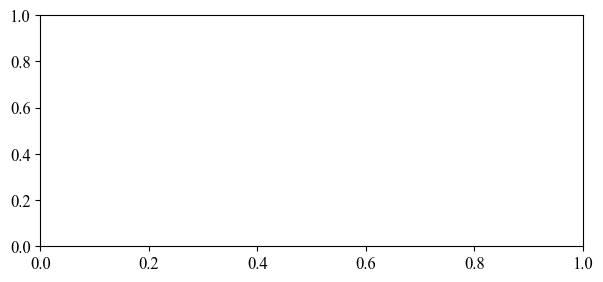

In [1]:
#simulated half-cell anode ,that includes a calibration value to improve the physical interpretation of anode half-cell plots
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Configure the plot style
plt.rcParams.update({'font.family': 'Times New Roman', 'font.size': 12})

### 1️FIRST PLOT: RPT 1 vs Fresh Anode (with linear fit regions) ###

# Create the figure
fig, ax = plt.subplots(figsize=(7, 3))

# Fresh Anode Data
x_fresh = anode_df["Cumulative Charge (mAh/g)"] * 16 * 0.00997152
y_fresh = anode_df['Working Electrode (V)']

# Get RPT 1 data
rpt1_data = next(data for data in anode_rpt_data if data["RPT"] == 1)
x_rpt1 = rpt1_data['x']
y_rpt1 = rpt1_data['integral_values']

# Determine **50%-90% of the x-range** for RPT 1
#for more information about the region selected , ref : Shellikeri, A., et al. "Investigation of pre-lithiation in graphite and hard-carbon anodes." J. Electrochem. Soc. 164.14 (2017): A3914. DOI: 10.1149/2.1511714jes
x_min_rpt1 = np.percentile(x_rpt1, 50)
x_max_rpt1 = np.percentile(x_rpt1, 90)
mask_rpt1 = (x_rpt1 >= x_min_rpt1) & (x_rpt1 <= x_max_rpt1)
slope_rpt1, intercept_rpt1, _, _, _ = linregress(x_rpt1[mask_rpt1], y_rpt1[mask_rpt1])

# Determine **50%-90% of the x-range** for Fresh Anode
x_min_fresh = np.percentile(x_fresh, 50)
x_max_fresh = np.percentile(x_fresh, 90)
mask_fresh = (x_fresh >= x_min_fresh) & (x_fresh <= x_max_fresh)
slope_fresh, intercept_fresh, _, _, _ = linregress(x_fresh[mask_fresh], y_fresh[mask_fresh])

# Plot RPT 1 and Fresh Anode
ax.plot(x_rpt1, y_rpt1, label='RPT 1')
ax.plot(x_fresh, y_fresh, label='Fresh Anode half cell', linestyle='--', color='green')

# Plot the **dashed line region** correctly for each case
x_fit_rpt1 = np.linspace(x_min_rpt1, x_max_rpt1, 100)
y_fit_rpt1 = slope_rpt1 * x_fit_rpt1 + intercept_rpt1
ax.plot(x_fit_rpt1, y_fit_rpt1, linestyle='--', color='red', label='Linear Fit (RPT 1)')

x_fit_fresh = np.linspace(x_min_fresh, x_max_fresh, 100)
y_fit_fresh = slope_fresh * x_fit_fresh + intercept_fresh
ax.plot(x_fit_fresh, y_fit_fresh, linestyle='--', color='blue', label='Linear Fit (Fresh Anode)')

# Configure the plot
ax.set_xlabel('Capacity (mAh)')
ax.set_ylabel(r'V vs Li/Li$^+$')
ax.set_title('RPT 1 vs Fresh Anode with Linear Fit Region')
ax.legend(loc='upper center', ncol=2, frameon=False)
ax.set_xlim(0, 62)
ax.set_ylim(-0.01, 1.6)
ax.grid(axis="y", linestyle="--", linewidth=0.5, alpha=0.3)
plt.tight_layout()

# Save and display the plot
plt.savefig('SIMULATED_ANODE_RPT1_with_calibration.svg')
plt.show()


###  SECOND PLOT: Selected RPTs with Calibration ###

# Compute the calibration: average distance between linear fits
calibration_values = []
for data in anode_rpt_data:
    x_rpt = data['x']
    y_rpt = data['integral_values']
    
    # Apply the 50%-90% mask for each RPT
    x_min = np.percentile(x_rpt, 50)
    x_max = np.percentile(x_rpt, 90)
    mask = (x_rpt >= x_min) & (x_rpt <= x_max)
    
    # Linear fit for each RPT
    slope_rpt, intercept_rpt, _, _, _ = linregress(x_rpt[mask], y_rpt[mask])
    
    # Compute the average difference between the RPT line and the fresh anode line
    x_overlap = np.linspace(max(x_min, x_min_fresh), min(x_max, x_max_fresh), 100)
    y_rpt_fit = slope_rpt * x_overlap + intercept_rpt
    y_fresh_fit = slope_fresh * x_overlap + intercept_fresh
    diff = np.mean(y_rpt_fit - y_fresh_fit)
    
    calibration_values.append(diff)

# Compute the average of the differences to define the final calibration value
calibration = np.mean(calibration_values)
print(f"Calibration Value: {calibration:.4f} V")

# Create the second figure for calibrated RPTs
plt.figure(figsize=(7, 3))

# Select the RPTs to be included in the plot
selected_RPTs = {1, 2, 3, 12, 23, 26}

# Loop to plot the selected RPTs applying the calibration
for data in anode_rpt_data:
    if data["RPT"] in selected_RPTs:
        # Remove the last 3 points
        x_data = data['x'][:-3]
        integral_values_data = data['integral_values'][:-3] - calibration  # Apply calibration
        
        plt.plot(x_data, integral_values_data, label=f'RPT {data["RPT"]}')

# Plot the fresh anode
plt.plot(x_fresh, y_fresh, label='Fresh Anode half cell', linestyle='--', color='green')

# Configure the plot
plt.xlabel('Capacity (mAh)')
plt.ylabel(r'V vs Li/Li$^+$')
plt.title('Cumulative Integral for Selected RPTs (100% DOD RT) and Measured Anode Half-Cell')

# Adjust the legend: Centered, 2 columns, no box
plt.legend(loc='upper center', ncol=3, frameon=False)

plt.xlim(0, 40)
plt.ylim(-0.01, 1.6)
plt.grid(axis="y", linestyle="--", linewidth=0.5, alpha=0.3)
plt.tight_layout()

# Save and display the plot
plt.savefig('SIMULATED_ANODE_SELECTED_RPTs_with_calibration.svg')
plt.show()
